# Initialize

## Initialization

In [1]:
visible_devices = 0
print("Visible devices:", visible_devices)
import datetime
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing re...")
import re
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = str(visible_devices)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, chi2, kstwo, kstwobign, zscore
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf
print("Tensorflow version:", tf.__version__)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing NF module...")
sys.path.append('../code')
import Bijectors,Distributions,MixtureDistributions,Plotters,Trainer,Utils

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../../GenerativeModelsMetrics/utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../../')
import GenerativeModelsMetrics as GMetrics # type: ignore
from GenerativeModelsMetrics.utils import se_mean, se_std

paper_fig_dir = "../../../NormalizingFlows/papers/NFHD/figures/"

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
gpu_models = get_gpu_info()
if gpu_models:
    training_device = gpu_models[eval(os.environ["CUDA_VISIBLE_DEVICES"])]
    print("Successfully loaded GPU model: {}".format(training_device))
else:
    training_device = 'undetermined'
    print("Failed to load GPU model. Defaulting to 'undetermined'.")
    
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

Visible devices: 0
2023-07-28 17:17:15.156441: Importing os...
2023-07-28 17:17:15.156566: Importing re...
2023-07-28 17:17:15.156663: Importing timer from timeit...
2023-07-28 17:17:15.156779: Setting env variables for tf import (only device 0 will be available)...
2023-07-28 17:17:15.156985: Importing numpy...
2023-07-28 17:17:15.276028: Importing matplotlib...
2023-07-28 17:17:15.812850: Importing sys...
2023-07-28 17:17:15.813307: Importing h5py...
2023-07-28 17:17:15.830809: Importing importlib.util...
2023-07-28 17:17:15.830895: Importing json...
2023-07-28 17:17:15.830959: Importing pandas...
2023-07-28 17:17:16.021167: Importing random...
2023-07-28 17:17:16.021305: Importing scipy utils...
2023-07-28 17:17:16.236293: Importing subprocess...
2023-07-28 17:17:16.236475: Importing tensorflow...
Tensorflow version: 2.6.0
2023-07-28 17:17:17.681957: Importing tensorflow_probability...
Tensorflow probability version: 0.13.0
2023-07-28 17:17:17.950870: Importing timeit...
2023-07-28 

## Useful functions

In [2]:
def reset_random_seeds(seed):
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [3]:
def MixtureGaussian(ncomp,ndims,seed=0):
    targ_dist = MixtureDistributions.MixMultiNormal1(ncomp,ndims,seed=seed)
    return targ_dist

In [4]:
def ksdfromp(p,n):
    en = np.round(n**2 / (2*n))
    d = bisect(lambda d: (kstwo.sf(d, en) - p), 0, 1)
    return d

#d=0.03
#n=10000
#ksdfromp(kstwo.sf(d, np.round(n**2 / (2*n))),n)-d

In [5]:
def build_data_from_runs(path,save_file_name,only_succeeded=True):
    if only_succeeded:
        result_string = "succeeded"
    else:
        result_string = "all"
    print("Processing path", path,"for",result_string,"runs.")
    runs_list=[[int(i.replace("run_","")),os.path.abspath(os.path.join(os.path.join(path,i),"results.txt"))] for i in os.listdir(path) if ("run" in i and os.path.isdir(os.path.abspath(os.path.join(path,i))))]
    runs_list.sort()
    i=0
    j=0
    data=pd.DataFrame()
    for run in runs_list:
        proceed = True
        try:
            if os.path.exists(run[1]):
                print(run[1])
                tmp = pd.read_csv(run[1])#.pop("time")
                if 'nan' in str(tmp) or "failed" in str(tmp):
                    if not only_succeeded:
                        proceed = True
                    else:
                        proceed = False
                else:
                    proceed = True
                #if not 'swd_mean' in str(tmp):
                #    tmp = recompute_metrics(run[1])
                #else:
                #    pass
                if proceed:
                    data=pd.concat([data,tmp])
                else:
                    pass
                i=i+1
            else:
                j=j+1
                print("No results available for run",run[0])
        except:
            j=j+1
            print("Failed to import run",run[0])
    data = data.reset_index(drop=True).replace("failed","nan")
    print("Succesfully imported", i, "runs (failed to import",j,"runs).")
    save_path = os.path.abspath(os.path.join(path,save_file_name))
    data.to_csv(save_path,index=False)
    print("Succesfully saved data to file", save_path)
    return data

In [6]:
def recompute_metrics(run):
    print("Recomputing metrics for run",run.replace("results.txt",""),".")
    start_all=timer()
    tmp = pd.read_csv(run)
    with open(run.replace('results.txt','details.json'), 'r') as f:
        tmp_json = json.load(f)
    X_data_nf = np.load(run.replace("results.txt","nf_sample.npy"))
    np.shape(X_data_nf)
    run_n=int(tmp["run_n"])
    run_seed=int(tmp["run_seed"])
    ndims=int(tmp["ndims"])
    nsamples=int(tmp["nsamples"])
    correlation=str(tmp["correlation"][0])
    nbijectors=int(tmp["nbijectors"])
    bijector=str(tmp["bijector"][0])
    activation=str(tmp["activation"][0])
    spline_knots=int(tmp["spline_knots"])
    range_min=int(tmp["range_min"])
    eps_regulariser=tmp["eps_regulariser"][0]
    regulariser=tmp["regulariser"][0]
    hidden_layers=str(tmp["hidden_layers"][0])
    batch_size=int(tmp["batch_size"])
    epochs_input=int(tmp["epochs_input"])
    epochs_output=int(tmp["epochs_output"])
    dist_seed=int(tmp_json["dist_seed"])
    test_seed=int(tmp_json["test_seed"])
    time=tmp["time"][0]
    train_loss_history=tmp_json["train_loss_history"]
    val_loss_history=tmp_json["val_loss_history"]
    ncomp=3
    ntest_samples=nsamples
    seed_dist = 0
    seed_test = 0
    targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    X_data_test=targ_dist.sample(ntest_samples,seed=seed_test).numpy().astype("float32")
    start=timer()
    ks_mean,ks_std,ks_list,ad_mean,ad_std,ad_list,wd_mean,wd_std,wd_list,swd_mean,swd_std,swd_list,fn_mean,fn_std,fn_list=Metrics.ComputeMetrics(X_data_test,X_data_nf)
    hyperparams_dict = {'run_n': [run_n],
                       'run_seed': [run_seed],
                       'ndims':[ndims],
                       'nsamples':[nsamples],
                       'correlation':[correlation],
                       'nbijectors':[nbijectors],
                       'bijector':[bijector],
                       'spline_knots':[spline_knots],
                       'range_min':[range_min],
                       'hidden_layers':[hidden_layers],
                       'batch_size':[batch_size],
                       'activation':[activation],
                       'eps_regulariser':[eps_regulariser],
                       'regulariser':[regulariser],
                       'dist_seed':[dist_seed],
                       'test_seed':[test_seed]}
    results_dict = {'run_n': [run_n],
                    'run_seed': [run_seed],
                    'ndims':[ndims],
                    'nsamples':[nsamples],
                    'correlation':[correlation],
                    'nbijectors':[nbijectors],
                    'bijector':[bijector],
                    'activation':[activation],
                    'spline_knots':[spline_knots],
                    'range_min':[range_min],
                    'eps_regulariser':[eps_regulariser],
                    'regulariser':[regulariser],
                    'ks_mean':[ks_mean],
                    'ks_std':[ks_std],
                    'ks_list':[ks_list],
                    'ad_mean':[ad_mean],
                    'ad_std':[ad_std],
                    'ad_list':[ad_list],
                    'wd_mean':[wd_mean],
                    'wd_std':[wd_std],
                    'wd_list':[wd_list],
                    'swd_mean':[swd_mean],
                    'swd_std':[swd_std],
                    'swd_list':[swd_list],
                    'fn_mean':[fn_mean],
                    'fn_std':[fn_std],
                    'fn_list':[fn_list],
                    'hidden_layers':[hidden_layers],
                    'batch_size':[batch_size],
                    'epochs_input':[epochs_input],
                    'epochs_output':[epochs_output],
                    'time':[time]}
    #os.rename(run, run.replace(".txt","_old.txt"))
    os.rename(run.replace('results.txt','details.json'), run.replace('results.txt','details_bkp.json'))
    Utils.results_current(run.replace("results.txt",""),results_dict)
    Utils.save_details_json(hyperparams_dict,results_dict,train_loss_history,val_loss_history,run.replace("results.txt",""))
    tmp_new = pd.read_csv(run)
    tmp_new['ks_list'] = None
    tmp_new['ad_list'] = None
    tmp_new['wd_list'] = None
    tmp_new['swd_list'] = None
    tmp_new['fn_list'] = None
    tmp_new.at[0, 'ks_list'] = ks_list
    tmp_new.at[0, 'ad_list'] = ad_list
    tmp_new.at[0, 'wd_list'] = wd_list
    tmp_new.at[0, 'swd_list'] = swd_list
    tmp_new.at[0, 'fn_list'] = fn_list
    end=timer()
    print("Metrics for run",run.replace("results.txt",""),"computed and saved in",end-start,"s.")
    return tmp_new

In [7]:
def extract_lines(df_bests,bij,metric,replicas=False):
    result = []
    for df in df_bests:
        if replicas:
            tmp = df[df["bijector"]==bij][["ndims",metric.replace("_mean","")+"_all_mean",metric.replace("_mean","")+"_all_std"]].to_numpy().flatten().tolist()
        else:
            tmp = df[df["bijector"]==bij][["ndims",metric,metric.replace("mean","std")]].to_numpy().flatten().tolist()
        if tmp != []:
            result.append(tmp)
    return np.array(result)

In [8]:
def transform_string_1(input_string):
    # Regular expression to find parts like '& $2.42e-02\pm 1.00e-02$'
    matches = re.findall(r"(& \$(\d+\.\d+)(e-\d+)\\pm (\d+\.\d+)(e-\d+)\$)", input_string)

    # If we found matches
    if matches:
        for match in matches:
            # Check if exponents are the same
            if match[2] == match[4]:
                # Now move e-XX at end after $
                new_format = "{} $({}\\pm {}{}".format(match[0].split('$')[0], match[1], match[3], match[2])
                # Replace the original match with the new format
                input_string = input_string.replace(match[0], new_format)
            
    return input_string

In [9]:
def dataframe_highlight_min(s):
    '''
    highlight the minimum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

def dataframe_highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

In [10]:
import re
def align_table_latex(table_str):
    lines = table_str.split('\n')
    aligned_lines = []
    max_counts = []
    # Pass 1: find the max index of each & position in all lines
    for line in lines:
        if not line.strip() or line.strip().startswith('%'):
            # Skip empty lines and lines starting with %
            aligned_lines.append((line, []))
            continue
        # Get the list of the positions of & in the current line
        counts = [m.start() for m in re.finditer('&', line)]
        # Extend max_counts if needed
        if len(counts) > len(max_counts):
            max_counts.extend([0] * (len(counts) - len(max_counts)))
        # Update the max index for each position
        for i, count in enumerate(counts):
            max_counts[i] = max(max_counts[i], count)
        aligned_lines.append((line, counts))
    # Pass 2: pad spaces to align & to the max positions
    for i in range(len(aligned_lines)):
        line, counts = aligned_lines[i]
        if counts:
            for j in reversed(range(len(counts))):
                line = line[:counts[j]] + ' ' * (max_counts[j] - counts[j]) + line[counts[j]:]
        aligned_lines[i] = line
    return '\n'.join(aligned_lines)

In [11]:
from math import log10, floor
def round_number(num,n=2):
    if num == 0:
        return 0
    digit_count = int(floor(log10(abs(num))))
    return round(num, -digit_count + n-1)
# Examples
#print(round_number(1234.567, 2))  # prints: "1200.0"
#print(round_number(12345.67, 2))  # prints: "12000.0"
#print(round_number(0.1234567, 2))  # prints: "0.12"

In [12]:
def format_number(num, n=4):
    if abs(num) >= 1:
        if len(str(int(num))) > n:  # If the integer part has more than n digits
            return "{:.2e}".format(num)
        else:
            return str(round(num))
    else:
        # For numbers less than 1
        if abs(num) < 10**-(n-1):
            return "{:.2e}".format(num)
        else:
            return ("{:.%df}" % (n - 1)).format(num).rstrip('0').rstrip('.')  # Remove trailing zeros

# Examples
#print(format_number(1234.567, 4))  # prints: "1235"
#print(format_number(12345.67, 4))  # prints: "1.23e+04"
#print(format_number(0.1234567, 4))  # prints: "0.123"
#print(format_number(0.0003, 4))  # prints: "3.00e-04"

In [13]:
def move_columns(df, cols_to_move, ref_col):
    """
    Move a list of columns to right after a specific column in dataframe.

    Parameters:
    df (pd.DataFrame): The original dataframe
    cols_to_move (list of str): List of columns to move
    ref_col (str): The column to move the other columns after
    
    Returns:
    pd.DataFrame: A dataframe with re-ordered columns
    """
    other_cols = [c for c in df.columns if c not in cols_to_move]
    
    start_cols = other_cols[:list(df.columns).index(ref_col) + 1]
    end_cols = [e for e in other_cols if e not in start_cols]
    
    return df[start_cols + cols_to_move + end_cols]

## Check, fix, import results

### Check and fix results

In [5]:
results_paths = {"MAFN": "../CMoG/results/MAFN_final/",
                 "RealNVPN": "../CMoG/results/RealNVPN_final/",
                 "MsplineN": "../CMoG/results/MsplineN_final/",
                 "CsplineN": "../CMoG/results/CsplineN_final/"
                }

#### Runs

In [15]:
for res in results_paths.values():
    build_data_from_runs(res,"log_file_eternal_final.txt")

Processing path ../CMoG/results/MAFN_final/ for succeeded runs.
/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN_final/run_1/results.txt
/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN_final/run_2/results.txt
/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN_final/run_3/results.txt
/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN_final/run_4/results.txt
/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN_final/run_5/results.txt
/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN_final/run_6/results.txt
/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN_final/run_7/res

### Import results

In [6]:
results_paths = {"MAFN": "../CMoG/results/MAFN_final/",
                 "RealNVPN": "../CMoG/results/RealNVPN_final/",
                 "MsplineN": "../CMoG/results/MsplineN_final/",
                 "CsplineN": "../CMoG/results/CsplineN_final/"
                }

#### Runs

In [7]:
tmp_paths = {k: v+"log_file_eternal_final.txt" for k,v in results_paths.items()}
flat_list = list(tmp_paths.values())
tmp = []
for f in flat_list:
    print("Working on file",f)
    try:
        ttmp = pd.read_csv(f)
        print("Succesfully loaded results file",f)
        ttmp['ks_list'] = None
        ttmp['ad_list'] = None
        ttmp['wd_list'] = None
        ttmp['swd_list'] = None
        ttmp['fn_list'] = None
        for index, row in ttmp.iterrows():
            run_n = row['run_n']
            print("Processing run",run_n)
            run_folder = f.replace("log_file_eternal_final.txt","run_"+str(run_n))
            run_details = run_folder+r"/details.json"
            try:
                with open(run_details, 'r') as file:
                    tmp_json = json.load(file)
                    print("Succesfully loaded json file",run_details)
                ks_list=tmp_json["ks_list"]
                ad_list=tmp_json["ad_list"]
                wd_list=tmp_json["wd_list"]
                swd_list=tmp_json["swd_list"]
                fn_list=tmp_json["fn_list"]
                #print(tmp_json["tmp_json"])
                ttmp.at[index, 'ks_list'] = ks_list
                ttmp.at[index, 'ad_list'] = ad_list
                ttmp.at[index, 'wd_list'] = wd_list
                ttmp.at[index, 'swd_list'] = swd_list
                ttmp.at[index, 'fn_list'] = fn_list
                print("Succesfully processed json file",run_details)
            except:
                ttmp.at[index, 'ks_list'] = None
                ttmp.at[index, 'ad_list'] = None
                ttmp.at[index, 'wd_list'] = None
                ttmp.at[index, 'swd_list'] = None
                ttmp.at[index, 'fn_list'] = None
                print("Failed processing json file",run_details)
        try:
            for j in ttmp.keys():
                ttmp[j]["epochs_input"] = ttmp[j]["epochs_input"].fillna(1000)
                ttmp[j]["epochs_output"] = ttmp[j]["epochs_output"].fillna(0)
        except:
            pass
        tmp.append(ttmp)
    except:
        pass
df_all = pd.concat([df for df in tmp],ignore_index=True).reset_index(drop=True)
df_all = df_all[~(df_all == 'failed').any(axis=1)]
len(df_all)

Working on file ../CMoG/results/MAFN_final/log_file_eternal_final.txt
Succesfully loaded results file ../CMoG/results/MAFN_final/log_file_eternal_final.txt
Processing run 1
Succesfully loaded json file ../CMoG/results/MAFN_final/run_1/details.json
Succesfully processed json file ../CMoG/results/MAFN_final/run_1/details.json
Processing run 2
Succesfully loaded json file ../CMoG/results/MAFN_final/run_2/details.json
Succesfully processed json file ../CMoG/results/MAFN_final/run_2/details.json
Processing run 3
Succesfully loaded json file ../CMoG/results/MAFN_final/run_3/details.json
Succesfully processed json file ../CMoG/results/MAFN_final/run_3/details.json
Processing run 4
Succesfully loaded json file ../CMoG/results/MAFN_final/run_4/details.json
Succesfully processed json file ../CMoG/results/MAFN_final/run_4/details.json
Processing run 5
Succesfully loaded json file ../CMoG/results/MAFN_final/run_5/details.json
Succesfully processed json file ../CMoG/results/MAFN_final/run_5/details

1299

In [6]:
#df_all

In [8]:
df_reduced = {}
for ndims in [4,8,16,32,64,100,200,400,1000]:
    print("\n================================   ",str(ndims)+"D   ======================================")
    df_reduced[ndims] = {}
    for bijector in ["MAFN","RealNVPN","MsplineN","CsplineN"]:
        try:
            print("-------------------------------------------------------------------------------")
            df_reduced[ndims][bijector] = pd.DataFrame(df_all[df_all["ndims"]==ndims][df_all["bijector"]==bijector])
            df_tmp = df_reduced[ndims][bijector].copy()
            rry = np.array(list(df_tmp["ks_list"]))
            print(bijector,"bijector in",ndims,"dimensions. KS:",[np.mean(rry.flatten()),np.std(rry.flatten())])
            rry = np.array(list(df_tmp["swd_list"]))
            print(bijector,"bijector in",ndims,"dimensions. SWD:",[np.mean(rry.flatten()),np.std(rry.flatten())])
            rry = np.array(list(df_tmp["fn_list"]))
            print(bijector,"bijector in",ndims,"dimensions. FN:",[np.mean(rry.flatten()),np.std(rry.flatten())])
            rry = np.array(list(df_tmp["training_time"]))
            print(bijector,"bijector in",ndims,"dimensions. Training time:",[np.mean(rry.flatten()),np.std(rry.flatten())])
            rry = np.array(list(df_tmp["prediction_time"]))
            print(bijector,"bijector in",ndims,"dimensions. Prediction time:",[np.mean(rry.flatten()),np.std(rry.flatten())])
        except:
            print(bijector,"bijector in",ndims,"dimensions:",[np.nan,np.nan])


================================    4D   ======================================
-------------------------------------------------------------------------------
MAFN bijector in 4 dimensions. KS: [0.3274563117732578, 0.2870957775943502]
MAFN bijector in 4 dimensions. SWD: [0.049669030435705926, 0.09686596217231552]
MAFN bijector in 4 dimensions. FN: [0.09588784691659756, 0.15371008679168735]
MAFN bijector in 4 dimensions. Training time: [1938.7403953560229, 1028.0110565696764]
MAFN bijector in 4 dimensions. Prediction time: [5.331434167151019, 0.5413197882057348]
-------------------------------------------------------------------------------


RealNVPN bijector in 4 dimensions. KS: [0.3448084586678358, 0.2857449898375164]
RealNVPN bijector in 4 dimensions. SWD: [0.030341508800842125, 0.014748591077963174]
RealNVPN bijector in 4 dimensions. FN: [0.0351814464457515, 0.01834541080306057]
RealNVPN bijector in 4 dimensions. Training time: [3321.8698464524523, 884.1742032301124]
RealNVPN bijector in 4 dimensions. Prediction time: [5.336240319271747, 0.44848627189151025]
-------------------------------------------------------------------------------
MsplineN bijector in 4 dimensions. KS: [0.41812751498982836, 0.29878302836645126]
MsplineN bijector in 4 dimensions. SWD: [0.028097415337668713, 0.015566234779463497]
MsplineN bijector in 4 dimensions. FN: [0.030686060524088038, 0.015144233521807023]
MsplineN bijector in 4 dimensions. Training time: [2763.607045556148, 498.17322118580597]
MsplineN bijector in 4 dimensions. Prediction time: [5.290222470549634, 0.46472986591366067]
---------------------------------------------------------

/tmp/ipykernel_40529/2161111397.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced[ndims][bijector] = pd.DataFrame(df_all[df_all["ndims"]==ndims][df_all["bijector"]==bijector])
/local_data/scratch/rtorre/anaconda3/envs/tf2_6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/local_data/scratch/rtorre/anaconda3/envs/tf2_6/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/local_data/scratch/rtorre/anaconda3/envs/tf2_6/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/local_data/scratch/rtorre/anaconda3/envs/tf2_6/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = 

MsplineN bijector in 400 dimensions. KS: [0.31765164742273155, 0.2823418116626191]
MsplineN bijector in 400 dimensions. SWD: [0.04181387717945785, 0.028832696766697575]
MsplineN bijector in 400 dimensions. FN: [16.49268670923924, 8.260092926891637]
MsplineN bijector in 400 dimensions. Training time: [3469.8420782146422, 1384.433818795712]
MsplineN bijector in 400 dimensions. Prediction time: [69.0951408078632, 4.579194813403776]
-------------------------------------------------------------------------------
CsplineN bijector in 400 dimensions. KS: [nan, nan]
CsplineN bijector in 400 dimensions. SWD: [nan, nan]
CsplineN bijector in 400 dimensions. FN: [nan, nan]
CsplineN bijector in 400 dimensions. Training time: [nan, nan]
CsplineN bijector in 400 dimensions. Prediction time: [nan, nan]

================================    1000D   ======================================
-------------------------------------------------------------------------------
MAFN bijector in 1000 dimensions. KS: 

## Likelihood-ratio Test

#### MAF 4D (run_1)

In [2]:
start = timer()
run_number = 1
run = "/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN_final/run_"+str(run_number)+"/results.txt"
tmp = pd.read_csv(run)
#tmp.columns
#X_data_nf = np.load(run.replace("results.txt","nf_sample.npy"))
#np.shape(X_data_nf)
run_n = int(tmp["run_n"])
seed_train = int(tmp["seed_train"])
seed_test = int(tmp["seed_test"])
ndims = int(tmp["ndims"])
print("Ndims =", ndims)
nsamples = int(tmp["nsamples"])
print("Nsamples =", nsamples)
nbijectors = int(tmp["nbijectors"])
bijector = str(tmp["bijector"][0])
activation = str(tmp["activation"][0])
spline_knots = int(tmp["spline_knots"])
range_min = int(tmp["range_min"])
eps_regulariser = tmp["eps_regulariser"][0]
regulariser = tmp["regulariser"][0]
hidden_layers_string = str(tmp["hidden_layers"][0])
hidden_layers = [int(i) for i in hidden_layers_string.split('-')]
batch_size = int(tmp["batch_size"])
epochs_input = int(tmp["epochs_input"])
epochs_output = int(tmp["epochs_output"])
training_time = tmp["training_time"][0]
prediction_time = tmp["prediction_time"][0]
total_time = tmp["total_time"][0]
training_device = tmp["training_device"]

ncomp = 3
ntest_samples = 100000

# Rebuid the model
targ_dist = MixtureDistributions.MixMultiNormal1(n_components = ncomp,
                                                 n_dimensions = ndims,
                                                 seed = 0,
                                                 dtype = tf.float32)
bijector = Bijectors.ChooseBijector(bijector_name = bijector,
                                    ndims = ndims,
                                    spline_knots = spline_knots,
                                    nbijectors = nbijectors,
                                    range_min = range_min,
                                    hidden_layers = hidden_layers,
                                    activation = activation,
                                    regulariser = regulariser,
                                    eps_regulariser = eps_regulariser,
                                    perm_style='bi-partition',
                                    shuffle='Noshuffle')
base_dist = Distributions.gaussians(ndims = ndims,
                                    dtype = targ_dist.dtype)
nf_dist = tfd.TransformedDistribution(distribution = base_dist, 
                                      bijector = bijector)
nf_dist, _ = Utils.load_model(nf_dist = nf_dist,
                              path_to_results = run.replace("results.txt",""),
                              ndims = ndims,
                              lr = .000001,
                              dtype = targ_dist.dtype)
end = timer()
print("Model\n",run.replace("results.txt",""),"\nsuccesfully loaded in",end-start,"s.")

Ndims = 4
Nsamples = 100000
Model
 /mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN_final/run_1/ 
succesfully loaded in 1.8833965680096298 s.


In [3]:
dist0 = targ_dist
dist1 = nf_dist
print("dist0.dtype:",dist0.dtype,"\ndist1.dtype:",dist1.dtype)

dist0.dtype: <dtype: 'float32'> 
dist1.dtype: <dtype: 'float32'>


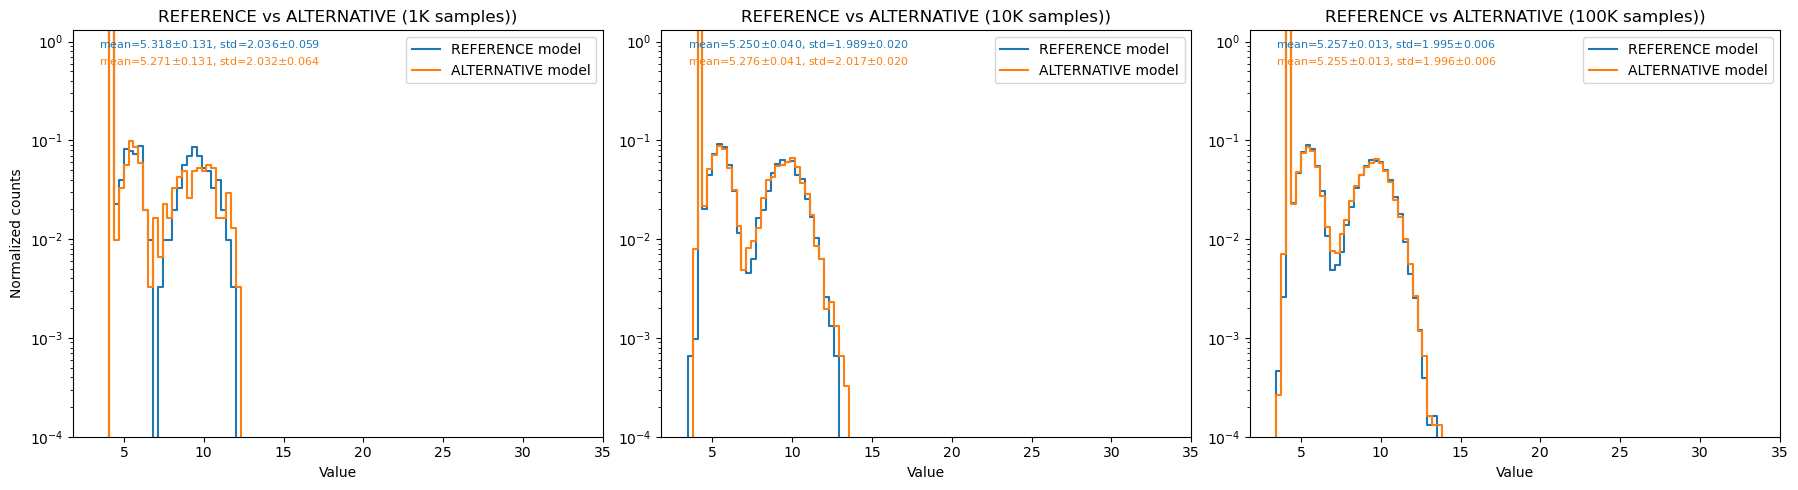

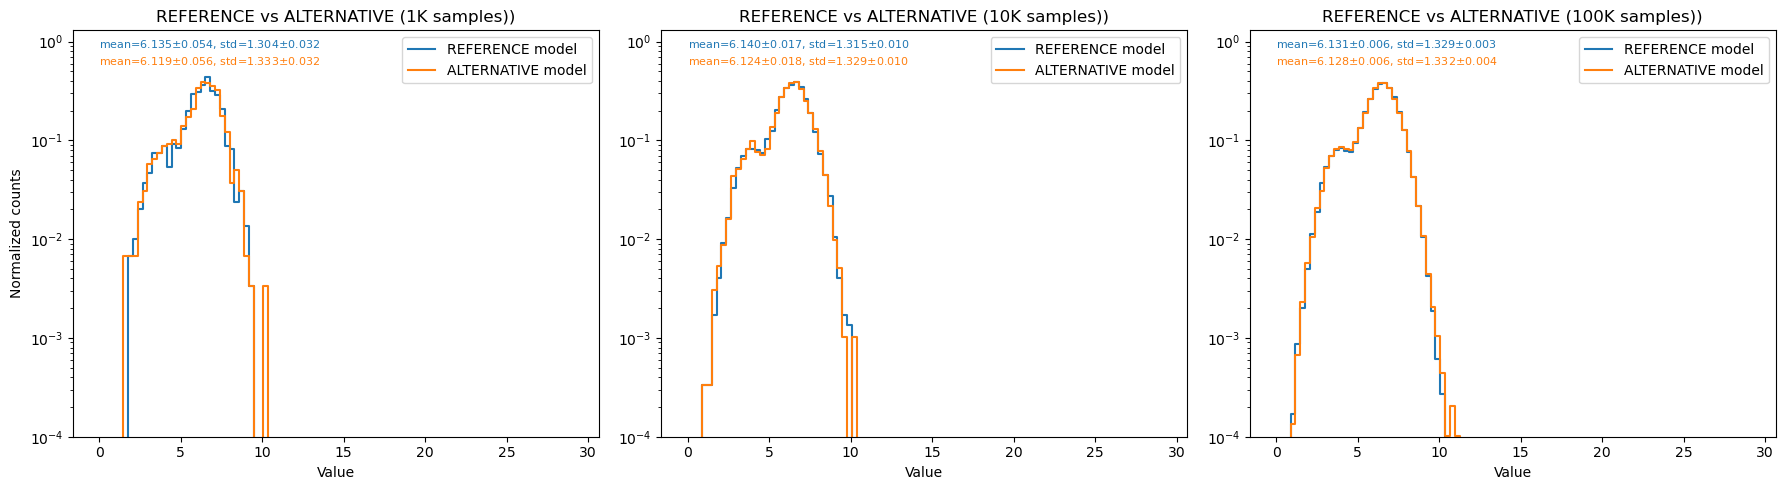

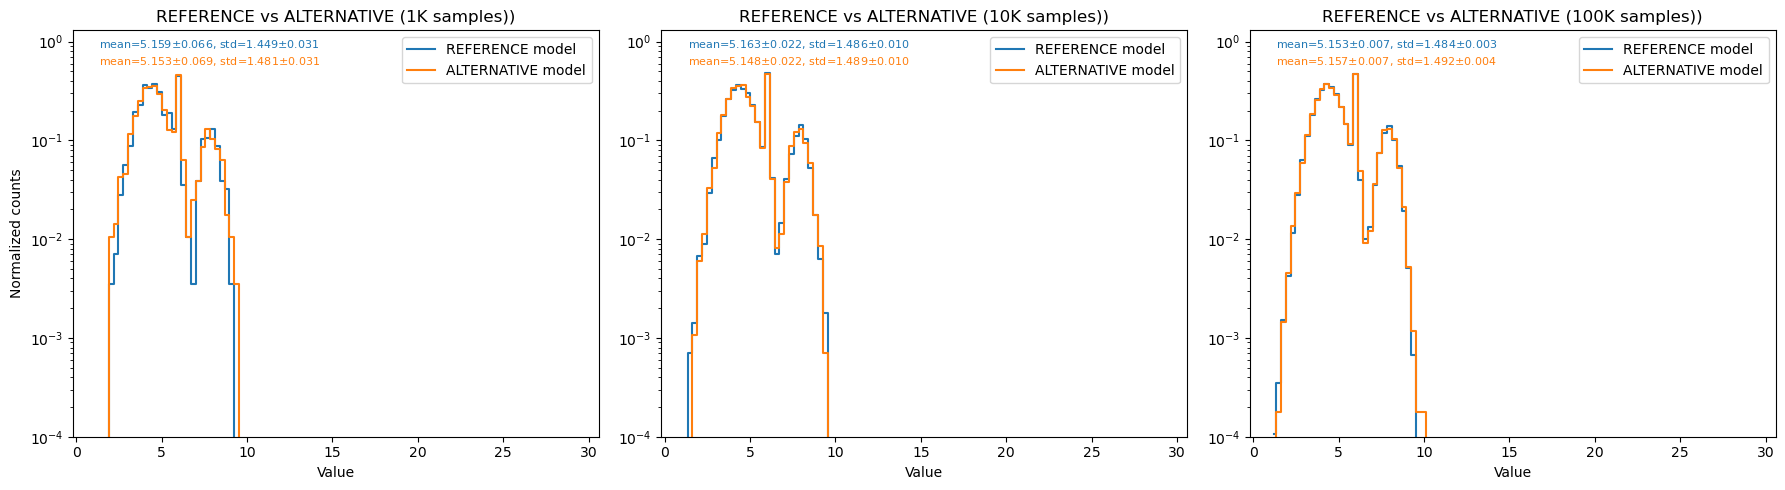

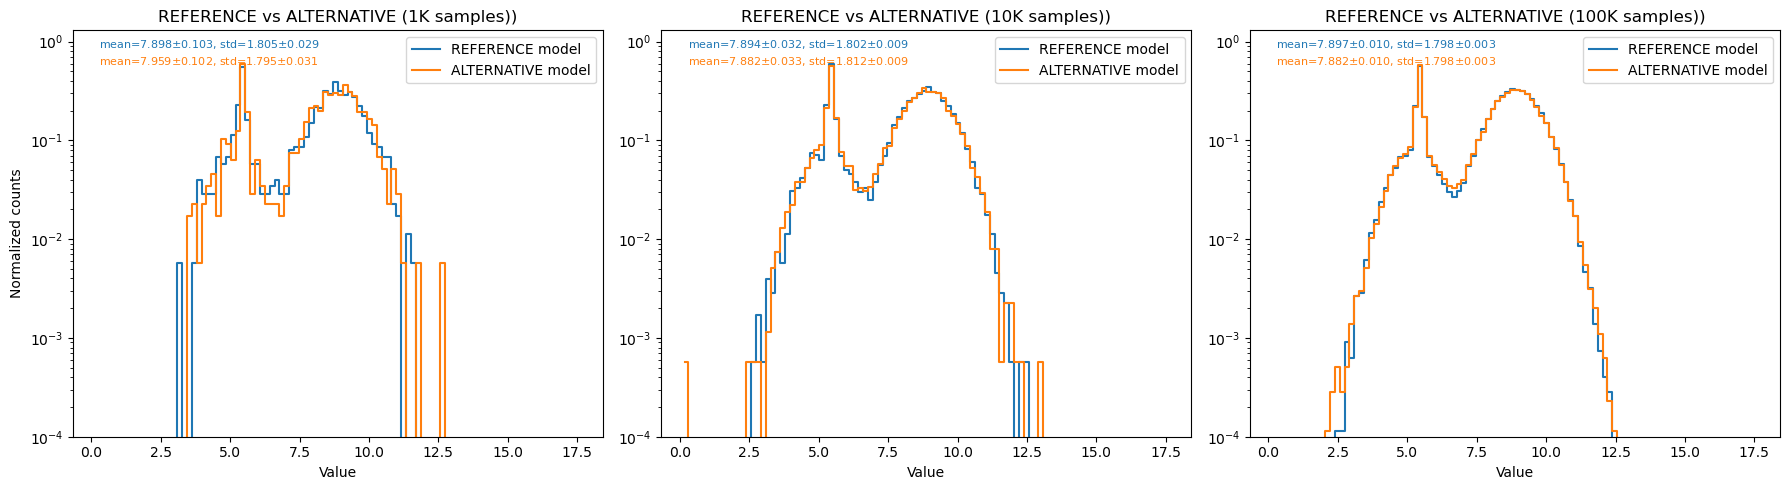

In [4]:
for dim in [0,1,2,3]:
    scale = 'log'
    num_bins = 100  # number of bins
    nsamples1 = 1000
    nsamples2 = 10000
    nsamples3 = 100000

    # KS statistic for different values of the 'niter' parameter
    sample0 = dist0.sample(nsamples1).numpy()[:,dim]
    sample1 = dist1.sample(nsamples1).numpy()[:,dim]

    sample2 = dist0.sample(nsamples2).numpy()[:,dim]
    sample3 = dist1.sample(nsamples2).numpy()[:,dim]

    sample4 = dist0.sample(nsamples3).numpy()[:,dim]
    sample5 = dist1.sample(nsamples3).numpy()[:,dim]

    # Compute the mean and standard deviation of the sample and their standard errors
    mu0, deltamu0, sigma0, deltasigma0 = (np.mean(sample0), se_mean(sample0), np.std(sample0), se_std(sample0))
    mu1, deltamu1, sigma1, deltasigma1 = (np.mean(sample1), se_mean(sample1), np.std(sample1), se_std(sample1))
    mu2, deltamu2, sigma2, deltasigma2 = (np.mean(sample2), se_mean(sample2), np.std(sample2), se_std(sample2))
    mu3, deltamu3, sigma3, deltasigma3 = (np.mean(sample3), se_mean(sample3), np.std(sample3), se_std(sample3))
    mu4, deltamu4, sigma4, deltasigma4 = (np.mean(sample4), se_mean(sample4), np.std(sample4), se_std(sample4))
    mu5, deltamu5, sigma5, deltasigma5 = (np.mean(sample5), se_mean(sample5), np.std(sample5), se_std(sample5))

    # Minimum and maximum x values
    min_x = 0.9*min(np.concatenate((sample4,sample5),axis=0)) # lower limit of the binning
    max_x = 1.1*max(np.concatenate((sample4,sample5),axis=0)) # upper limit of the binning

    # Create an array of values
    x = np.linspace(min_x, max_x, num_bins + 1)

    # Create histogram for values and normalize counts to sum to 1
    counts0, bin_edges = np.histogram(sample0, bins=x, density=True)
    counts1, bin_edges = np.histogram(sample1, bins=x, density=True)
    counts2, bin_edges = np.histogram(sample2, bins=x, density=True)
    counts3, bin_edges = np.histogram(sample3, bins=x, density=True)
    counts4, bin_edges = np.histogram(sample4, bins=x, density=True)
    counts5, bin_edges = np.histogram(sample5, bins=x, density=True)

    # Get the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Set up the figure and the two subplots
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    # Draw the first plot
    line1, = ax[0].plot(bin_centers, counts0, '-',label='REFERENCE model', drawstyle='steps-mid',)
    line2, = ax[0].plot(bin_centers, counts1, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
    ax[0].text(0.05, 0.98, f'mean={mu0:.3f}$\pm${deltamu0:.3f}, std={sigma0:.3f}$\pm${deltasigma0:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line1.get_color(), fontsize=8)
    ax[0].text(0.05, 0.94, f'mean={mu1:.3f}$\pm${deltamu1:.3f}, std={sigma1:.3f}$\pm${deltasigma1:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line2.get_color(), fontsize=8)
    # Draw the second plot
    ax[0].set_yscale(scale)
    ax[0].set_ylim(1e-4, 1.3)
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Normalized counts')
    ax[0].set_title('REFERENCE vs ALTERNATIVE (1K samples))')
    ax[0].legend()

    # Draw the second plot
    line3, = ax[1].plot(bin_centers, counts2, '-',label='REFERENCE model', drawstyle='steps-mid')
    line4, = ax[1].plot(bin_centers, counts3, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
    ax[1].text(0.05, 0.98, f'mean={mu2:.3f}$\pm${deltamu2:.3f}, std={sigma2:.3f}$\pm${deltasigma2:.3f}', transform=ax[1].transAxes, verticalalignment='top', color=line3.get_color(), fontsize=8)
    ax[1].text(0.05, 0.94, f'mean={mu3:.3f}$\pm${deltamu3:.3f}, std={sigma3:.3f}$\pm${deltasigma3:.3f}', transform=ax[1].transAxes, verticalalignment='top', color=line4.get_color(), fontsize=8)
    ax[1].set_yscale(scale)
    ax[1].set_ylim(1e-4, 1.3)
    ax[1].set_xlabel('Value')
    ax[1].set_title('REFERENCE vs ALTERNATIVE (10K samples))')
    ax[1].legend()

    # Draw the third plot
    line5, = ax[2].plot(bin_centers, counts4, '-',label='REFERENCE model', drawstyle='steps-mid')
    line6, = ax[2].plot(bin_centers, counts5, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
    ax[2].text(0.05, 0.98, f'mean={mu4:.3f}$\pm${deltamu4:.3f}, std={sigma4:.3f}$\pm${deltasigma4:.3f}', transform=ax[2].transAxes, verticalalignment='top', color=line5.get_color(), fontsize=8)
    ax[2].text(0.05, 0.94, f'mean={mu5:.3f}$\pm${deltamu5:.3f}, std={sigma5:.3f}$\pm${deltasigma5:.3f}', transform=ax[2].transAxes, verticalalignment='top', color=line6.get_color(), fontsize=8)
    ax[2].set_yscale(scale)
    ax[2].set_ylim(1e-4, 1.3)
    ax[2].set_xlabel('Value')
    ax[2].set_title('REFERENCE vs ALTERNATIVE (100K samples))')
    ax[2].legend()

    # Adjust the width space
    plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

    # Display the figure with the two subplots
    plt.tight_layout()
    plt.show()
    plt.close()

In [5]:
# Create a dictionary with the data
data = {
    'Sample Size': [nsamples1, nsamples1, nsamples2, nsamples2, nsamples3, nsamples3],
    'Mean': [mu0, mu1, mu2, mu3, mu4, mu5],
    'Delta Mean': [deltamu0, deltamu1, deltamu2, deltamu3, deltamu4, deltamu5],
    'Std Dev': [sigma0, sigma1, sigma2, sigma3, sigma4, sigma5],
    'Delta Std Dev': [deltasigma0, deltasigma1, deltasigma2, deltasigma3, deltasigma4, deltasigma5]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
df

Sample Size      Mean  Delta Mean   Std Dev  Delta Std Dev
0         1000  7.898300    0.103077  1.805429       0.029297
1         1000  7.958985    0.101860  1.794738       0.030876
2        10000  7.894096    0.032490  1.802485       0.009250
3        10000  7.882166    0.032817  1.811555       0.009404
4       100000  7.896585    0.010222  1.797926       0.002924
5       100000  7.882235    0.010222  1.797905       0.002923

In [6]:
sample_ref_1 = dist0.sample(1000)
sample_alt_1 = dist1.sample(1000)

In [12]:
conditional_print = GMetrics.utils.conditional_print
print_sampling_time = False
print_log_prob_time = False
print_nsamples = False
print_niter = False

def clip_to_boundaries(sample_ref_1, sample_alt_1):
    # Calculate the min and max of each dimension in sample_ref_1
    min_vals = np.min(sample_ref_1, axis=0)
    max_vals = np.max(sample_ref_1, axis=0)

    # Clip sample_alt_1 to these min and max values
    sample_alt_1_clipped = np.clip(sample_alt_1, min_vals, max_vals)

    return sample_alt_1_clipped


niter = 1000
nsamples_list = [100,1000,10000,12000,15000,20000,100000]
compute_alternative = True

start_all = timer()

ts_dist_null = {}
ts_dist_null_tmp = {}
if compute_alternative:
    ts_dist_alt = {}
    ts_dist_alt_tmp = {}

nsamples_max = np.max(nsamples_list)

for i in range(niter):
    conditional_print(print_niter,"\n============================================")
    conditional_print(print_niter,"Number of pseudo-experiment:", i)
    start_iter = timer()
    
    ts_dist_null_tmp[i] = {}
    if compute_alternative:
        ts_dist_alt_tmp[i] = {}

    # Sample from the REFERENCE and ALTERNATIVE distributions
    start = timer()
    sample_ref_1 = dist0.sample(3*nsamples_max)
    end = timer()
    conditional_print(print_sampling_time,"Time to sample",3*nsamples,"samples from the REFERENCE distribution:",end-start,"s.")
    if compute_alternative:
        start = timer()
        sample_alt_1 = dist1.sample(2*nsamples_max)
        end = timer()
        sample_alt_1 = clip_to_boundaries(sample_ref_1, sample_alt_1)
        conditional_print(print_sampling_time,"Time to sample",nsamples,"samples from the ALTERNATIVE distribution:",end-start,"s.")
    
    # Compute the log-probability of the samples under the REFERENCE and ALTERNATIVE distributions
    start = timer()
    logprob_ref_ref = dist0.log_prob(sample_ref_1)
    end = timer()
    conditional_print(print_log_prob_time,"Time to compute log_prob of dist0 for",3*nsamples,"samples from dist0:",end-start,"s.")
    start = timer()
    logprob_alt_ref = dist1.log_prob(sample_ref_1)
    end = timer()
    conditional_print(print_log_prob_time,"Time to compute log_prob of dist1 for",3*nsamples,"samples from dist0:",end-start,"s.")
    if compute_alternative:
        start = timer()
        logprob_ref_alt = dist0.log_prob(sample_alt_1)
        end = timer()
        conditional_print(print_log_prob_time,"Time to compute log_prob of dist0 for",nsamples,"samples from dist1:",end-start,"s.")
        start = timer()
        logprob_alt_alt = dist1.log_prob(sample_alt_1)
        end = timer()
        conditional_print(print_log_prob_time,"Time to compute log_prob of dist1 for",nsamples,"samples from dist1:",end-start,"s.")

    tf_dist_null_list = []
    if compute_alternative:
        tf_dist_alt_list = []

    for nsamples in nsamples_list:
        conditional_print(print_nsamples,"\n--------------------------------------------")
        conditional_print(print_nsamples,"Number of samples:", nsamples)
        start_nsamples = timer()
        
        # Generate independent samples from the REFERENCE and ALTERNATIVE distributions
        logprob_ref_ref_reduced_1 = logprob_ref_ref[:nsamples]
        logprob_ref_ref_reduced_2 = logprob_alt_ref[nsamples:2*nsamples]
        logprob_ref_ref_reduced_3 = logprob_ref_alt[2*nsamples:3*nsamples]
        logprob_alt_ref_reduced = logprob_alt_alt[:nsamples]
        if compute_alternative:
            logprob_ref_alt_reduced = logprob_ref_alt[:nsamples]
            logprob_alt_alt_reduced = logprob_alt_alt[:nsamples]

        lik_ref_dist = tf.reduce_sum(logprob_ref_ref_reduced_1)+tf.reduce_sum(logprob_ref_ref_reduced_2)
        lik_alt_dist = tf.reduce_sum(logprob_ref_ref_reduced_1)+tf.reduce_sum(logprob_alt_ref_reduced)
        ts_dist_null_tmp[i][nsamples] = 2*(lik_alt_dist-lik_ref_dist).numpy()

        if compute_alternative:
            lik_ref_dist = tf.reduce_sum(logprob_ref_ref_reduced_3)+tf.reduce_sum(logprob_ref_alt_reduced)
            lik_alt_dist = tf.reduce_sum(logprob_ref_ref_reduced_3)+tf.reduce_sum(logprob_alt_alt_reduced)
            ts_dist_alt_tmp[i][nsamples] = 2*(lik_alt_dist-lik_ref_dist).numpy()
        end_nsamples = timer()
        conditional_print(print_nsamples,"Time elapsed for",nsamples,"samples:",end_nsamples-start_nsamples,"s.")
    end_iter = timer()
    conditional_print(print_niter,"Time elapsed for pseudo-experiment",i,":",end_iter-start_iter,"s.")
end_all = timer()
print("Total time elapsed:",end_all-start_all,"s.")

Total time elapsed: 322.3219919319963 s.


In [15]:
compute_alternative = True

In [16]:
for nsamples in nsamples_list:
    
    arr = np.array([ts_dist_null_tmp[i][nsamples] for i in range(niter)])
    mask = ~np.isfinite(arr)
    non_finite_fraction = np.sum(mask) / len(arr)
    if non_finite_fraction > 0:
        print(f"Warning: Removed {non_finite_fraction*100:.2f}% of the null distribution samples due to non-finite values for nsamples={nsamples}")
    arr_no_nan_inf = arr[~mask]
    Q1 = np.percentile(arr_no_nan_inf, 25)
    Q3 = np.percentile(arr_no_nan_inf, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (arr_no_nan_inf < lower_bound) | (arr_no_nan_inf > upper_bound)
    print(f"Warning: Removed {np.sum(outliers)} outliers ({np.sum(outliers)/len(arr_no_nan_inf)*100:.2f}%) from the null distribution samples for nsamples={nsamples}")
    data_clean = arr_no_nan_inf[~outliers]
    ts_dist_null[nsamples] = data_clean
    
    if compute_alternative:
        
        arr = np.array([ts_dist_alt_tmp[i][nsamples] for i in range(niter)])
        mask = ~np.isfinite(arr)
        non_finite_fraction = np.sum(mask) / len(arr)
        if non_finite_fraction > 0:
            print(f"Warning: Removed {non_finite_fraction*100:.2f}% of the alternative distribution samples due to non-finite values for nsamples={nsamples}")
        arr_no_nan_inf = arr[~mask]
        Q1 = np.percentile(arr_no_nan_inf, 25)
        Q3 = np.percentile(arr_no_nan_inf, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (arr_no_nan_inf < lower_bound) | (arr_no_nan_inf > upper_bound)
        print(f"Warning: Removed {np.sum(outliers)} outliers ({np.sum(outliers)/len(arr_no_nan_inf)*100:.2f}%) from the alternative distribution samples for nsamples={nsamples}")
        data_clean = arr_no_nan_inf[~outliers]
        ts_dist_alt[nsamples] = data_clean


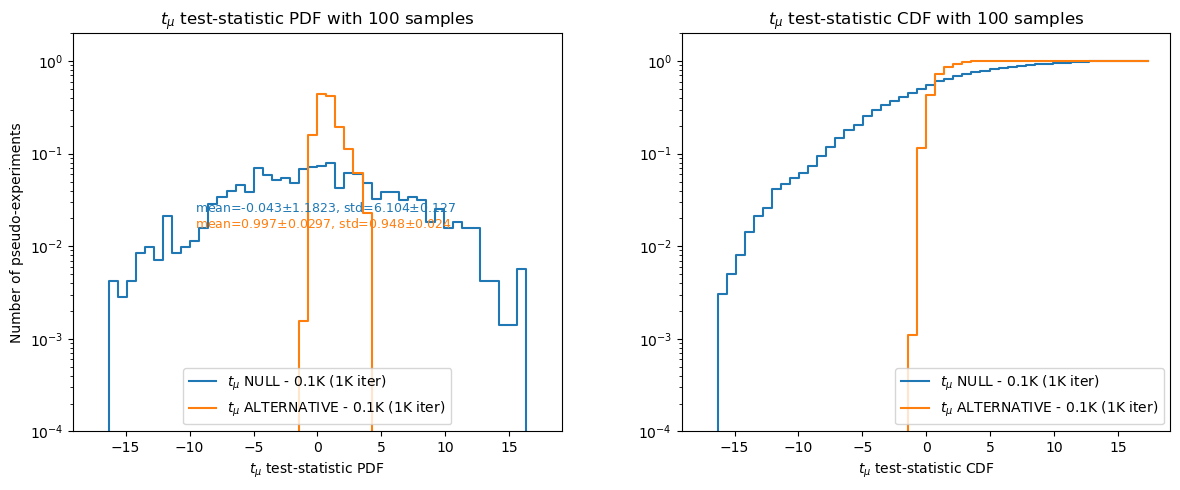

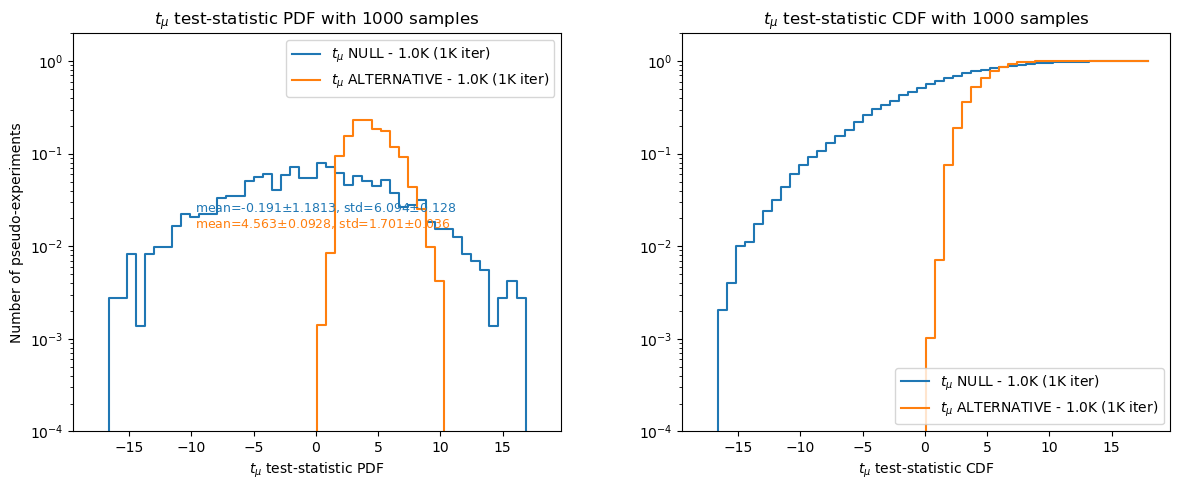

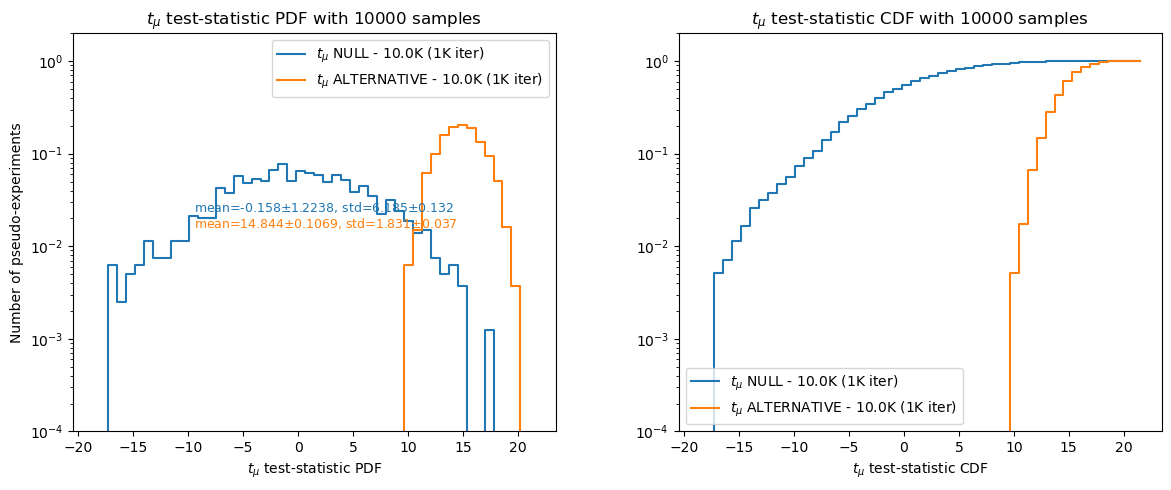

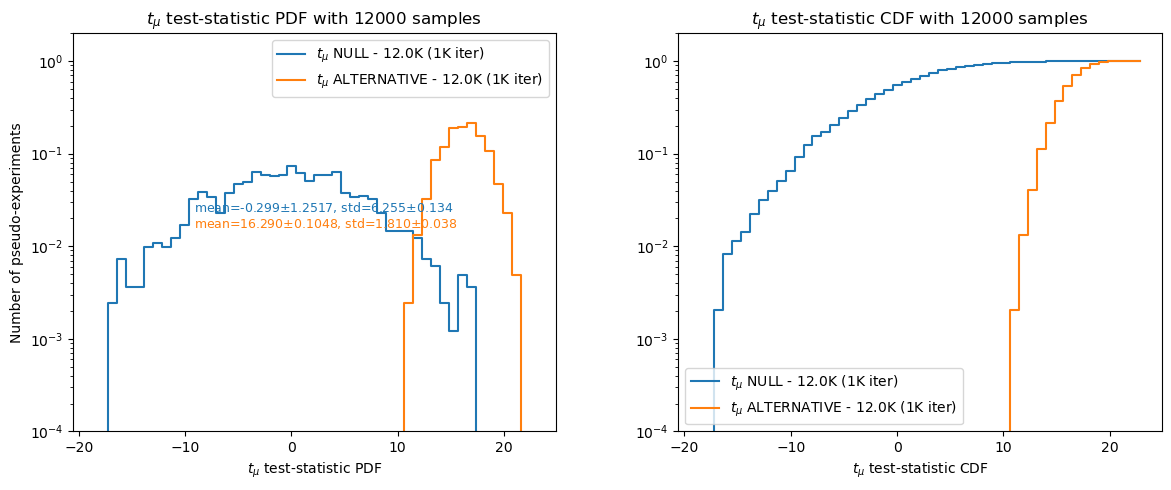

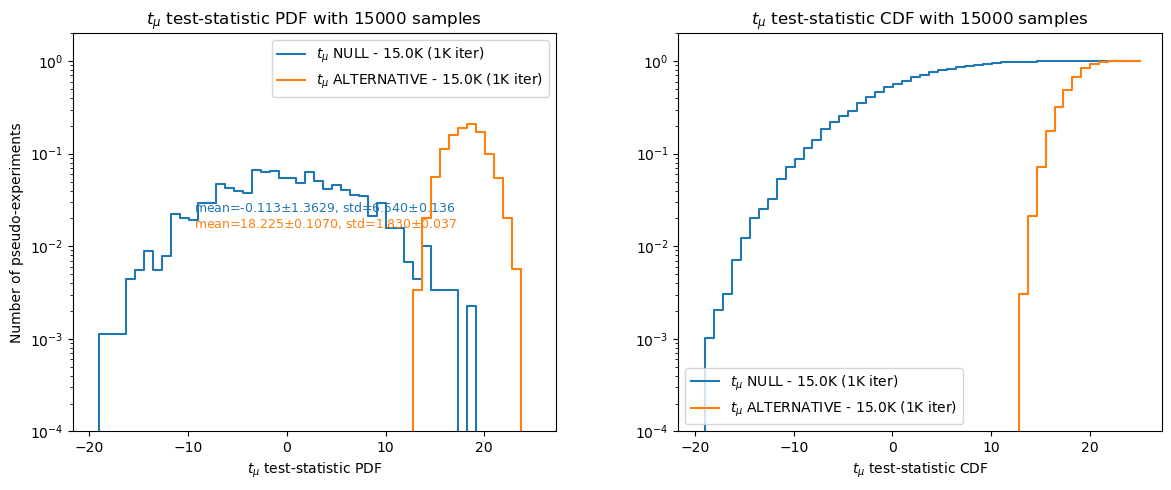

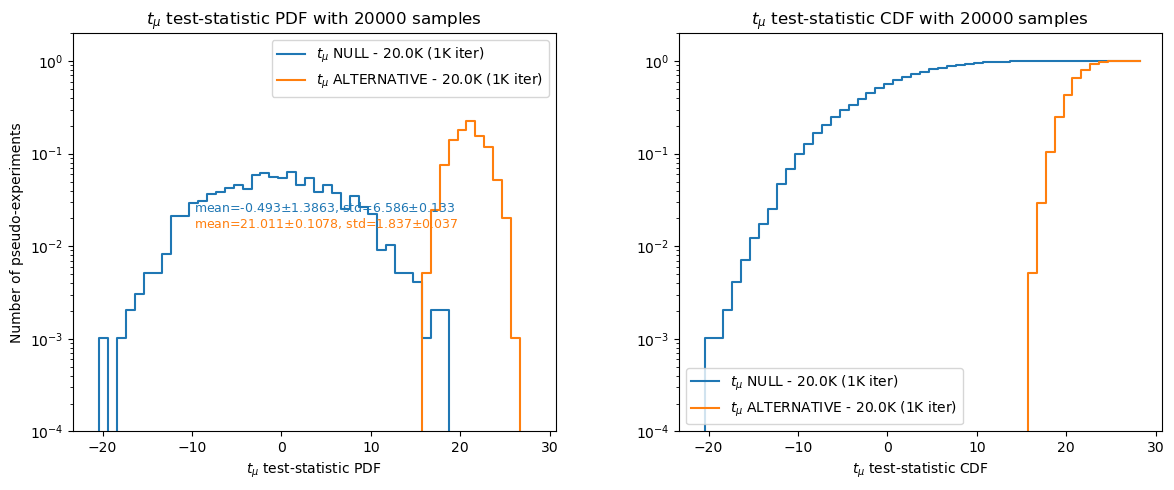

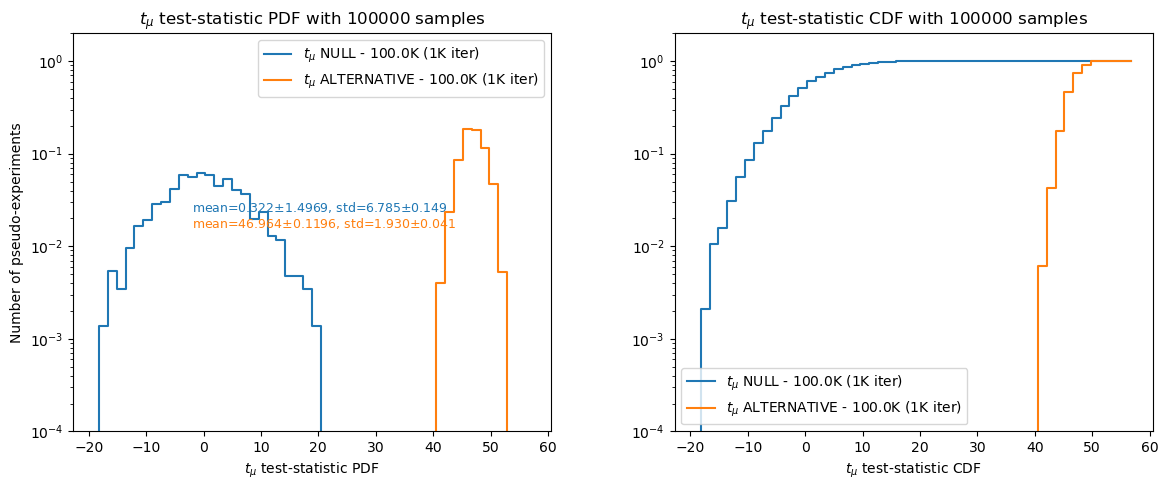

In [17]:
scale = 'log'
num_bins = 50  # number of bins

for nsamples in list(ts_dist_null.keys()):
    # t_mu test-statistic for different values of nsamples
    dist_1 = ts_dist_null[nsamples]/np.sqrt(nsamples)
    dist_2 = ts_dist_alt[nsamples]/np.sqrt(nsamples)
    
    # Compute the mean and standard deviation of the sample and their standard errors
    mu1, deltamu1, sigma1, deltasigma1 = (np.mean(dist_1), se_mean(dist_1), np.std(dist_1), se_std(dist_1))
    mu2, deltamu2, sigma2, deltasigma2 = (np.mean(dist_2), se_mean(dist_2), np.std(dist_2), se_std(dist_2))
    
    # Minimum and maximum x values
    min_tmp = min(np.concatenate((dist_1,dist_2),axis=0))
    if min_tmp < 0:
        min_x = 1.1*min_tmp
    else:
        min_x = 0.9*min_tmp
    max_x = 1.1*max(np.concatenate((dist_1,dist_2),axis=0)) # upper limit of the binning
    
    # Create an array of values
    x = np.linspace(min_x, max_x, num_bins + 1)
    
    # Create histogram for values and normalize counts to sum to 1
    counts1, bin_edges1 = np.histogram(dist_1, bins=x, density=True)
    cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
    counts2, bin_edges2 = np.histogram(dist_2, bins=x, density=True)
    cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
    
    # Get the bin centers
    bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
    bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
    
    # Set up the figure and the two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Draw the first plot
    line1, = ax[0].plot(bin_centers1, counts1, linestyle = '-', label='$t_{\mu}$ NULL - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    line2, = ax[0].plot(bin_centers2, counts2, linestyle = '-', label='$t_{\mu}$ ALTERNATIVE - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    ax[0].text(0.25, 0.58, f'mean={mu1:.3f}$\pm${deltamu1:.4f}, std={sigma1:.3f}$\pm${deltasigma1:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line1.get_color(), fontsize=9)
    ax[0].text(0.25, 0.54, f'mean={mu2:.3f}$\pm${deltamu2:.4f}, std={sigma2:.3f}$\pm${deltasigma2:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line4.get_color(), fontsize=9)
    ax[0].set_yscale(scale)
    ax[0].set_ylim(1e-4, 2)
    ax[0].set_xlabel('$t_{\mu}$ test-statistic PDF')
    ax[0].set_ylabel('Number of pseudo-experiments')
    ax[0].set_title('$t_{\mu}$ test-statistic PDF with '+str(nsamples)+' samples')
    ax[0].legend()
    
    # Draw the second plot
    ax[1].plot(bin_centers1, cum_counts1, linestyle = '-', label='$t_{\mu}$ NULL - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    ax[1].plot(bin_centers2, cum_counts2, linestyle = '-', label='$t_{\mu}$ ALTERNATIVE - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    ax[1].set_yscale(scale)
    ax[1].set_ylim(1e-4, 2)
    ax[1].set_xlabel('$t_{\mu}$ test-statistic CDF')
    ax[1].set_title('$t_{\mu}$ test-statistic CDF with '+str(nsamples)+' samples')
    ax[1].legend()
    
    # Adjust the width space
    plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking
    
    # Display the figure with the two subplots
    plt.tight_layout()
    plt.show()
    plt.close()

In [18]:
from scipy.special import erfinv

# Convert p-value to gaussian sigma (one-sided)
def p_to_sigma_one_sided(p):
    return np.sqrt(2)*erfinv(1-2*p)

# Convert p-value to gaussian sigma (two-sided)
def p_to_sigma_two_sided(p):
    return np.sqrt(2)*erfinv(1-p)

def highlight_significance(row, significance_value):
    color = 'background-color: green' if row['sigma_one_sided'] >= significance_value else ''
    return [color]*len(row)

# Initialize an empty list to store the results
results = []

for nsamples in list(ts_dist_null.keys()):
    null_dist = np.array(ts_dist_null[nsamples]/np.sqrt(nsamples))
    observed_stat_list = []
    p_value_one_sided_list = []
    
    for i in range(len(ts_dist_alt[nsamples])):
        observed_i = ts_dist_alt[nsamples]/np.sqrt(nsamples)
        observed_stat_list.append(observed_i[i])
        p_value_one_sided_list.append(np.sum(null_dist >= observed_stat_list[i]) / len(null_dist))
        #p_value_two_sided.append(np.sum(np.abs(null_dist) >= np.abs(observed_stat)) / len(null_dist))
        # Append the results to the list as a dictionary
    
    results.append({
        'niter': len(null_dist),
        'nobserved': nsamples,
        'n_samples_toys': nsamples,
        'observed_stat_list': observed_stat_list,
        'observed_stat_mean': np.mean(observed_stat_list),
        'mean_alt_dist': np.mean(ts_dist_alt[nsamples]/np.sqrt(nsamples)),
        'std_alt_dist': np.std(ts_dist_alt[nsamples]/np.sqrt(nsamples)),
        'mean_null_dist': np.mean(null_dist),
        'std_null_dist': np.std(null_dist),
        'p_value_one_sided_mean': np.mean(p_value_one_sided_list),
        'sigma_one_sided_mean': p_to_sigma_one_sided(np.mean(p_value_one_sided_list)),
        'p_value_one_sided_list': p_value_one_sided_list,
        'sigma_one_sided_list': np.array([p_to_sigma_one_sided(i) for i in p_value_one_sided_list]),
    })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(results).sort_values(by=['nobserved'])
df

niter  nobserved  n_samples_toys  \
0    993        100             100   
1    988       1000            1000   
2    977      10000           10000   
3    977      12000           12000   
4    985      15000           15000   
5    979      20000           20000   
6    946     100000          100000   

                                  observed_stat_list  observed_stat_mean  \
0  [1.56993408203125, 0.8009765625, 0.41765136718...            0.997001   
1  [4.237760880803379, 6.286570930473408, 2.16594...            4.563302   
2  [13.5509375, 14.043125, 12.7346875, 14.5939062...           14.844351   
3  [14.308895224615755, 16.71937370392788, 13.870...           16.290356   
4  [16.239096373926312, 19.13753165862897, 15.353...           18.225225   
5  [18.967366007287215, 22.048362835438475, 20.72...           21.010850   
6  [47.62568034331964, 49.043961873905154, 42.924...           46.964082   

   mean_alt_dist  std_alt_dist  mean_null_dist  std_null_dist  \
0       0.997001      0.948251       -0.043496       6.103813   
1       4.563302      1.701235       -0.190642       6.093609   
2      14.844351      1.831076       -0.157578       6.184823   
3      16.290356      1.809907       -0.299335       6.254985   
4      18.225225      1.830246       -0.112757       6.540316   
5      21.010850      1.836747       -0.493401       6.585938   
6      46.964082      1.929934        0.321727       6.785383   

   p_value_one_sided_mean  sigma_one_sided_mean  \
0                0.423534              0.192862   
1                0.230195              0.738205   
2                0.006594              2.478642   
3                0.004757              2.592987   
4                0.002397              2.820535   
5                0.000130              3.651375   
6                0.000000                   inf   

                              p_value_one_sided_list  \
0  [0.37865055387714, 0.43303121852970794, 0.4572...   
1  [0.23987854251012145, 0.145748987854251, 0.348...   
2  [0.01023541453428864, 0.008188331627430911, 0....   
3  [0.009211873080859774, 0.0010235414534288639, ...   
4  [0.005076142131979695, 0.0, 0.0091370558375634...   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
6  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                sigma_one_sided_list  
0  [0.3090268430008129, 0.1686620928554086, 0.107...  
1  [0.7066933146218419, 1.054841161698449, 0.3902...  
2  [2.3176044329445054, 2.4004112093409438, 2.188...  
3  [2.3569899360374147, 3.083315078873886, 2.3176...  
4  [2.5705988710662875, inf, 2.3600167145721995, ...  
5  [inf, inf, inf, inf, inf, inf, inf, inf, inf, ...  
6  [inf, inf, inf, inf, inf, inf, inf, inf, inf, ...

#### Mspline 4D (run_1)

In [2]:
start = timer()
run_number = 1
run = "/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MsplineN_final/run_"+str(run_number)+"/results.txt"
tmp = pd.read_csv(run)
#tmp.columns
#X_data_nf = np.load(run.replace("results.txt","nf_sample.npy"))
#np.shape(X_data_nf)
run_n = int(tmp["run_n"])
seed_train = int(tmp["seed_train"])
seed_test = int(tmp["seed_test"])
ndims = int(tmp["ndims"])
print("Ndims =", ndims)
nsamples = int(tmp["nsamples"])
print("Nsamples =", nsamples)
nbijectors = int(tmp["nbijectors"])
bijector = str(tmp["bijector"][0])
activation = str(tmp["activation"][0])
spline_knots = int(tmp["spline_knots"])
range_min = int(tmp["range_min"])
eps_regulariser = tmp["eps_regulariser"][0]
regulariser = tmp["regulariser"][0]
hidden_layers_string = str(tmp["hidden_layers"][0])
hidden_layers = [int(i) for i in hidden_layers_string.split('-')]
batch_size = int(tmp["batch_size"])
epochs_input = int(tmp["epochs_input"])
epochs_output = int(tmp["epochs_output"])
training_time = tmp["training_time"][0]
prediction_time = tmp["prediction_time"][0]
total_time = tmp["total_time"][0]
training_device = tmp["training_device"]

ncomp = 3
ntest_samples = 100000

# Rebuid the model
targ_dist = MixtureDistributions.MixMultiNormal1(n_components = ncomp,
                                                 n_dimensions = ndims,
                                                 seed = 0,
                                                 dtype = tf.float32)
bijector = Bijectors.ChooseBijector(bijector_name = bijector,
                                    ndims = ndims,
                                    spline_knots = spline_knots,
                                    nbijectors = nbijectors,
                                    range_min = range_min,
                                    hidden_layers = hidden_layers,
                                    activation = activation,
                                    regulariser = regulariser,
                                    eps_regulariser = eps_regulariser,
                                    perm_style='bi-partition',
                                    shuffle='Noshuffle')
base_dist = Distributions.gaussians(ndims = ndims,
                                    dtype = targ_dist.dtype)
nf_dist = tfd.TransformedDistribution(distribution = base_dist, 
                                      bijector = bijector)
nf_dist, _ = Utils.load_model(nf_dist = nf_dist,
                              path_to_results = run.replace("results.txt",""),
                              ndims = ndims,
                              lr = .000001,
                              dtype = targ_dist.dtype)
end = timer()
print("Model\n",run.replace("results.txt",""),"\nsuccesfully loaded in",end-start,"s.")

Ndims = 4
Nsamples = 100000
Model
 /mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MsplineN_final/run_1/ 
succesfully loaded in 4.720552604063414 s.


In [3]:
dist0 = targ_dist
dist1 = nf_dist
print("dist0.dtype:",dist0.dtype,"\ndist1.dtype:",dist1.dtype)

dist0.dtype: <dtype: 'float32'> 
dist1.dtype: <dtype: 'float32'>


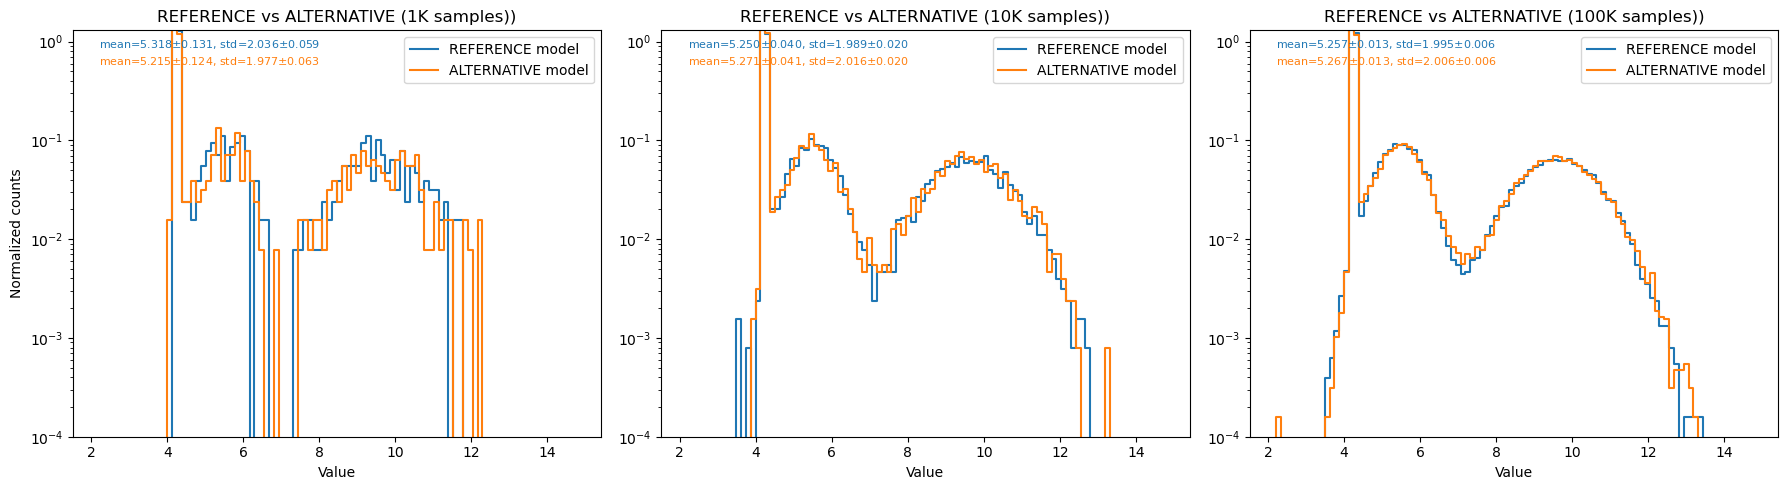

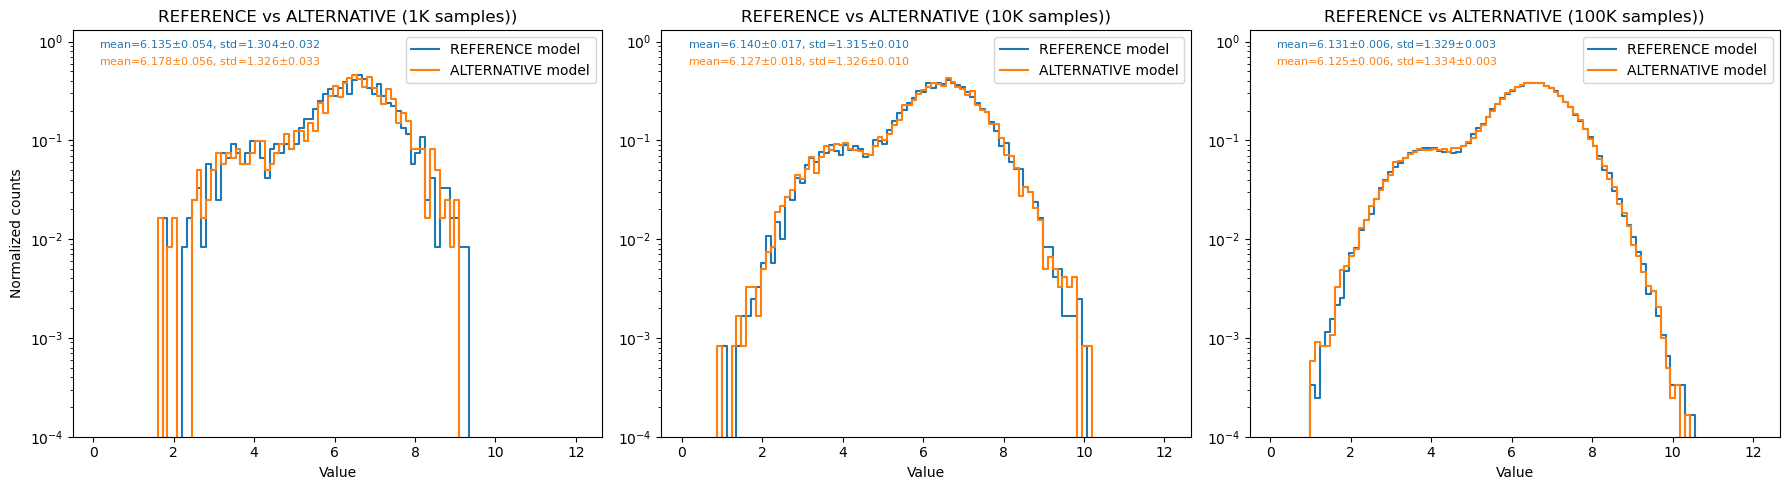

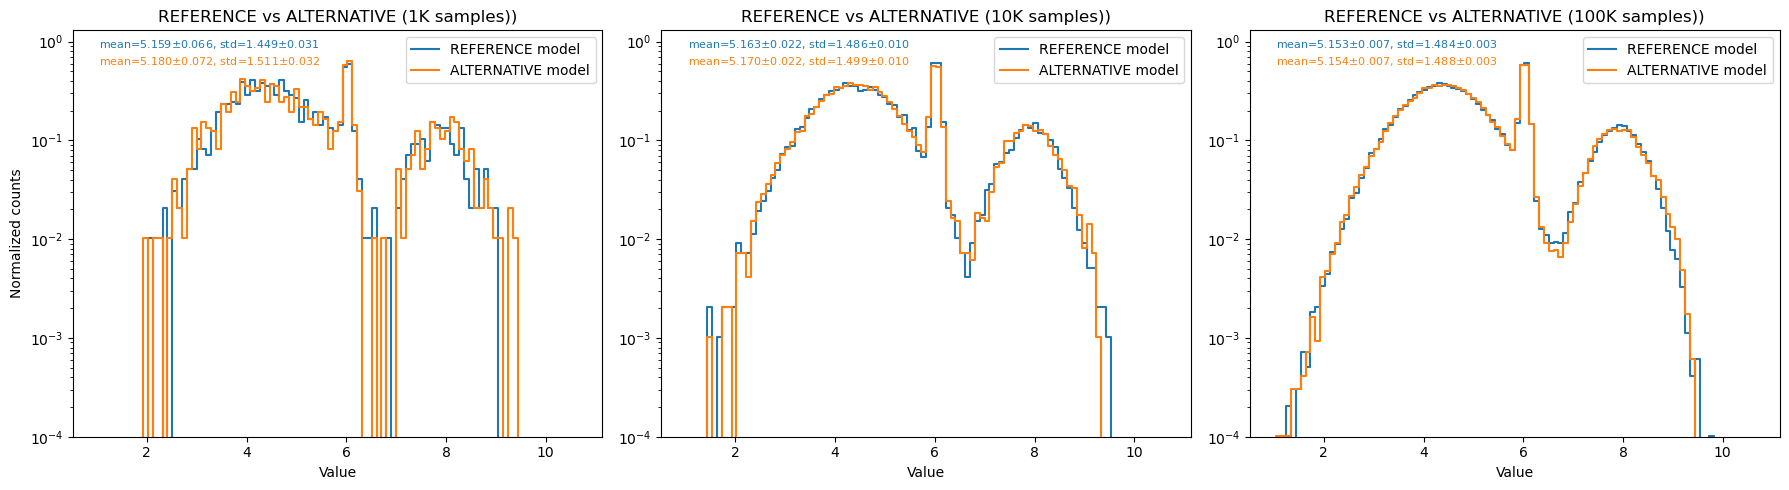

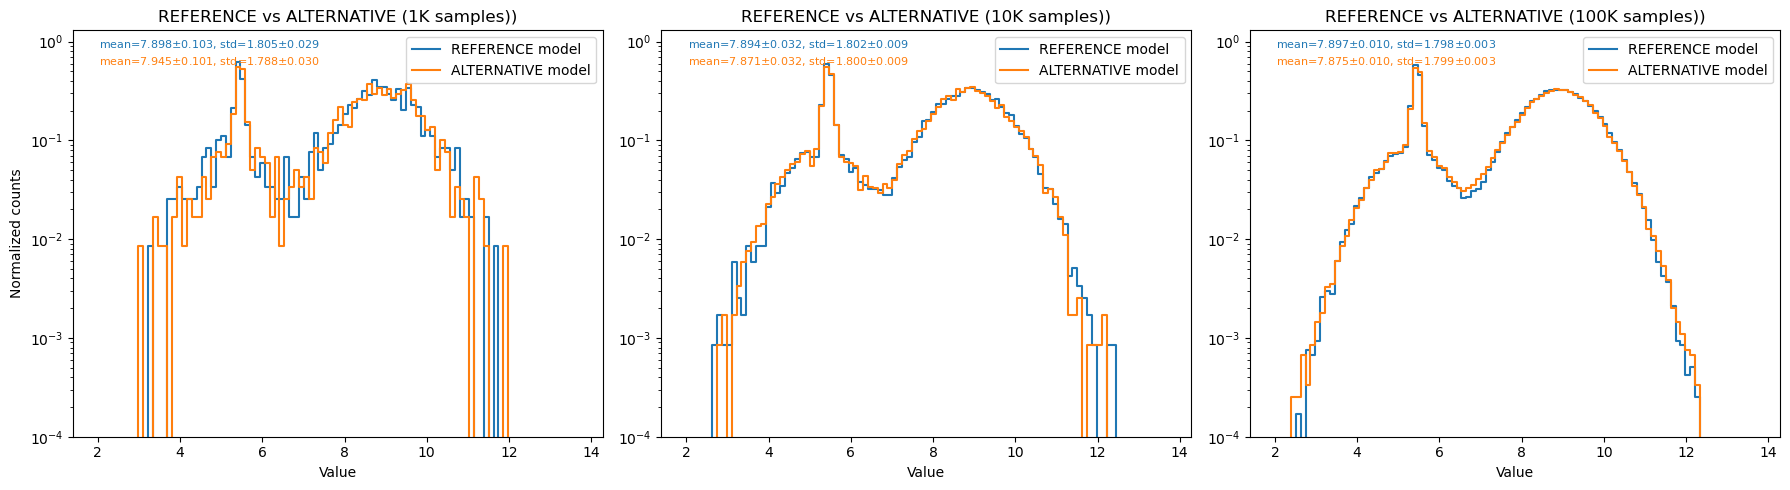

In [4]:
for dim in [0,1,2,3]:
    scale = 'log'
    num_bins = 100  # number of bins
    nsamples1 = 1000
    nsamples2 = 10000
    nsamples3 = 100000

    # KS statistic for different values of the 'niter' parameter
    sample0 = dist0.sample(nsamples1).numpy()[:,dim]
    sample1 = dist1.sample(nsamples1).numpy()[:,dim]

    sample2 = dist0.sample(nsamples2).numpy()[:,dim]
    sample3 = dist1.sample(nsamples2).numpy()[:,dim]

    sample4 = dist0.sample(nsamples3).numpy()[:,dim]
    sample5 = dist1.sample(nsamples3).numpy()[:,dim]

    # Compute the mean and standard deviation of the sample and their standard errors
    mu0, deltamu0, sigma0, deltasigma0 = (np.mean(sample0), se_mean(sample0), np.std(sample0), se_std(sample0))
    mu1, deltamu1, sigma1, deltasigma1 = (np.mean(sample1), se_mean(sample1), np.std(sample1), se_std(sample1))
    mu2, deltamu2, sigma2, deltasigma2 = (np.mean(sample2), se_mean(sample2), np.std(sample2), se_std(sample2))
    mu3, deltamu3, sigma3, deltasigma3 = (np.mean(sample3), se_mean(sample3), np.std(sample3), se_std(sample3))
    mu4, deltamu4, sigma4, deltasigma4 = (np.mean(sample4), se_mean(sample4), np.std(sample4), se_std(sample4))
    mu5, deltamu5, sigma5, deltasigma5 = (np.mean(sample5), se_mean(sample5), np.std(sample5), se_std(sample5))

    # Minimum and maximum x values
    min_x = 0.9*min(np.concatenate((sample4,sample5),axis=0)) # lower limit of the binning
    max_x = 1.1*max(np.concatenate((sample4,sample5),axis=0)) # upper limit of the binning

    # Create an array of values
    x = np.linspace(min_x, max_x, num_bins + 1)

    # Create histogram for values and normalize counts to sum to 1
    counts0, bin_edges = np.histogram(sample0, bins=x, density=True)
    counts1, bin_edges = np.histogram(sample1, bins=x, density=True)
    counts2, bin_edges = np.histogram(sample2, bins=x, density=True)
    counts3, bin_edges = np.histogram(sample3, bins=x, density=True)
    counts4, bin_edges = np.histogram(sample4, bins=x, density=True)
    counts5, bin_edges = np.histogram(sample5, bins=x, density=True)

    # Get the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Set up the figure and the two subplots
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    # Draw the first plot
    line1, = ax[0].plot(bin_centers, counts0, '-',label='REFERENCE model', drawstyle='steps-mid',)
    line2, = ax[0].plot(bin_centers, counts1, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
    ax[0].text(0.05, 0.98, f'mean={mu0:.3f}$\pm${deltamu0:.3f}, std={sigma0:.3f}$\pm${deltasigma0:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line1.get_color(), fontsize=8)
    ax[0].text(0.05, 0.94, f'mean={mu1:.3f}$\pm${deltamu1:.3f}, std={sigma1:.3f}$\pm${deltasigma1:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line2.get_color(), fontsize=8)
    # Draw the second plot
    ax[0].set_yscale(scale)
    ax[0].set_ylim(1e-4, 1.3)
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Normalized counts')
    ax[0].set_title('REFERENCE vs ALTERNATIVE (1K samples))')
    ax[0].legend()

    # Draw the second plot
    line3, = ax[1].plot(bin_centers, counts2, '-',label='REFERENCE model', drawstyle='steps-mid')
    line4, = ax[1].plot(bin_centers, counts3, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
    ax[1].text(0.05, 0.98, f'mean={mu2:.3f}$\pm${deltamu2:.3f}, std={sigma2:.3f}$\pm${deltasigma2:.3f}', transform=ax[1].transAxes, verticalalignment='top', color=line3.get_color(), fontsize=8)
    ax[1].text(0.05, 0.94, f'mean={mu3:.3f}$\pm${deltamu3:.3f}, std={sigma3:.3f}$\pm${deltasigma3:.3f}', transform=ax[1].transAxes, verticalalignment='top', color=line4.get_color(), fontsize=8)
    ax[1].set_yscale(scale)
    ax[1].set_ylim(1e-4, 1.3)
    ax[1].set_xlabel('Value')
    ax[1].set_title('REFERENCE vs ALTERNATIVE (10K samples))')
    ax[1].legend()

    # Draw the third plot
    line5, = ax[2].plot(bin_centers, counts4, '-',label='REFERENCE model', drawstyle='steps-mid')
    line6, = ax[2].plot(bin_centers, counts5, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
    ax[2].text(0.05, 0.98, f'mean={mu4:.3f}$\pm${deltamu4:.3f}, std={sigma4:.3f}$\pm${deltasigma4:.3f}', transform=ax[2].transAxes, verticalalignment='top', color=line5.get_color(), fontsize=8)
    ax[2].text(0.05, 0.94, f'mean={mu5:.3f}$\pm${deltamu5:.3f}, std={sigma5:.3f}$\pm${deltasigma5:.3f}', transform=ax[2].transAxes, verticalalignment='top', color=line6.get_color(), fontsize=8)
    ax[2].set_yscale(scale)
    ax[2].set_ylim(1e-4, 1.3)
    ax[2].set_xlabel('Value')
    ax[2].set_title('REFERENCE vs ALTERNATIVE (100K samples))')
    ax[2].legend()

    # Adjust the width space
    plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

    # Display the figure with the two subplots
    plt.tight_layout()
    plt.show()
    plt.close()

In [5]:
# Create a dictionary with the data
data = {
    'Sample Size': [nsamples1, nsamples1, nsamples2, nsamples2, nsamples3, nsamples3],
    'Mean': [mu0, mu1, mu2, mu3, mu4, mu5],
    'Delta Mean': [deltamu0, deltamu1, deltamu2, deltamu3, deltamu4, deltamu5],
    'Std Dev': [sigma0, sigma1, sigma2, sigma3, sigma4, sigma5],
    'Delta Std Dev': [deltasigma0, deltasigma1, deltasigma2, deltasigma3, deltasigma4, deltasigma5]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
df

Sample Size      Mean  Delta Mean   Std Dev  Delta Std Dev
0         1000  7.898300    0.103077  1.805429       0.029297
1         1000  7.945191    0.101101  1.788042       0.029676
2        10000  7.894096    0.032490  1.802485       0.009250
3        10000  7.871403    0.032383  1.799541       0.009230
4       100000  7.896585    0.010222  1.797926       0.002924
5       100000  7.875117    0.010229  1.798509       0.002893

In [11]:
conditional_print = GMetrics.utils.conditional_print
print_sampling_time = False
print_log_prob_time = False
print_nsamples = False
print_niter = False

def clip_to_boundaries(sample_ref_1, sample_alt_1):
    # Calculate the min and max of each dimension in sample_ref_1
    min_vals = np.min(sample_ref_1, axis=0)
    max_vals = np.max(sample_ref_1, axis=0)

    # Clip sample_alt_1 to these min and max values
    sample_alt_1_clipped = np.clip(sample_alt_1, min_vals, max_vals)

    return sample_alt_1_clipped


niter = 1000
nsamples_list = [100,1000,10000,20000,50000,60000,100000]
compute_alternative = True

start_all = timer()

ts_dist_null = {}
ts_dist_null_tmp = {}
if compute_alternative:
    ts_dist_alt = {}
    ts_dist_alt_tmp = {}

nsamples_max = np.max(nsamples_list)

for i in range(niter):
    conditional_print(print_niter,"\n============================================")
    conditional_print(print_niter,"Number of pseudo-experiment:", i)
    start_iter = timer()
    
    ts_dist_null_tmp[i] = {}
    if compute_alternative:
        ts_dist_alt_tmp[i] = {}

    # Sample from the REFERENCE and ALTERNATIVE distributions
    start = timer()
    sample_ref_1 = dist0.sample(3*nsamples_max)
    end = timer()
    conditional_print(print_sampling_time,"Time to sample",3*nsamples,"samples from the REFERENCE distribution:",end-start,"s.")
    if compute_alternative:
        start = timer()
        sample_alt_1 = dist1.sample(2*nsamples_max)
        end = timer()
        sample_alt_1 = clip_to_boundaries(sample_ref_1, sample_alt_1)
        conditional_print(print_sampling_time,"Time to sample",nsamples,"samples from the ALTERNATIVE distribution:",end-start,"s.")
    
    # Compute the log-probability of the samples under the REFERENCE and ALTERNATIVE distributions
    start = timer()
    logprob_ref_ref = dist0.log_prob(sample_ref_1)
    end = timer()
    conditional_print(print_log_prob_time,"Time to compute log_prob of dist0 for",3*nsamples,"samples from dist0:",end-start,"s.")
    start = timer()
    logprob_alt_ref = dist1.log_prob(sample_ref_1)
    end = timer()
    conditional_print(print_log_prob_time,"Time to compute log_prob of dist1 for",3*nsamples,"samples from dist0:",end-start,"s.")
    if compute_alternative:
        start = timer()
        logprob_ref_alt = dist0.log_prob(sample_alt_1)
        end = timer()
        conditional_print(print_log_prob_time,"Time to compute log_prob of dist0 for",nsamples,"samples from dist1:",end-start,"s.")
        start = timer()
        logprob_alt_alt = dist1.log_prob(sample_alt_1)
        end = timer()
        conditional_print(print_log_prob_time,"Time to compute log_prob of dist1 for",nsamples,"samples from dist1:",end-start,"s.")

    tf_dist_null_list = []
    if compute_alternative:
        tf_dist_alt_list = []

    for nsamples in nsamples_list:
        conditional_print(print_nsamples,"\n--------------------------------------------")
        conditional_print(print_nsamples,"Number of samples:", nsamples)
        start_nsamples = timer()
        
        # Generate independent samples from the REFERENCE and ALTERNATIVE distributions
        logprob_ref_ref_reduced_1 = logprob_ref_ref[:nsamples]
        logprob_ref_ref_reduced_2 = logprob_alt_ref[nsamples:2*nsamples]
        logprob_ref_ref_reduced_3 = logprob_ref_alt[2*nsamples:3*nsamples]
        logprob_alt_ref_reduced = logprob_alt_alt[:nsamples]
        if compute_alternative:
            logprob_ref_alt_reduced = logprob_ref_alt[:nsamples]
            logprob_alt_alt_reduced = logprob_alt_alt[:nsamples]

        lik_ref_dist = tf.reduce_sum(logprob_ref_ref_reduced_1)+tf.reduce_sum(logprob_ref_ref_reduced_2)
        lik_alt_dist = tf.reduce_sum(logprob_ref_ref_reduced_1)+tf.reduce_sum(logprob_alt_ref_reduced)
        ts_dist_null_tmp[i][nsamples] = 2*(lik_alt_dist-lik_ref_dist).numpy()

        if compute_alternative:
            lik_ref_dist = tf.reduce_sum(logprob_ref_ref_reduced_3)+tf.reduce_sum(logprob_ref_alt_reduced)
            lik_alt_dist = tf.reduce_sum(logprob_ref_ref_reduced_3)+tf.reduce_sum(logprob_alt_alt_reduced)
            ts_dist_alt_tmp[i][nsamples] = 2*(lik_alt_dist-lik_ref_dist).numpy()
        end_nsamples = timer()
        conditional_print(print_nsamples,"Time elapsed for",nsamples,"samples:",end_nsamples-start_nsamples,"s.")
    end_iter = timer()
    conditional_print(print_niter,"Time elapsed for pseudo-experiment",i,":",end_iter-start_iter,"s.")
end_all = timer()
print("Total time elapsed:",end_all-start_all,"s.")

Total time elapsed: 301.45835452200845 s.


In [15]:
for nsamples in nsamples_list:
    
    arr = np.array([ts_dist_null_tmp[i][nsamples] for i in range(niter)])
    mask = ~np.isfinite(arr)
    non_finite_fraction = np.sum(mask) / len(arr)
    if non_finite_fraction > 0:
        print(f"Warning: Removed {non_finite_fraction*100:.2f}% of the null distribution samples due to non-finite values for nsamples={nsamples}")
    arr_no_nan_inf = arr[~mask]
    Q1 = np.percentile(arr_no_nan_inf, 25)
    Q3 = np.percentile(arr_no_nan_inf, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (arr_no_nan_inf < lower_bound) | (arr_no_nan_inf > upper_bound)
    print(f"Warning: Removed {np.sum(outliers)} outliers ({np.sum(outliers)/len(arr_no_nan_inf)*100:.2f}%) from the null distribution samples for nsamples={nsamples}")
    data_clean = arr_no_nan_inf[~outliers]
    ts_dist_null[nsamples] = data_clean
    
    if compute_alternative:
        
        arr = np.array([ts_dist_alt_tmp[i][nsamples] for i in range(niter)])
        mask = ~np.isfinite(arr)
        non_finite_fraction = np.sum(mask) / len(arr)
        if non_finite_fraction > 0:
            print(f"Warning: Removed {non_finite_fraction*100:.2f}% of the alternative distribution samples due to non-finite values for nsamples={nsamples}")
        arr_no_nan_inf = arr[~mask]
        Q1 = np.percentile(arr_no_nan_inf, 25)
        Q3 = np.percentile(arr_no_nan_inf, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (arr_no_nan_inf < lower_bound) | (arr_no_nan_inf > upper_bound)
        print(f"Warning: Removed {np.sum(outliers)} outliers ({np.sum(outliers)/len(arr_no_nan_inf)*100:.2f}%) from the alternative distribution samples for nsamples={nsamples}")
        data_clean = arr_no_nan_inf[~outliers]
        ts_dist_alt[nsamples] = data_clean


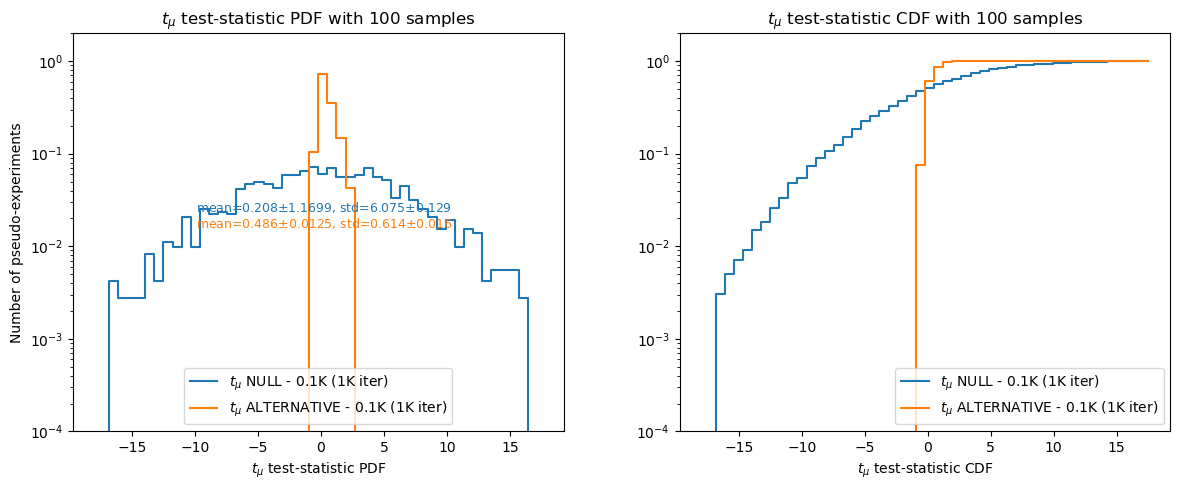

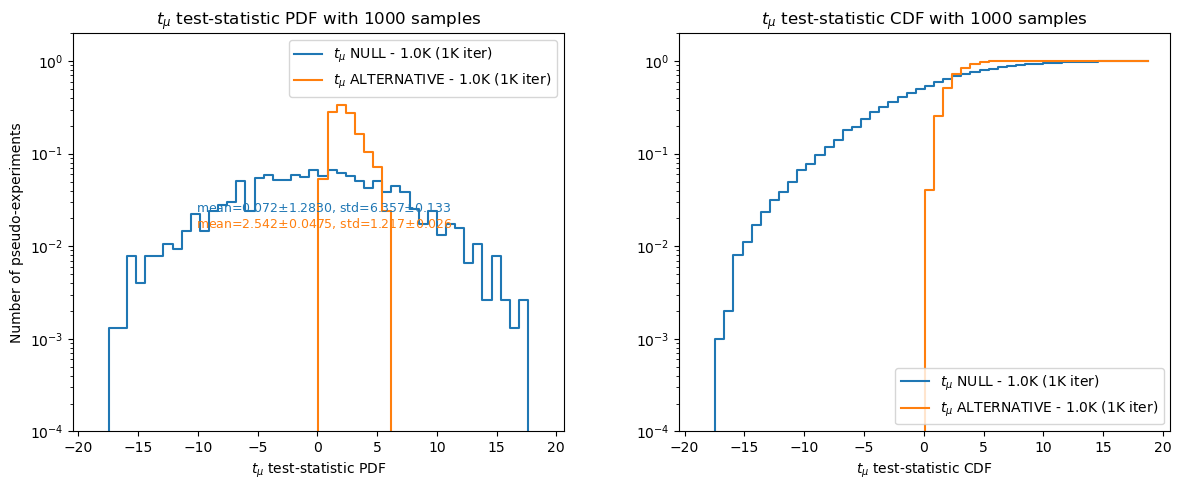

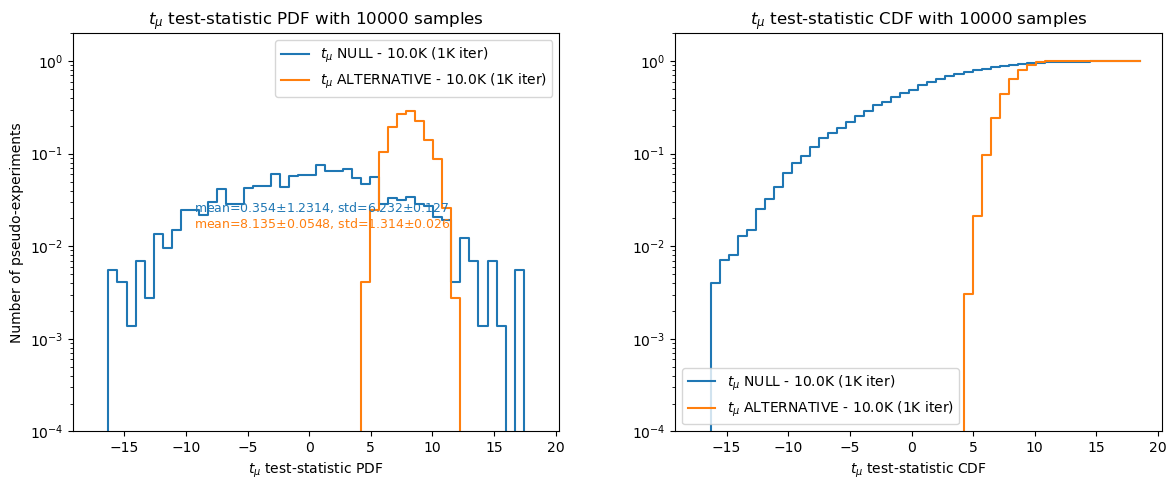

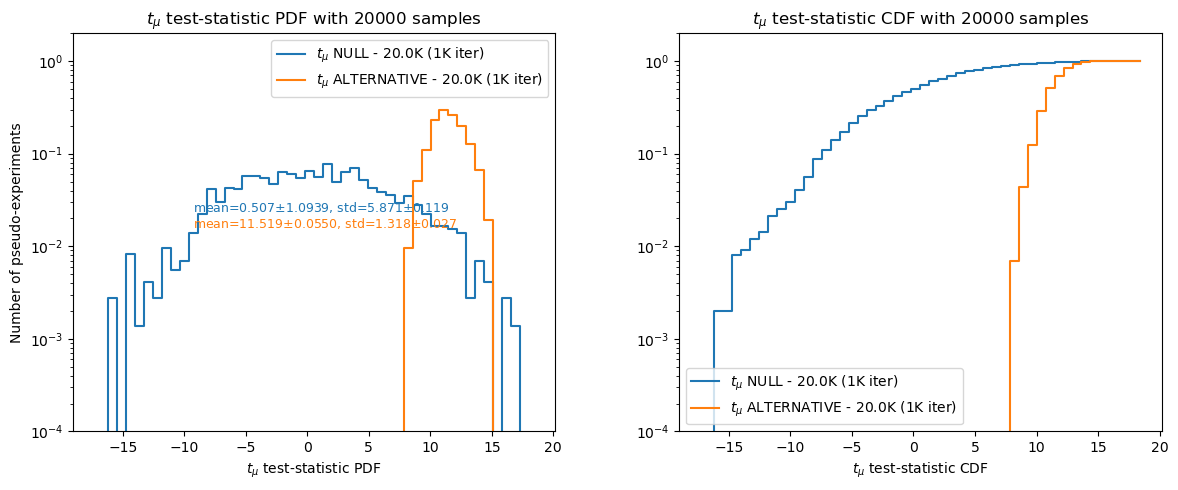

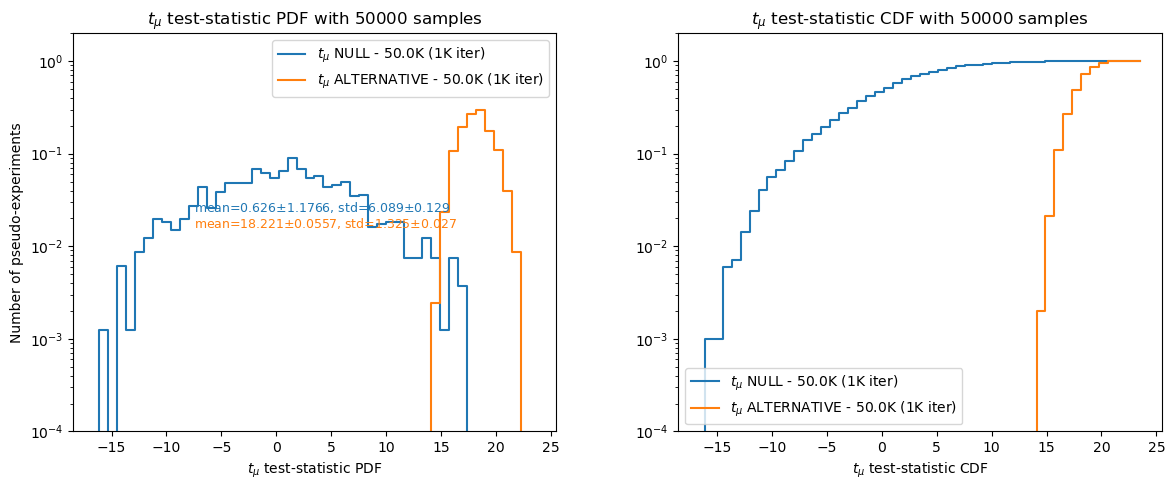

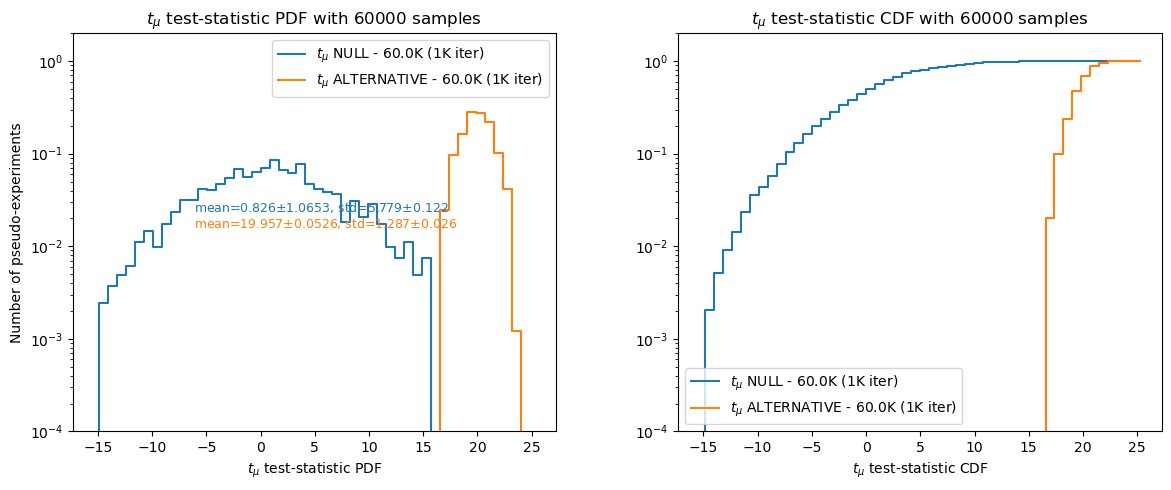

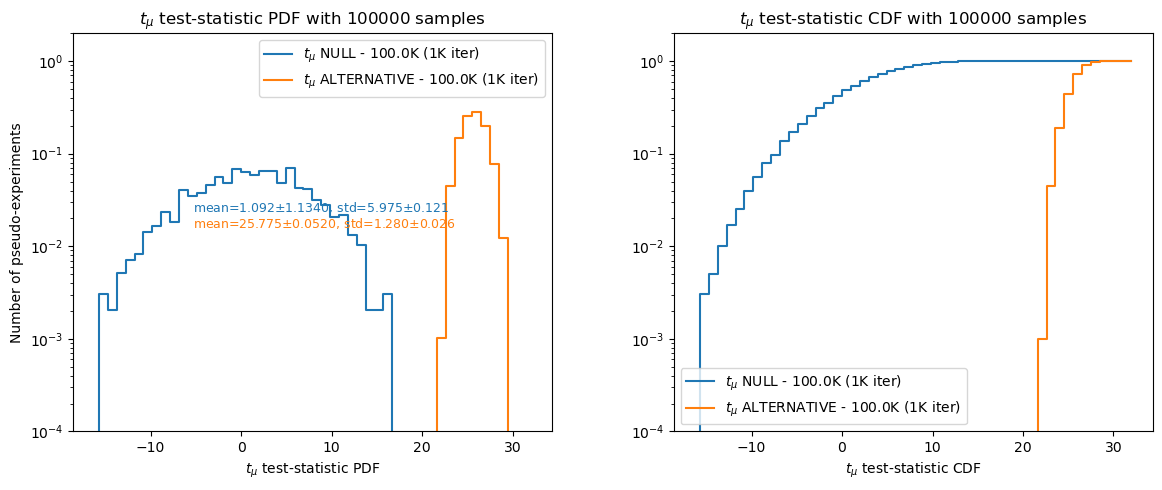

In [16]:
scale = 'log'
num_bins = 50  # number of bins

for nsamples in list(ts_dist_null.keys()):
    # t_mu test-statistic for different values of nsamples
    dist_1 = ts_dist_null[nsamples]/np.sqrt(nsamples)
    dist_2 = ts_dist_alt[nsamples]/np.sqrt(nsamples)
    
    # Compute the mean and standard deviation of the sample and their standard errors
    mu1, deltamu1, sigma1, deltasigma1 = (np.mean(dist_1), se_mean(dist_1), np.std(dist_1), se_std(dist_1))
    mu2, deltamu2, sigma2, deltasigma2 = (np.mean(dist_2), se_mean(dist_2), np.std(dist_2), se_std(dist_2))
    
    # Minimum and maximum x values
    min_tmp = min(np.concatenate((dist_1,dist_2),axis=0))
    if min_tmp < 0:
        min_x = 1.1*min_tmp
    else:
        min_x = 0.9*min_tmp
    max_x = 1.1*max(np.concatenate((dist_1,dist_2),axis=0)) # upper limit of the binning
    
    # Create an array of values
    x = np.linspace(min_x, max_x, num_bins + 1)
    
    # Create histogram for values and normalize counts to sum to 1
    counts1, bin_edges1 = np.histogram(dist_1, bins=x, density=True)
    cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
    counts2, bin_edges2 = np.histogram(dist_2, bins=x, density=True)
    cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
    
    # Get the bin centers
    bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
    bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
    
    # Set up the figure and the two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Draw the first plot
    line1, = ax[0].plot(bin_centers1, counts1, linestyle = '-', label='$t_{\mu}$ NULL - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    line2, = ax[0].plot(bin_centers2, counts2, linestyle = '-', label='$t_{\mu}$ ALTERNATIVE - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    ax[0].text(0.25, 0.58, f'mean={mu1:.3f}$\pm${deltamu1:.4f}, std={sigma1:.3f}$\pm${deltasigma1:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line1.get_color(), fontsize=9)
    ax[0].text(0.25, 0.54, f'mean={mu2:.3f}$\pm${deltamu2:.4f}, std={sigma2:.3f}$\pm${deltasigma2:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line4.get_color(), fontsize=9)
    ax[0].set_yscale(scale)
    ax[0].set_ylim(1e-4, 2)
    ax[0].set_xlabel('$t_{\mu}$ test-statistic PDF')
    ax[0].set_ylabel('Number of pseudo-experiments')
    ax[0].set_title('$t_{\mu}$ test-statistic PDF with '+str(nsamples)+' samples')
    ax[0].legend()
    
    # Draw the second plot
    ax[1].plot(bin_centers1, cum_counts1, linestyle = '-', label='$t_{\mu}$ NULL - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    ax[1].plot(bin_centers2, cum_counts2, linestyle = '-', label='$t_{\mu}$ ALTERNATIVE - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    ax[1].set_yscale(scale)
    ax[1].set_ylim(1e-4, 2)
    ax[1].set_xlabel('$t_{\mu}$ test-statistic CDF')
    ax[1].set_title('$t_{\mu}$ test-statistic CDF with '+str(nsamples)+' samples')
    ax[1].legend()
    
    # Adjust the width space
    plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking
    
    # Display the figure with the two subplots
    plt.tight_layout()
    plt.show()
    plt.close()

In [17]:
from scipy.special import erfinv

# Convert p-value to gaussian sigma (one-sided)
def p_to_sigma_one_sided(p):
    return np.sqrt(2)*erfinv(1-2*p)

# Convert p-value to gaussian sigma (two-sided)
def p_to_sigma_two_sided(p):
    return np.sqrt(2)*erfinv(1-p)

def highlight_significance(row, significance_value):
    color = 'background-color: green' if row['sigma_one_sided'] >= significance_value else ''
    return [color]*len(row)

# Initialize an empty list to store the results
results = []

for nsamples in list(ts_dist_null.keys()):
    null_dist = np.array(ts_dist_null[nsamples]/np.sqrt(nsamples))
    observed_stat_list = []
    p_value_one_sided_list = []
    
    for i in range(len(ts_dist_alt[nsamples])):
        observed_i = ts_dist_alt[nsamples]/np.sqrt(nsamples)
        observed_stat_list.append(observed_i[i])
        p_value_one_sided_list.append(np.sum(null_dist >= observed_stat_list[i]) / len(null_dist))
        #p_value_two_sided.append(np.sum(np.abs(null_dist) >= np.abs(observed_stat)) / len(null_dist))
        # Append the results to the list as a dictionary
    
    results.append({
        'niter': len(null_dist),
        'nobserved': nsamples,
        'n_samples_toys': nsamples,
        'observed_stat_list': observed_stat_list,
        'observed_stat_mean': np.mean(observed_stat_list),
        'mean_alt_dist': np.mean(ts_dist_alt[nsamples]/np.sqrt(nsamples)),
        'std_alt_dist': np.std(ts_dist_alt[nsamples]/np.sqrt(nsamples)),
        'mean_null_dist': np.mean(null_dist),
        'std_null_dist': np.std(null_dist),
        'p_value_one_sided_mean': np.mean(p_value_one_sided_list),
        'sigma_one_sided_mean': p_to_sigma_one_sided(np.mean(p_value_one_sided_list)),
        'p_value_one_sided_list': p_value_one_sided_list,
        'sigma_one_sided_list': np.array([p_to_sigma_one_sided(i) for i in p_value_one_sided_list]),
    })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(results).sort_values(by=['nobserved'])
df

niter  nobserved  n_samples_toys  \
0    995        100             100   
1    992       1000            1000   
2    995      10000           10000   
3    993      20000           20000   
4    993      50000           50000   
5    983      60000           60000   
6    991     100000          100000   

                                  observed_stat_list  observed_stat_mean  \
0  [0.537274169921875, 0.486767578125, 1.33784790...            0.485996   
1  [1.0259799873415436, 3.027417635344597, 2.2013...            2.542388   
2  [7.7353125, 6.0659375, 8.31625, 7.6675, 7.6885...            8.135076   
3  [11.214271607880402, 11.237142092834404, 11.47...           11.519423   
4  [17.310240739317436, 17.09166509451683, 18.043...           18.221128   
5  [18.320907500110472, 18.751609446549846, 20.19...           19.957253   
6  [24.58799348310859, 24.601334341987425, 25.458...           25.774893   

   mean_alt_dist  std_alt_dist  mean_null_dist  std_null_dist  \
0       0.485996      0.614182        0.208206       6.074690   
1       2.542388      1.217351        0.072300       6.356720   
2       8.135076      1.313509        0.353813       6.232495   
3      11.519423      1.318177        0.507015       5.871290   
4      18.221128      1.325349        0.625672       6.089175   
5      19.957253      1.286763        0.826015       5.779217   
6      25.774893      1.280377        1.092295       5.974928   

   p_value_one_sided_mean  sigma_one_sided_mean  \
0                0.483701              0.040868   
1                0.353093              0.376983   
2                0.116315              1.193611   
3                0.035624              1.803892   
4                0.000912              3.117516   
5                0.000000                   inf   
6                0.000000                   inf   

                              p_value_one_sided_list  \
0  [0.4844221105527638, 0.4844221105527638, 0.429...   
1  [0.4415322580645161, 0.3215725806451613, 0.369...   
2  [0.1306532663316583, 0.1798994974874372, 0.108...   
3  [0.03726082578046324, 0.03726082578046324, 0.0...   
4  [0.0, 0.0010070493454179255, 0.0, 0.0, 0.0, 0....   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
6  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                sigma_one_sided_list  
0  [0.039057906478826745, 0.039057906478826745, 0...  
1  [0.14708552355463042, 0.46330583867125313, 0.3...  
2  [1.1233084114047092, 0.9157481676078475, 1.234...  
3  [1.78339730547844, 1.78339730547844, 1.8218394...  
4  [inf, 3.088145446416572, inf, inf, inf, inf, i...  
5  [inf, inf, inf, inf, inf, inf, inf, inf, inf, ...  
6  [inf, inf, inf, inf, inf, inf, inf, inf, inf, ...

#### MAF 100D (run 202)

In [2]:
start = timer()
run_number = 202
run = "/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN_final/run_"+str(run_number)+"/results.txt"
tmp = pd.read_csv(run)
#tmp.columns
#X_data_nf = np.load(run.replace("results.txt","nf_sample.npy"))
#np.shape(X_data_nf)
run_n = int(tmp["run_n"])
seed_train = int(tmp["seed_train"])
seed_test = int(tmp["seed_test"])
ndims = int(tmp["ndims"])
print("Ndims =", ndims)
nsamples = int(tmp["nsamples"])
print("Nsamples =", nsamples)
nbijectors = int(tmp["nbijectors"])
bijector = str(tmp["bijector"][0])
activation = str(tmp["activation"][0])
spline_knots = int(tmp["spline_knots"])
range_min = int(tmp["range_min"])
eps_regulariser = tmp["eps_regulariser"][0]
regulariser = tmp["regulariser"][0]
hidden_layers_string = str(tmp["hidden_layers"][0])
hidden_layers = [int(i) for i in hidden_layers_string.split('-')]
batch_size = int(tmp["batch_size"])
epochs_input = int(tmp["epochs_input"])
epochs_output = int(tmp["epochs_output"])
training_time = tmp["training_time"][0]
prediction_time = tmp["prediction_time"][0]
total_time = tmp["total_time"][0]
training_device = tmp["training_device"]

ncomp = 3
ntest_samples = 100000

# Rebuid the model
targ_dist = MixtureDistributions.MixMultiNormal1(n_components = ncomp,
                                                 n_dimensions = ndims,
                                                 seed = 0,
                                                 dtype = tf.float32)
bijector = Bijectors.ChooseBijector(bijector_name = bijector,
                                    ndims = ndims,
                                    spline_knots = spline_knots,
                                    nbijectors = nbijectors,
                                    range_min = range_min,
                                    hidden_layers = hidden_layers,
                                    activation = activation,
                                    regulariser = regulariser,
                                    eps_regulariser = eps_regulariser,
                                    perm_style='bi-partition',
                                    shuffle='Noshuffle')
base_dist = Distributions.gaussians(ndims = ndims,
                                    dtype = targ_dist.dtype)
nf_dist = tfd.TransformedDistribution(distribution = base_dist, 
                                      bijector = bijector)
nf_dist, _ = Utils.load_model(nf_dist = nf_dist,
                              path_to_results = run.replace("results.txt",""),
                              ndims = ndims,
                              lr = .000001,
                              dtype = targ_dist.dtype)
end = timer()
print("Model\n",run.replace("results.txt",""),"\nsuccesfully loaded in",end-start,"s.")

Ndims = 100
Nsamples = 100000


Model
 /mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN_final/run_202/ 
succesfully loaded in 2.1213083610637113 s.


In [3]:
dist0 = targ_dist
dist1 = nf_dist
print("dist0.dtype:",dist0.dtype,"\ndist1.dtype:",dist1.dtype)

dist0.dtype: <dtype: 'float32'> 
dist1.dtype: <dtype: 'float32'>


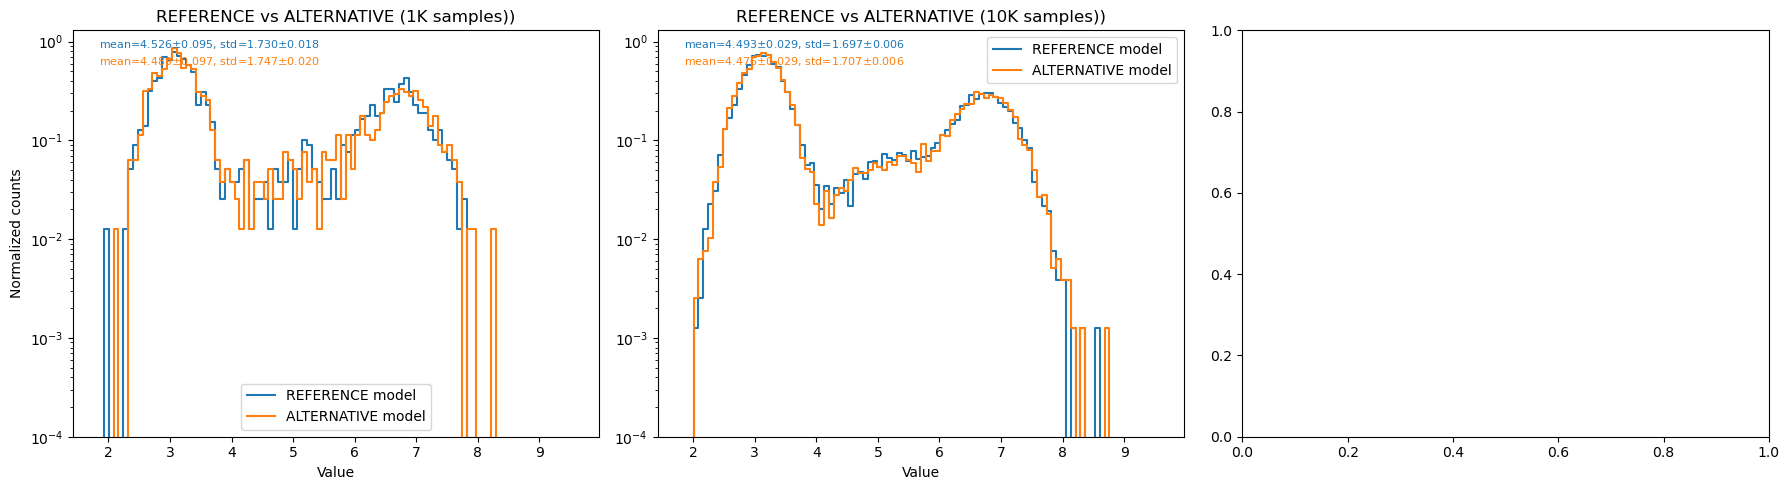

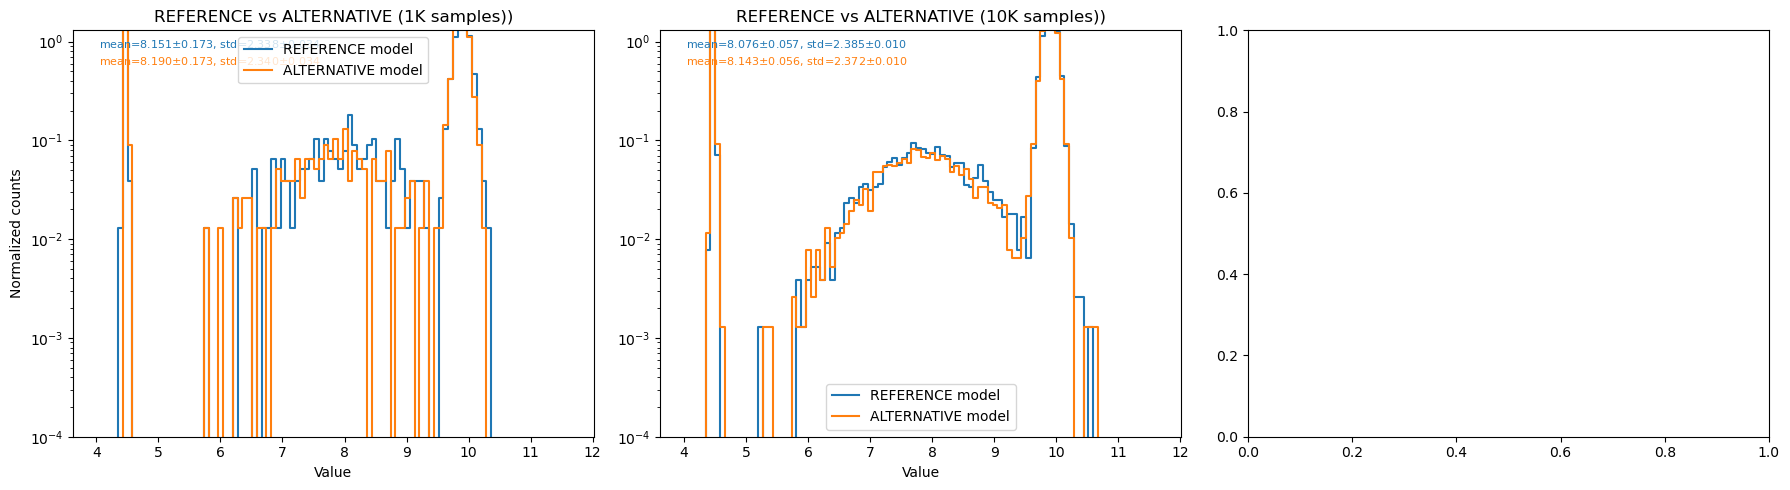

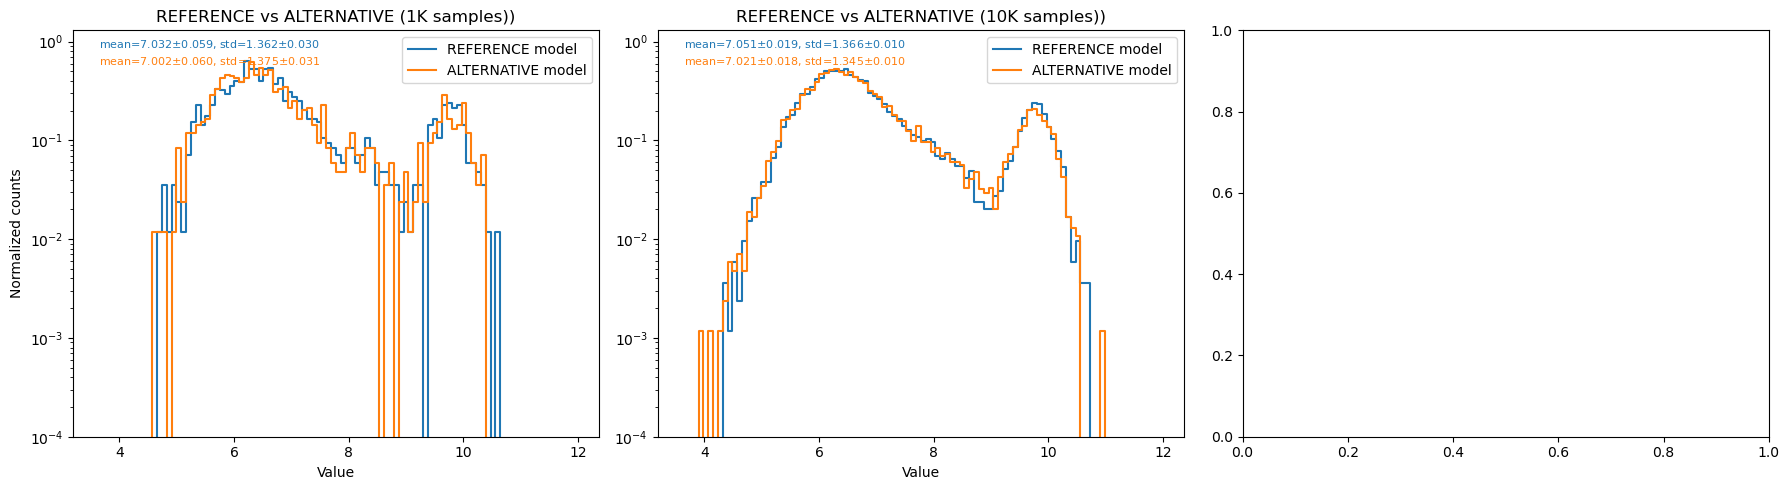

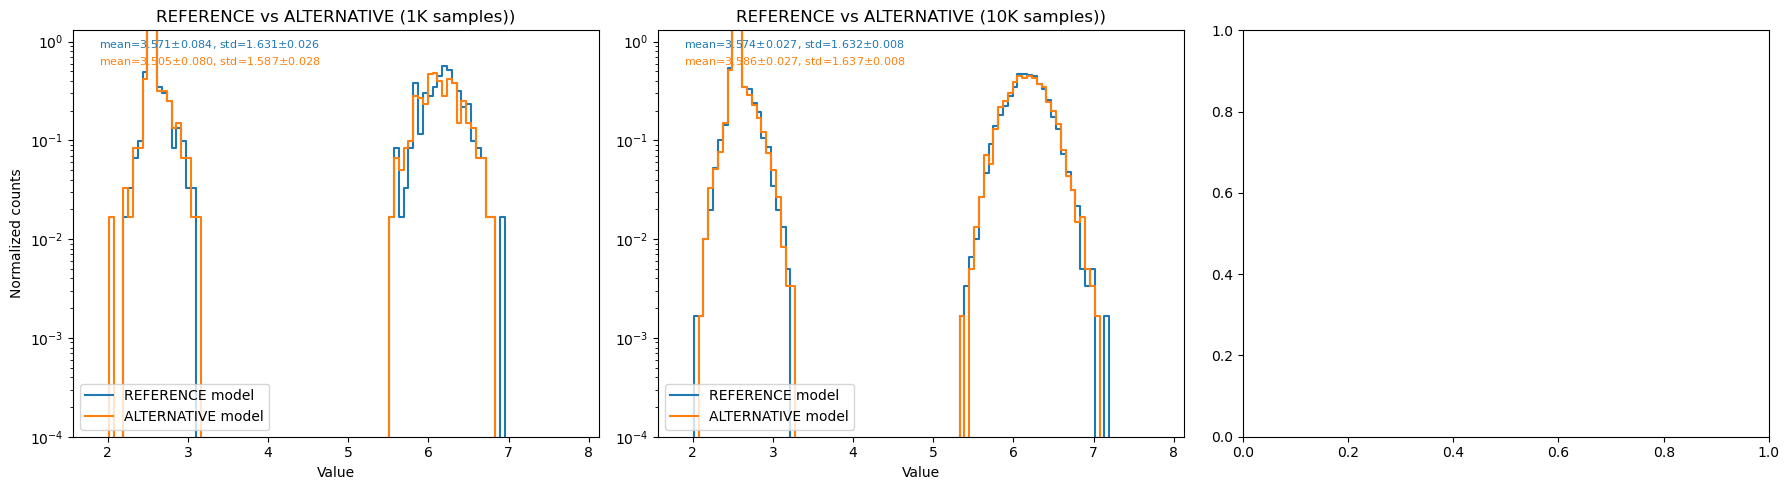

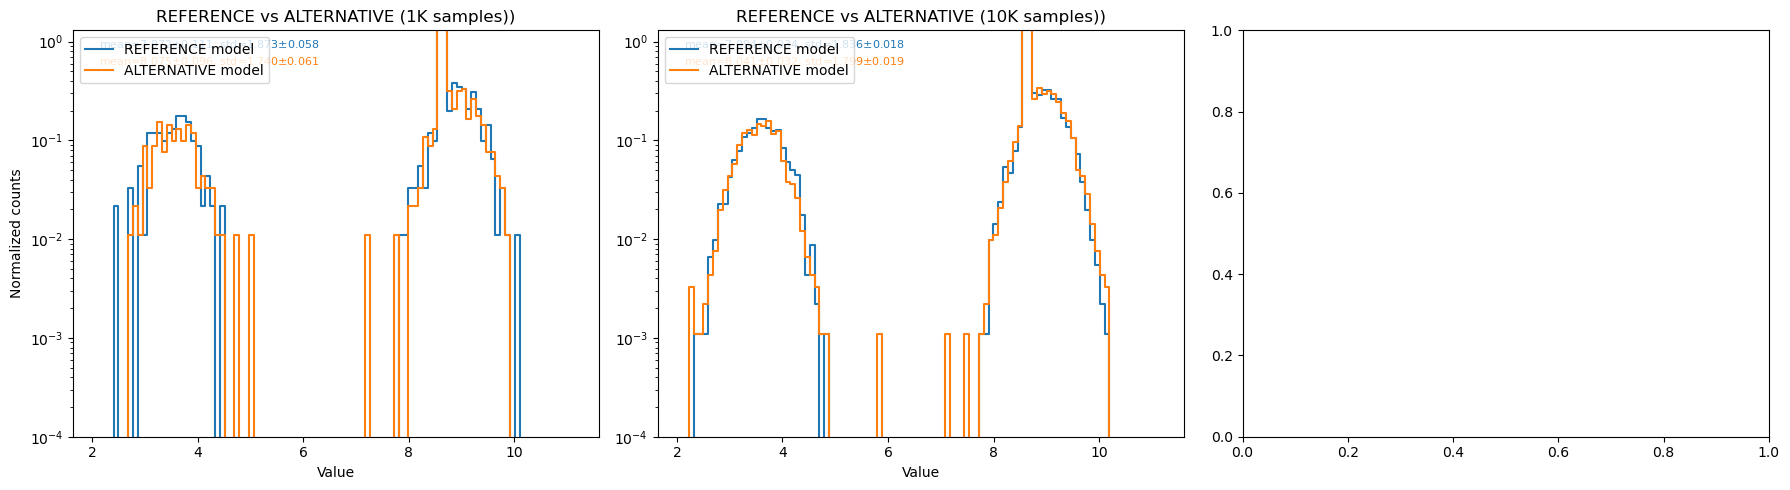

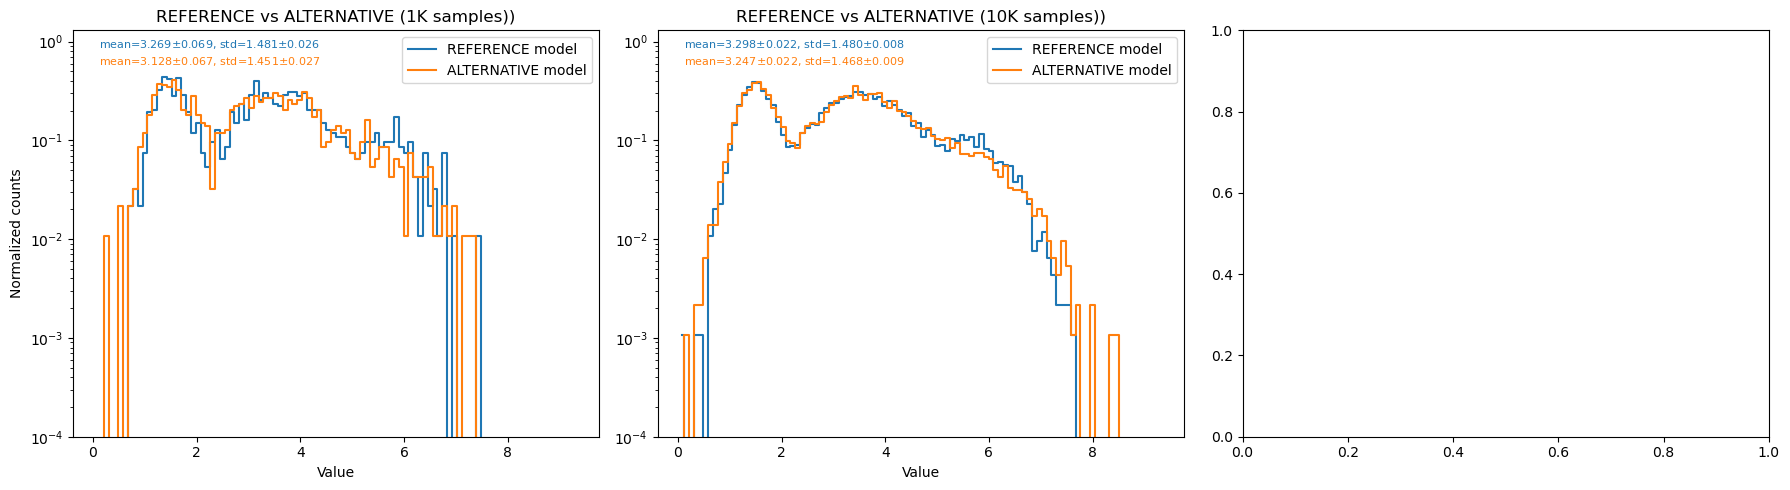

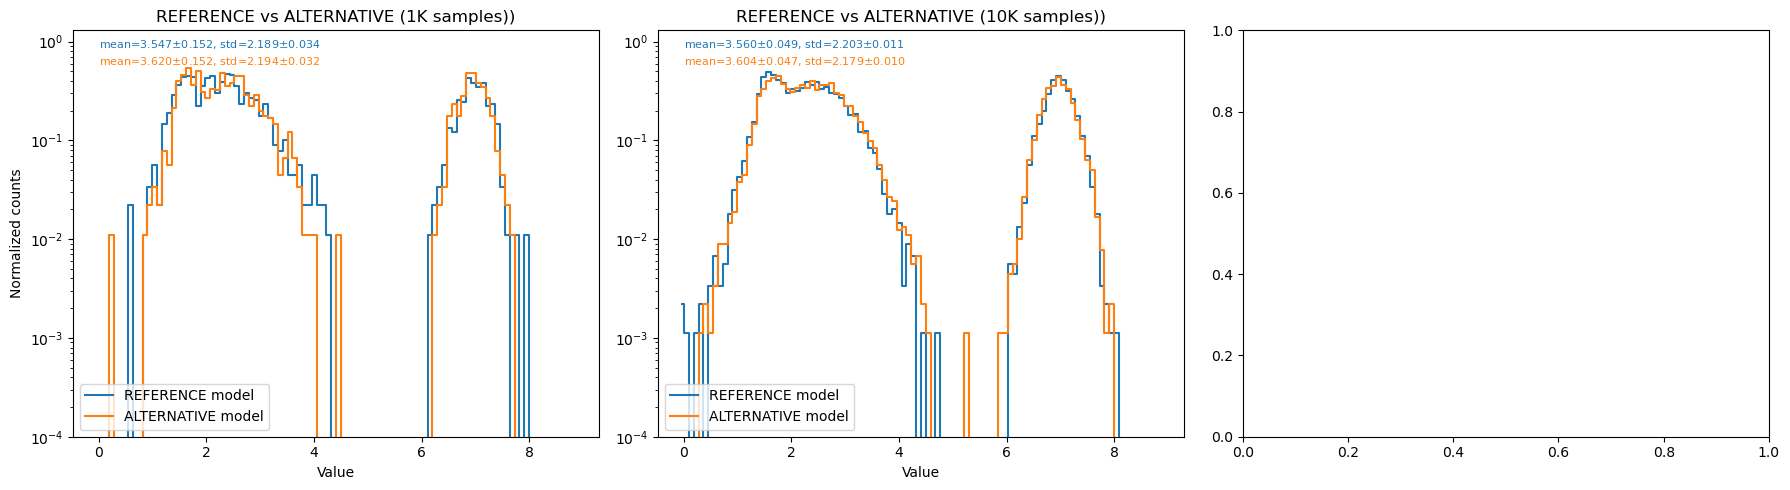

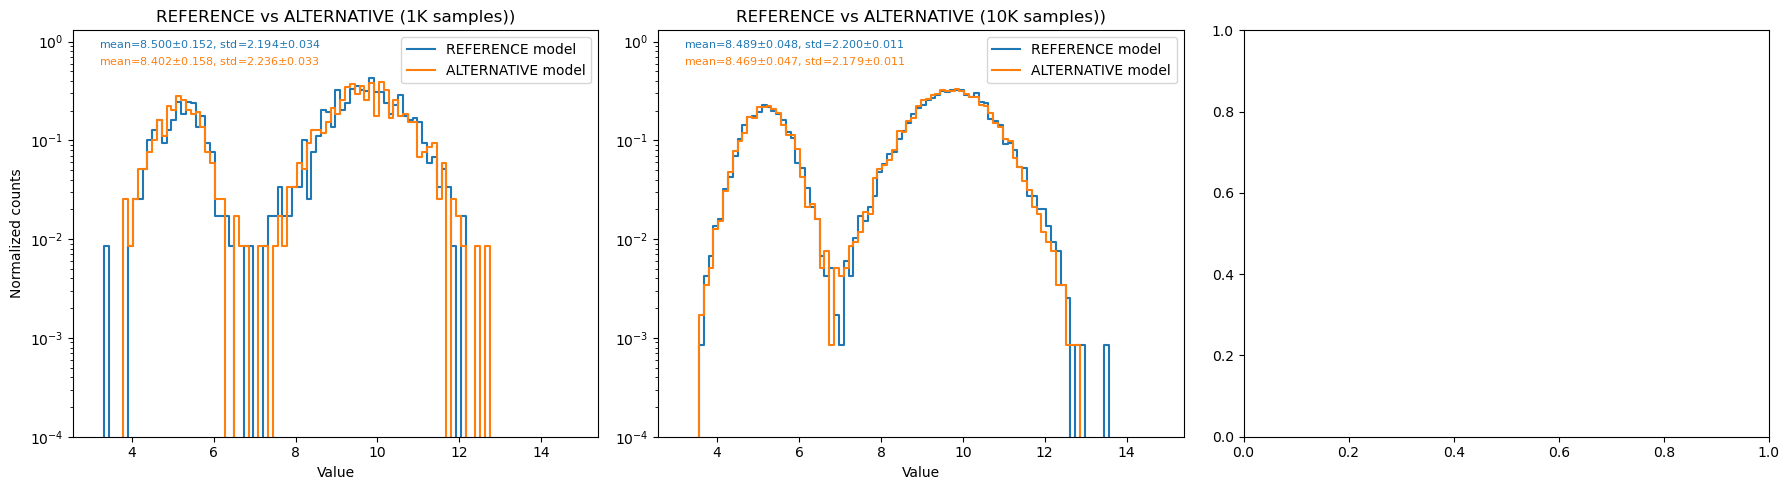

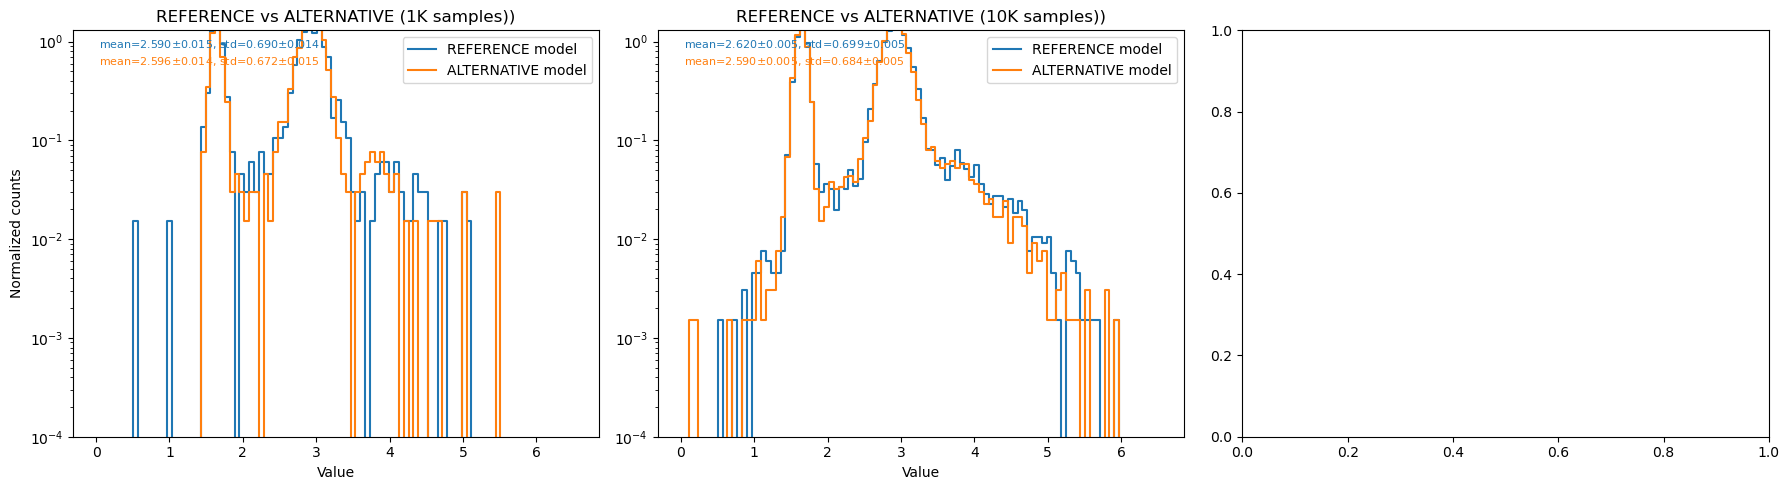

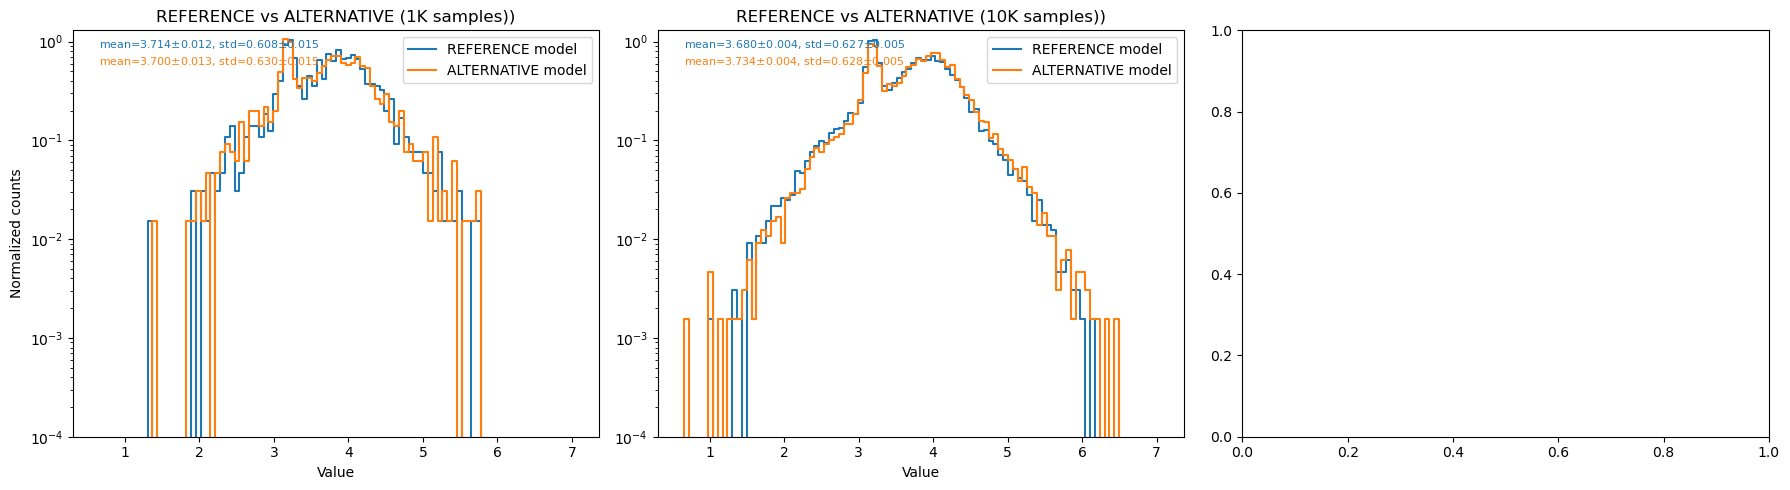

In [7]:
for dim in range(100)[::20]:
    scale = 'log'
    num_bins = 100  # number of bins
    nsamples1 = 1000
    nsamples2 = 10000

    # KS statistic for different values of the 'niter' parameter
    sample0 = dist0.sample(nsamples1).numpy()[:,dim]
    sample1 = dist1.sample(nsamples1).numpy()[:,dim]

    sample2 = dist0.sample(nsamples2).numpy()[:,dim]
    sample3 = dist1.sample(nsamples2).numpy()[:,dim]

    # Compute the mean and standard deviation of the sample and their standard errors
    mu0, deltamu0, sigma0, deltasigma0 = (np.mean(sample0), se_mean(sample0), np.std(sample0), se_std(sample0))
    mu1, deltamu1, sigma1, deltasigma1 = (np.mean(sample1), se_mean(sample1), np.std(sample1), se_std(sample1))
    mu2, deltamu2, sigma2, deltasigma2 = (np.mean(sample2), se_mean(sample2), np.std(sample2), se_std(sample2))
    mu3, deltamu3, sigma3, deltasigma3 = (np.mean(sample3), se_mean(sample3), np.std(sample3), se_std(sample3))

    # Minimum and maximum x values
    min_x = 0.9*min(np.concatenate((sample0,sample1,sample2,sample3),axis=0)) # lower limit of the binning
    max_x = 1.1*max(np.concatenate((sample0,sample1,sample2,sample3),axis=0)) # upper limit of the binning

    # Create an array of values
    x = np.linspace(min_x, max_x, num_bins + 1)

    # Create histogram for values and normalize counts to sum to 1
    counts0, bin_edges = np.histogram(sample0, bins=x, density=True)
    counts1, bin_edges = np.histogram(sample1, bins=x, density=True)
    counts2, bin_edges = np.histogram(sample2, bins=x, density=True)
    counts3, bin_edges = np.histogram(sample3, bins=x, density=True)

    # Get the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Set up the figure and the two subplots
    fig, ax = plt.subplots(1, 3, figsize=(12, 5))

    # Draw the first plot
    line1, = ax[0].plot(bin_centers, counts0, '-',label='REFERENCE model', drawstyle='steps-mid',)
    line2, = ax[0].plot(bin_centers, counts1, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
    ax[0].text(0.05, 0.98, f'mean={mu0:.3f}$\pm${deltamu0:.3f}, std={sigma0:.3f}$\pm${deltasigma0:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line1.get_color(), fontsize=8)
    ax[0].text(0.05, 0.94, f'mean={mu1:.3f}$\pm${deltamu1:.3f}, std={sigma1:.3f}$\pm${deltasigma1:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line2.get_color(), fontsize=8)
    # Draw the second plot
    ax[0].set_yscale(scale)
    ax[0].set_ylim(1e-4, 1.3)
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Normalized counts')
    ax[0].set_title('REFERENCE vs ALTERNATIVE (1K samples))')
    ax[0].legend()

    # Draw the second plot
    line3, = ax[1].plot(bin_centers, counts2, '-',label='REFERENCE model', drawstyle='steps-mid')
    line4, = ax[1].plot(bin_centers, counts3, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
    ax[1].text(0.05, 0.98, f'mean={mu2:.3f}$\pm${deltamu2:.3f}, std={sigma2:.3f}$\pm${deltasigma2:.3f}', transform=ax[1].transAxes, verticalalignment='top', color=line3.get_color(), fontsize=8)
    ax[1].text(0.05, 0.94, f'mean={mu3:.3f}$\pm${deltamu3:.3f}, std={sigma3:.3f}$\pm${deltasigma3:.3f}', transform=ax[1].transAxes, verticalalignment='top', color=line4.get_color(), fontsize=8)
    ax[1].set_yscale(scale)
    ax[1].set_ylim(1e-4, 1.3)
    ax[1].set_xlabel('Value')
    ax[1].set_title('REFERENCE vs ALTERNATIVE (10K samples))')
    ax[1].legend()

    # Adjust the width space
    plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

    # Display the figure with the two subplots
    plt.tight_layout()
    plt.show()
    plt.close()

In [12]:
# Create a dictionary with the data
data = {
    'Sample Size': [nsamples1, nsamples2,nsamples1, nsamples2],
    'Mean': [mu0, mu1, mu2, mu3],
    'Delta Mean': [deltamu0, deltamu1, deltamu2, deltamu3],
    'Std Dev': [sigma0, sigma1, sigma2  , sigma3],
    'Delta Std Dev': [deltasigma0, deltasigma1, deltasigma2 , deltasigma3]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
df

Sample Size      Mean  Delta Mean   Std Dev  Delta Std Dev
0         1000  3.714418    0.011673  0.607558       0.014695
1        10000  3.700429    0.012555  0.630106       0.015192
2         1000  3.680270    0.003930  0.626896       0.004844
3        10000  3.734362    0.003942  0.627869       0.005040

In [15]:
conditional_print = GMetrics.utils.conditional_print
print_sampling_time = False
print_log_prob_time = False
print_nsamples = False
print_niter = False

niter = 1000
nsamples_list = [100,200,500,1000,2000,5000,10000]
compute_alternative = True

start_all = timer()

ts_dist_null = {}
ts_dist_null_tmp = {}
if compute_alternative:
    ts_dist_alt = {}
    ts_dist_alt_tmp = {}

nsamples_max = np.max(nsamples_list)

for i in range(niter):
    conditional_print(print_niter,"\n============================================")
    conditional_print(print_niter,"Number of pseudo-experiment:", i)
    start_iter = timer()
    
    ts_dist_null_tmp[i] = {}
    if compute_alternative:
        ts_dist_alt_tmp[i] = {}

    # Sample from the REFERENCE and ALTERNATIVE distributions
    start = timer()
    sample_ref_1 = dist0.sample(3*nsamples_max)
    end = timer()
    conditional_print(print_sampling_time,"Time to sample",3*nsamples,"samples from the REFERENCE distribution:",end-start,"s.")
    if compute_alternative:
        start = timer()
        sample_alt_1 = dist1.sample(nsamples_max)
        end = timer()
        conditional_print(print_sampling_time,"Time to sample",nsamples,"samples from the ALTERNATIVE distribution:",end-start,"s.")
    
    # Compute the log-probability of the samples under the REFERENCE and ALTERNATIVE distributions
    start = timer()
    logprob_ref_ref = dist0.log_prob(sample_ref_1)
    end = timer()
    conditional_print(print_log_prob_time,"Time to compute log_prob of dist0 for",3*nsamples,"samples from dist0:",end-start,"s.")
    start = timer()
    logprob_alt_ref = dist1.log_prob(sample_ref_1)
    end = timer()
    conditional_print(print_log_prob_time,"Time to compute log_prob of dist1 for",3*nsamples,"samples from dist0:",end-start,"s.")
    if compute_alternative:
        start = timer()
        logprob_ref_alt = dist0.log_prob(sample_alt_1)
        end = timer()
        conditional_print(print_log_prob_time,"Time to compute log_prob of dist0 for",nsamples,"samples from dist1:",end-start,"s.")
        start = timer()
        logprob_alt_alt = dist1.log_prob(sample_alt_1)
        end = timer()
        conditional_print(print_log_prob_time,"Time to compute log_prob of dist1 for",nsamples,"samples from dist1:",end-start,"s.")

    tf_dist_null_list = []
    if compute_alternative:
        tf_dist_alt_list = []

    for nsamples in nsamples_list:
        conditional_print(print_nsamples,"\n--------------------------------------------")
        conditional_print(print_nsamples,"Number of samples:", nsamples)
        start_nsamples = timer()
        
        # Generate independent samples from the REFERENCE and ALTERNATIVE distributions
        logprob_ref_ref_reduced_1 = logprob_ref_ref[:nsamples]
        logprob_ref_ref_reduced_2 = logprob_alt_ref[nsamples:2*nsamples]
        logprob_ref_ref_reduced_3 = logprob_ref_alt[2*nsamples:3*nsamples]
        logprob_alt_ref_reduced = logprob_alt_alt[:nsamples]
        if compute_alternative:
            logprob_ref_alt_reduced = logprob_ref_alt[:nsamples]
            logprob_alt_alt_reduced = logprob_alt_alt[:nsamples]

        lik_ref_dist = tf.reduce_sum(logprob_ref_ref_reduced_1)+tf.reduce_sum(logprob_ref_ref_reduced_2)
        lik_alt_dist = tf.reduce_sum(logprob_ref_ref_reduced_1)+tf.reduce_sum(logprob_alt_ref_reduced)
        ts_dist_null_tmp[i][nsamples] = 2*(lik_alt_dist-lik_ref_dist).numpy()

        if compute_alternative:
            lik_ref_dist = tf.reduce_sum(logprob_ref_ref_reduced_3)+tf.reduce_sum(logprob_ref_alt_reduced)
            lik_alt_dist = tf.reduce_sum(logprob_ref_ref_reduced_3)+tf.reduce_sum(logprob_alt_alt_reduced)
            ts_dist_alt_tmp[i][nsamples] = 2*(lik_alt_dist-lik_ref_dist).numpy()
        end_nsamples = timer()
        conditional_print(print_nsamples,"Time elapsed for",nsamples,"samples:",end_nsamples-start_nsamples,"s.")
    end_iter = timer()
    conditional_print(print_niter,"Time elapsed for pseudo-experiment",i,":",end_iter-start_iter,"s.")
end_all = timer()
print("Total time elapsed:",end_all-start_all,"s.")

Total time elapsed: 1961.0315269939601 s.


In [17]:
compute_alternative = True

In [18]:
for nsamples in nsamples_list:
    
    arr = np.array([ts_dist_null_tmp[i][nsamples] for i in range(niter)])
    mask = ~np.isfinite(arr)
    non_finite_fraction = np.sum(mask) / len(arr)
    if non_finite_fraction > 0:
        print(f"Warning: Removed {non_finite_fraction*100:.2f}% of the null distribution samples due to non-finite values for nsamples={nsamples}")
    arr_no_nan_inf = arr[~mask]
    Q1 = np.percentile(arr_no_nan_inf, 25)
    Q3 = np.percentile(arr_no_nan_inf, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (arr_no_nan_inf < lower_bound) | (arr_no_nan_inf > upper_bound)
    print(f"Warning: Removed {np.sum(outliers)} outliers ({np.sum(outliers)/len(arr_no_nan_inf)*100:.2f}%) from the null distribution samples for nsamples={nsamples}")
    data_clean = arr_no_nan_inf[~outliers]
    ts_dist_null[nsamples] = data_clean
    
    if compute_alternative:
        
        arr = np.array([ts_dist_alt_tmp[i][nsamples] for i in range(niter)])
        mask = ~np.isfinite(arr)
        non_finite_fraction = np.sum(mask) / len(arr)
        if non_finite_fraction > 0:
            print(f"Warning: Removed {non_finite_fraction*100:.2f}% of the alternative distribution samples due to non-finite values for nsamples={nsamples}")
        arr_no_nan_inf = arr[~mask]
        Q1 = np.percentile(arr_no_nan_inf, 25)
        Q3 = np.percentile(arr_no_nan_inf, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (arr_no_nan_inf < lower_bound) | (arr_no_nan_inf > upper_bound)
        print(f"Warning: Removed {np.sum(outliers)} outliers ({np.sum(outliers)/len(arr_no_nan_inf)*100:.2f}%) from the alternative distribution samples for nsamples={nsamples}")
        data_clean = arr_no_nan_inf[~outliers]
        ts_dist_alt[nsamples] = data_clean


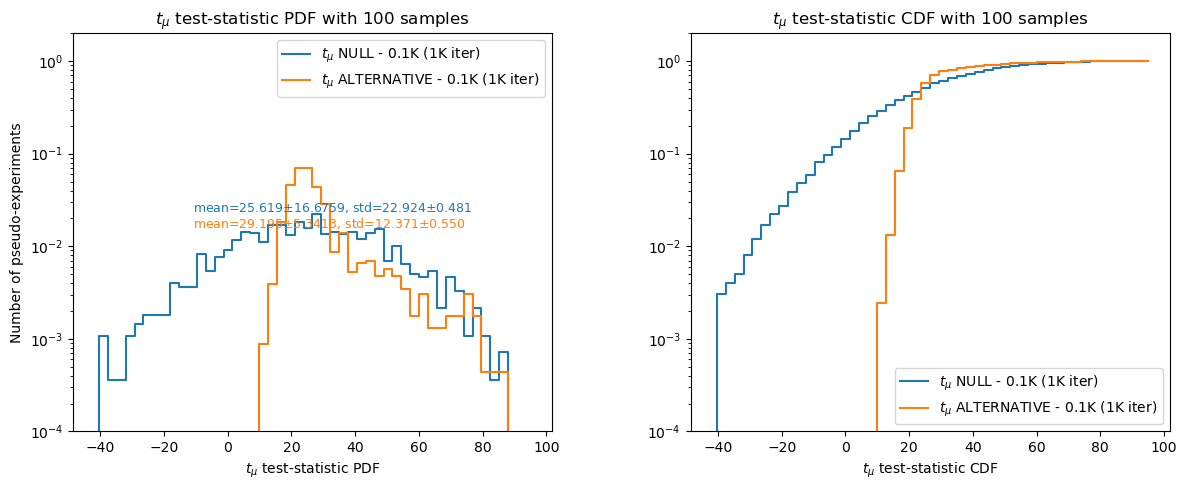

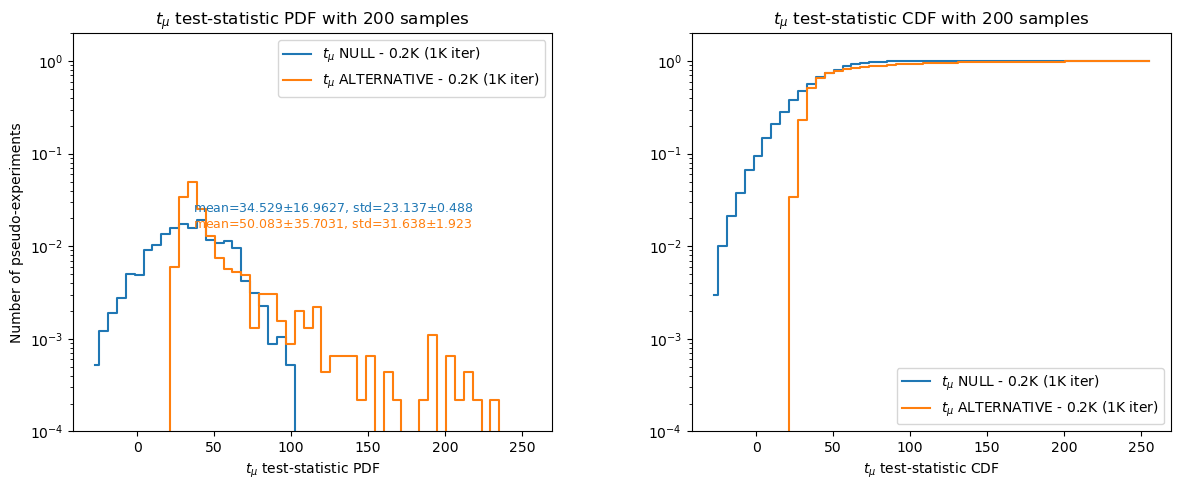

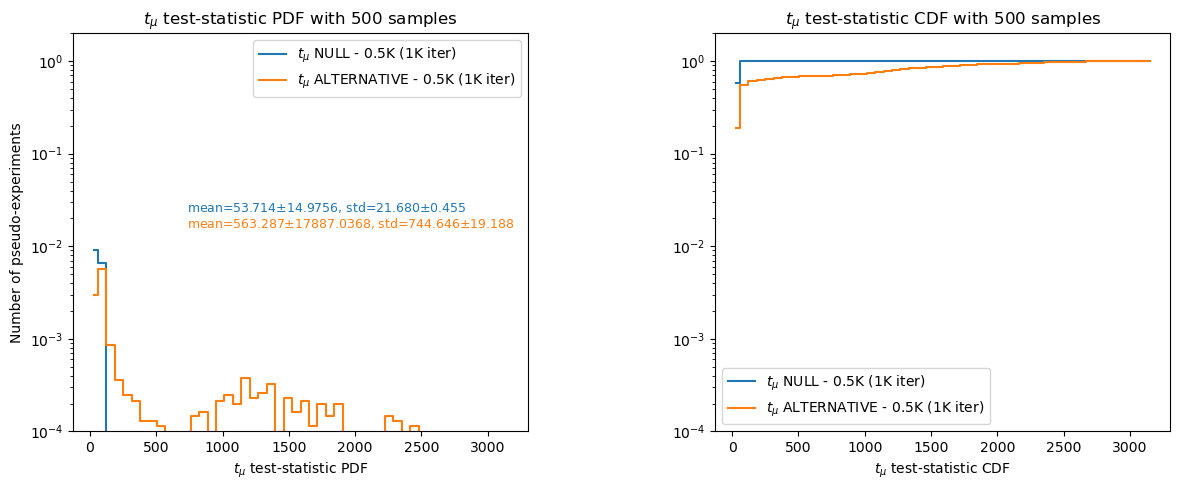

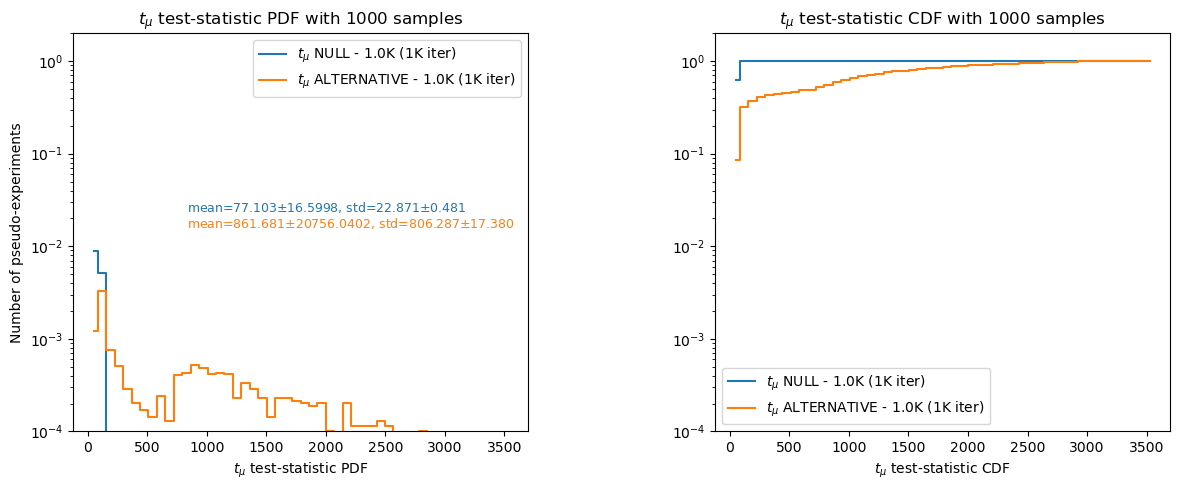

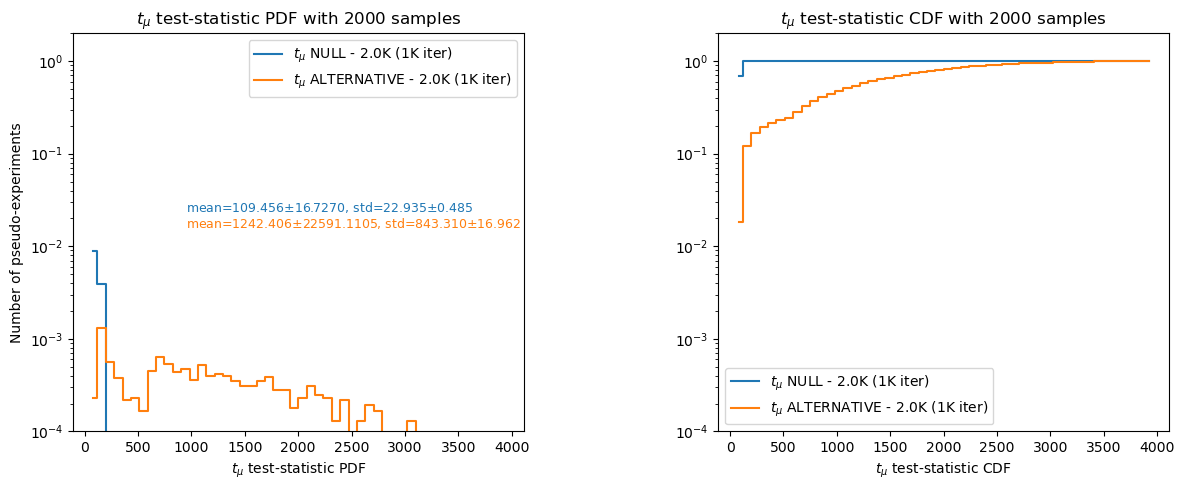

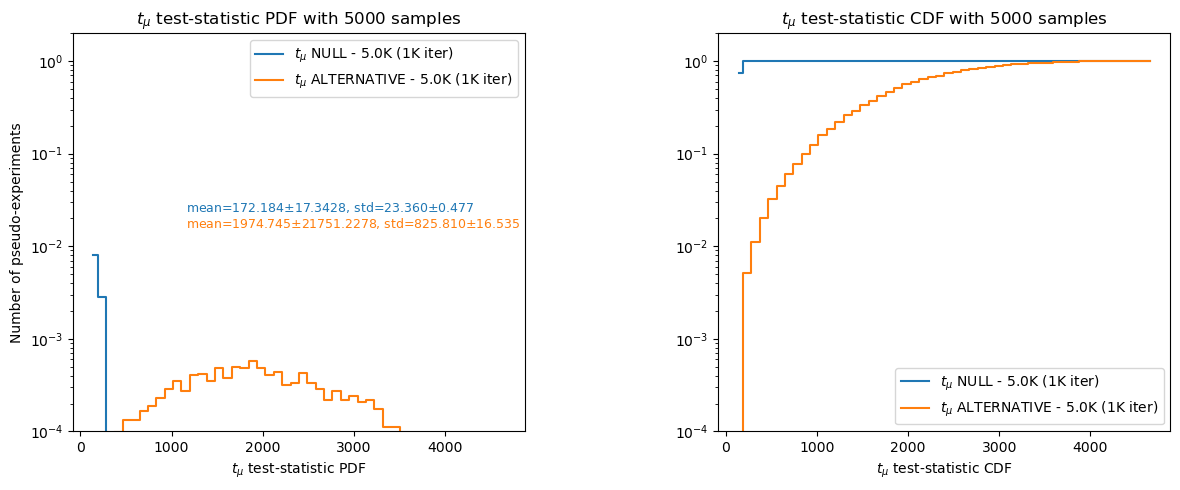

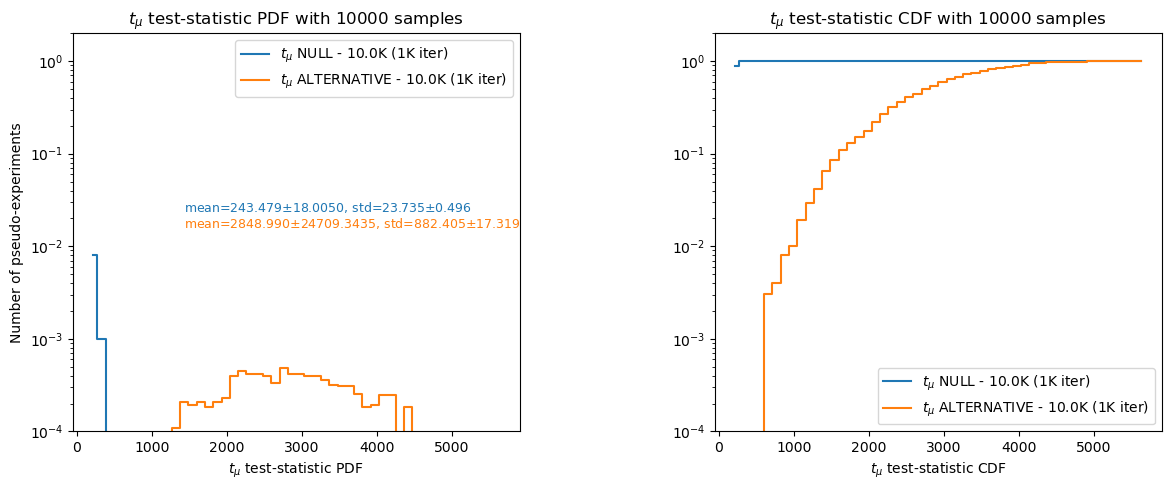

In [19]:
scale = 'log'
num_bins = 50  # number of bins

for nsamples in list(ts_dist_null.keys()):
    # t_mu test-statistic for different values of nsamples
    dist_1 = ts_dist_null[nsamples]/np.sqrt(nsamples)
    dist_2 = ts_dist_alt[nsamples]/np.sqrt(nsamples)
    
    # Compute the mean and standard deviation of the sample and their standard errors
    mu1, deltamu1, sigma1, deltasigma1 = (np.mean(dist_1), se_mean(dist_1), np.std(dist_1), se_std(dist_1))
    mu2, deltamu2, sigma2, deltasigma2 = (np.mean(dist_2), se_mean(dist_2), np.std(dist_2), se_std(dist_2))
    
    # Minimum and maximum x values
    min_tmp = min(np.concatenate((dist_1,dist_2),axis=0))
    if min_tmp < 0:
        min_x = 1.1*min_tmp
    else:
        min_x = 0.9*min_tmp
    max_x = 1.1*max(np.concatenate((dist_1,dist_2),axis=0)) # upper limit of the binning
    
    # Create an array of values
    x = np.linspace(min_x, max_x, num_bins + 1)
    
    # Create histogram for values and normalize counts to sum to 1
    counts1, bin_edges1 = np.histogram(dist_1, bins=x, density=True)
    cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
    counts2, bin_edges2 = np.histogram(dist_2, bins=x, density=True)
    cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
    
    # Get the bin centers
    bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
    bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
    
    # Set up the figure and the two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Draw the first plot
    line1, = ax[0].plot(bin_centers1, counts1, linestyle = '-', label='$t_{\mu}$ NULL - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    line2, = ax[0].plot(bin_centers2, counts2, linestyle = '-', label='$t_{\mu}$ ALTERNATIVE - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    ax[0].text(0.25, 0.58, f'mean={mu1:.3f}$\pm${deltamu1:.4f}, std={sigma1:.3f}$\pm${deltasigma1:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line1.get_color(), fontsize=9)
    ax[0].text(0.25, 0.54, f'mean={mu2:.3f}$\pm${deltamu2:.4f}, std={sigma2:.3f}$\pm${deltasigma2:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line4.get_color(), fontsize=9)
    ax[0].set_yscale(scale)
    ax[0].set_ylim(1e-4, 2)
    ax[0].set_xlabel('$t_{\mu}$ test-statistic PDF')
    ax[0].set_ylabel('Number of pseudo-experiments')
    ax[0].set_title('$t_{\mu}$ test-statistic PDF with '+str(nsamples)+' samples')
    ax[0].legend()
    
    # Draw the second plot
    ax[1].plot(bin_centers1, cum_counts1, linestyle = '-', label='$t_{\mu}$ NULL - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    ax[1].plot(bin_centers2, cum_counts2, linestyle = '-', label='$t_{\mu}$ ALTERNATIVE - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    ax[1].set_yscale(scale)
    ax[1].set_ylim(1e-4, 2)
    ax[1].set_xlabel('$t_{\mu}$ test-statistic CDF')
    ax[1].set_title('$t_{\mu}$ test-statistic CDF with '+str(nsamples)+' samples')
    ax[1].legend()
    
    # Adjust the width space
    plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking
    
    # Display the figure with the two subplots
    plt.tight_layout()
    plt.show()
    plt.close()

In [20]:
from scipy.special import erfinv

# Convert p-value to gaussian sigma (one-sided)
def p_to_sigma_one_sided(p):
    return np.sqrt(2)*erfinv(1-2*p)

# Convert p-value to gaussian sigma (two-sided)
def p_to_sigma_two_sided(p):
    
    return np.sqrt(2)*erfinv(1-p)

def highlight_significance(row, significance_value):
    color = 'background-color: green' if row['sigma_one_sided'] >= significance_value else ''
    return [color]*len(row)

# Initialize an empty list to store the results
results = []

for nsamples in list(ts_dist_null.keys()):
    null_dist = np.array(ts_dist_null[nsamples]/np.sqrt(nsamples))
    observed_stat_list = []
    p_value_one_sided_list = []
    
    for i in range(len(ts_dist_alt[nsamples])):
        observed_i = ts_dist_alt[nsamples]/np.sqrt(nsamples)
        observed_stat_list.append(observed_i[i])
        p_value_one_sided_list.append(np.sum(null_dist >= observed_stat_list[i]) / len(null_dist))
        #p_value_two_sided.append(np.sum(np.abs(null_dist) >= np.abs(observed_stat)) / len(null_dist))
        # Append the results to the list as a dictionary
    
    results.append({
        'niter': len(null_dist),
        'nobserved': nsamples,
        'n_samples_toys': nsamples,
        'observed_stat_list': observed_stat_list,
        'observed_stat_mean': np.mean(observed_stat_list),
        'mean_alt_dist': np.mean(ts_dist_alt[nsamples]/np.sqrt(nsamples)),
        'std_alt_dist': np.std(ts_dist_alt[nsamples]/np.sqrt(nsamples)),
        'mean_null_dist': np.mean(null_dist),
        'std_null_dist': np.std(null_dist),
        'p_value_one_sided_mean': np.mean(p_value_one_sided_list),
        'sigma_one_sided_mean': p_to_sigma_one_sided(np.mean(p_value_one_sided_list)),
        'p_value_one_sided_list': p_value_one_sided_list,
        'sigma_one_sided_list': np.array([p_to_sigma_one_sided(i) for i in p_value_one_sided_list]),
    })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(results).sort_values(by=['nobserved'])
df

niter  nobserved  n_samples_toys  \
0    993        100             100   
1    996        200             200   
2    985        500             500   
3    993       1000            1000   
4    989       2000            2000   
5    990       5000            5000   
6    979      10000           10000   

                                  observed_stat_list  observed_stat_mean  \
0  [46.537109375, 29.08359375, 21.284375, 50.9267...           29.194596   
1  [53.93456973500391, 152.10060212833116, 29.967...           50.083037   
2  [68.82966620365836, 136.47701146421372, 797.48...          563.287297   
3  [83.54045829926696, 165.42269725048314, 1777.8...          861.680717   
4  [141.09029921029298, 672.8663954493492, 1558.2...         1242.405855   
5  [234.98439969869875, 2048.3725563620087, 2696....         1974.745463   
6  [609.46875, 2857.800625, 4214.9, 4156.931875, ...         2848.989624   

   mean_alt_dist  std_alt_dist  mean_null_dist  std_null_dist  \
0      29.194596     12.371133       25.619128      22.923524   
1      50.083037     31.637950       34.529139      23.137282   
2     563.287297    744.646320       53.713917      21.679622   
3     861.680717    806.286713       77.102791      22.871195   
4    1242.405855    843.309909      109.456207      22.935499   
5    1974.745463    825.810247      172.183767      23.359775   
6    2848.989624    882.404909      243.478529      23.735140   

   p_value_one_sided_mean  sigma_one_sided_mean  \
0                0.455827              0.110954   
1                0.367563              0.338314   
2                0.166464              0.968234   
3                0.070814              1.469757   
4                0.014156              2.192944   
5                0.000042              3.931947   
6                0.000000                   inf   

                              p_value_one_sided_list  \
0  [0.18328298086606243, 0.42799597180261834, 0.5...   
1  [0.21887550200803213, 0.0, 0.5662650602409639,...   
2  [0.2436548223350254, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.39375629405840884, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4  [0.0910010111223458, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
6  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                sigma_one_sided_list  
0  [0.9029245092802938, 0.1814785813618273, -0.19...  
1  [0.7759965819875558, inf, -0.16687312530526643...  
2  [0.694594205429784, inf, inf, inf, inf, inf, i...  
3  [0.269542049724825, inf, inf, inf, inf, inf, i...  
4  [1.3346161111147685, inf, inf, inf, inf, inf, ...  
5  [inf, inf, inf, inf, inf, inf, inf, inf, inf, ...  
6  [inf, inf, inf, inf, inf, inf, inf, inf, inf, ...

## Correlation of metrics

/tmp/ipykernel_6400/3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


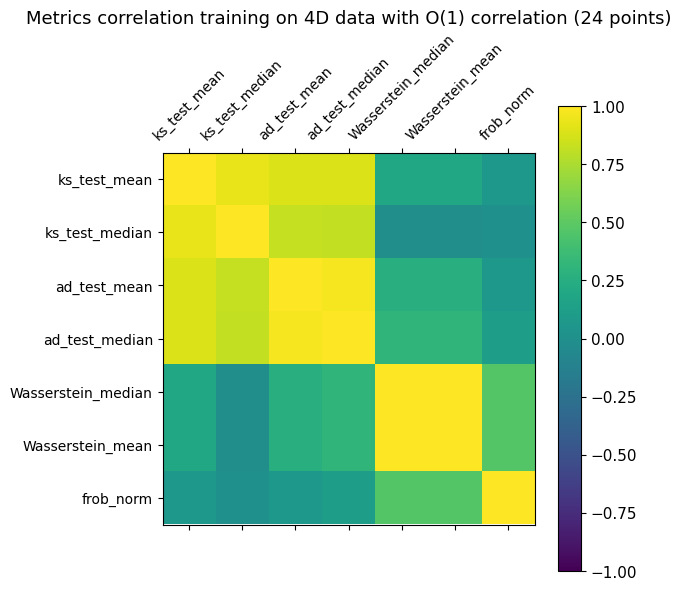

/tmp/ipykernel_6400/3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


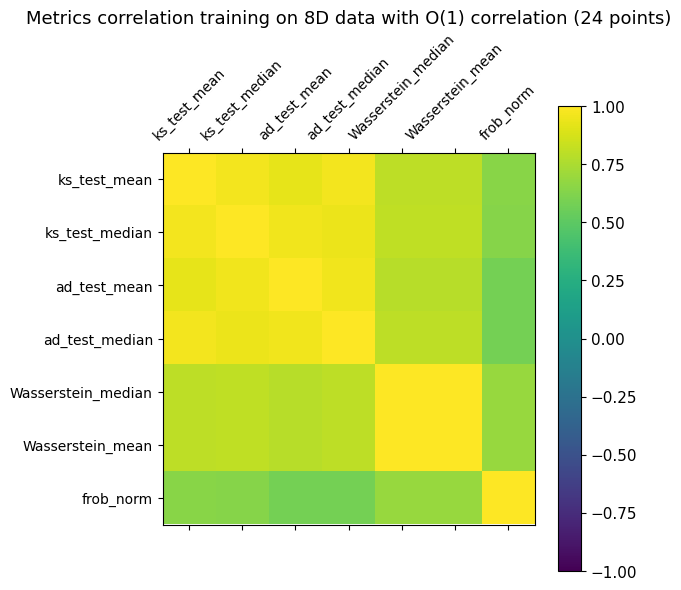

/tmp/ipykernel_6400/3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


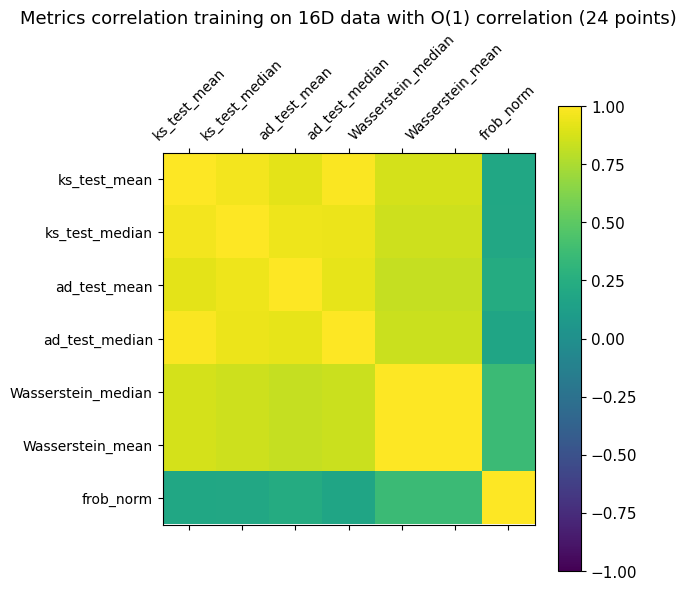

/tmp/ipykernel_6400/3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


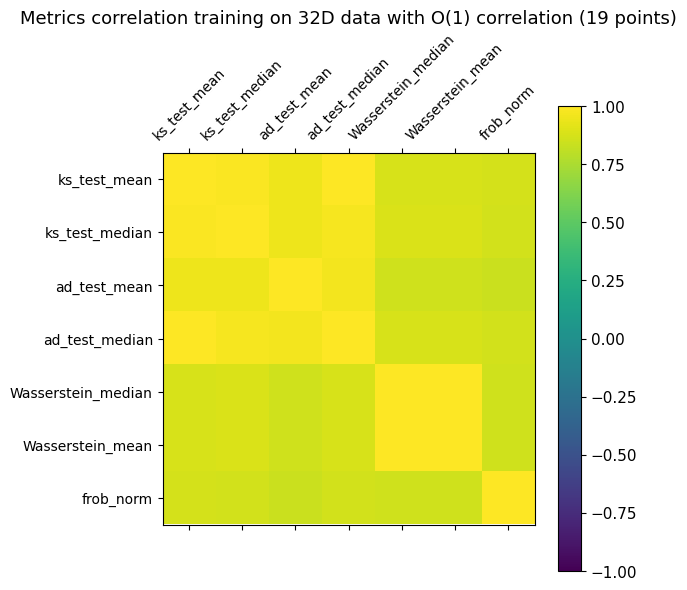

/tmp/ipykernel_6400/3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


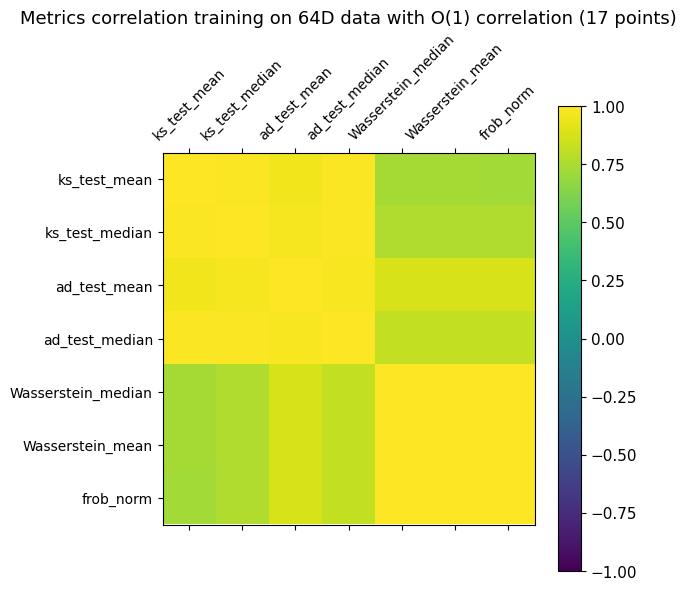

/tmp/ipykernel_6400/3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


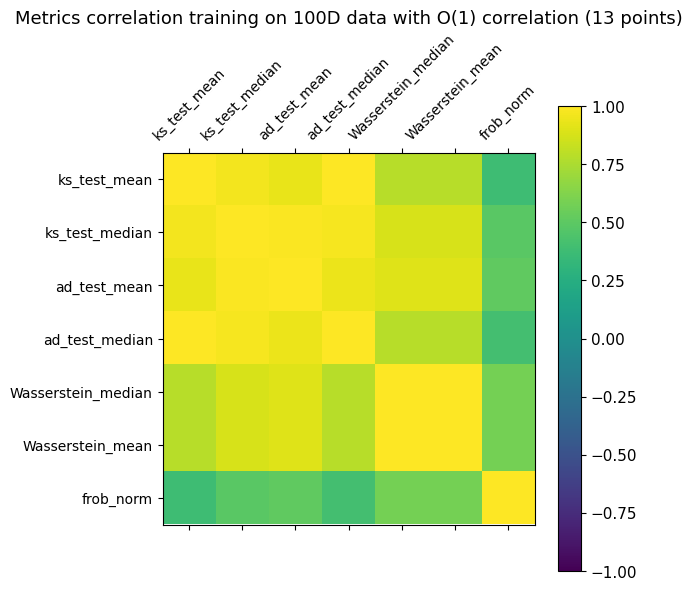

/tmp/ipykernel_6400/3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


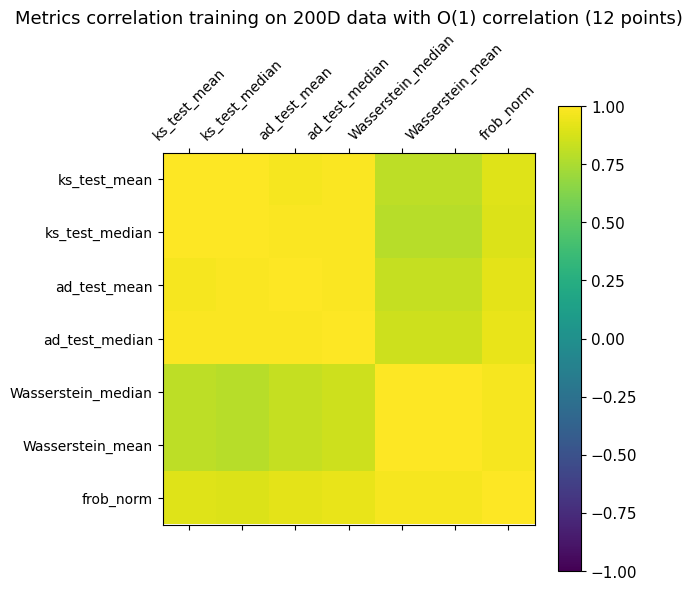

/tmp/ipykernel_6400/3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


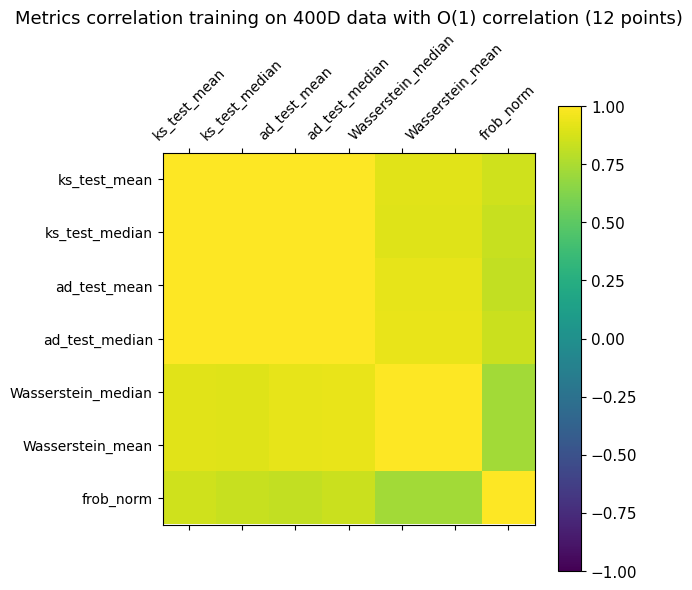

/tmp/ipykernel_6400/3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


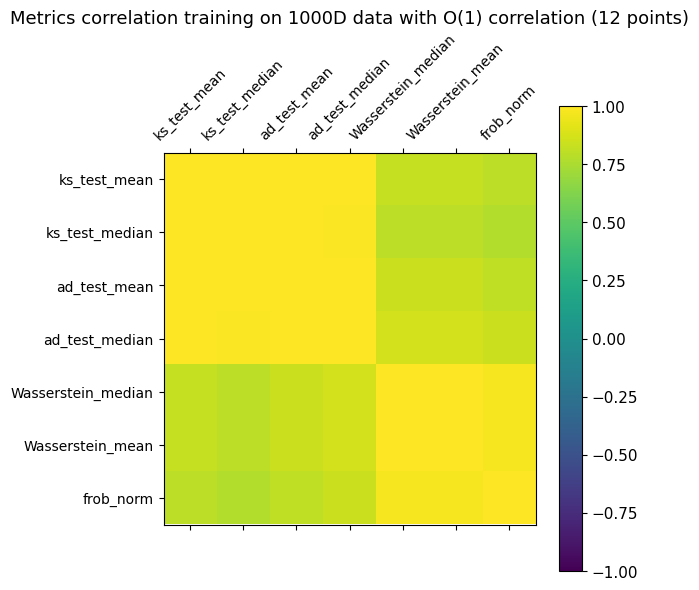

In [19]:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'lime')])]
metrics = ["ks_test_mean", "ks_test_median","ad_test_mean", "ad_test_median","Wasserstein_median", "Wasserstein_mean","frob_norm"]
for d in [4,8,16,32,64,100,200,400,1000]:
    df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]
    df=df.astype(float)
    n_points=len(df)
    df['Wasserstein_median'] = df['Wasserstein_median'].apply(lambda x: -x)
    df['Wasserstein_mean'] = df['Wasserstein_mean'].apply(lambda x: -x)
    df['frob_norm'] = df['frob_norm'].apply(lambda x: -x)
    #display(df)
    title = "Metrics correlation training on "+str(d)+"D data with O(1) correlation ("+str(n_points)+" points)"
    corr=df.corr()
    display(corr.style.set_caption(title).set_table_styles(styles))
    jtplot.reset()
    f = plt.figure(figsize=(6, 6))
    plt.matshow(corr, fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=11)
    plt.clim(-1, 1) 
    plt.title(title, fontsize=13)
    plt.show()
    plt.close()
    del(df)

/tmp/ipykernel_6400/886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


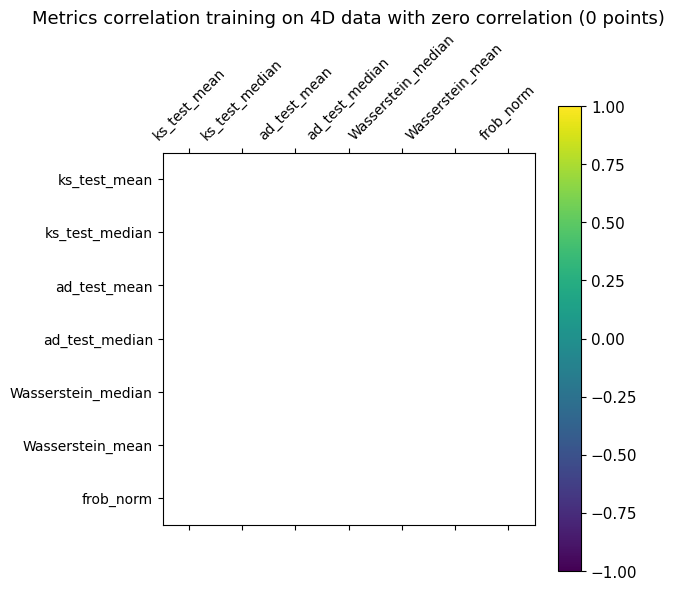

/tmp/ipykernel_6400/886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


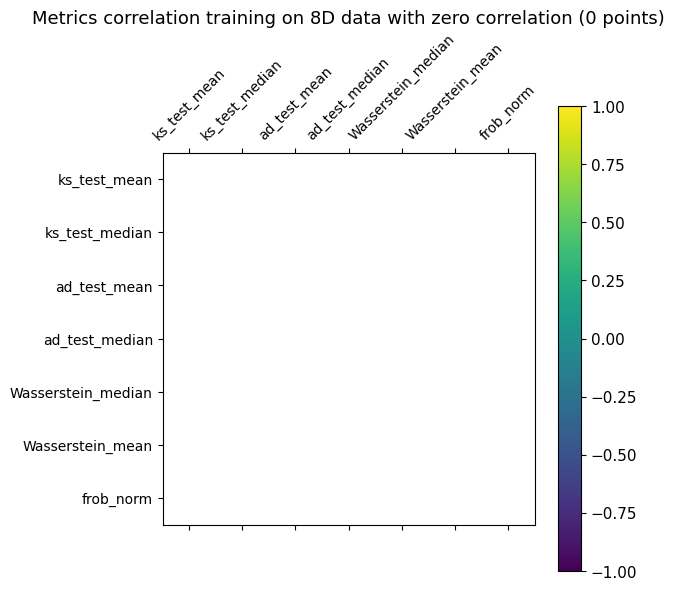

/tmp/ipykernel_6400/886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


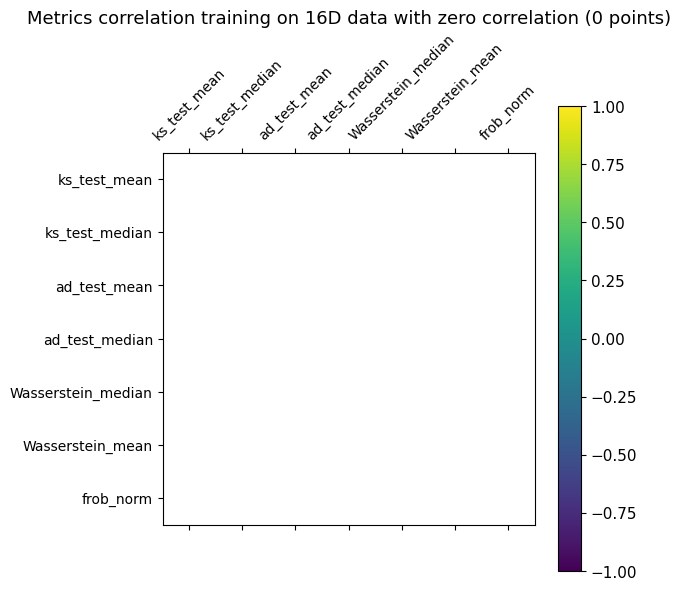

/tmp/ipykernel_6400/886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


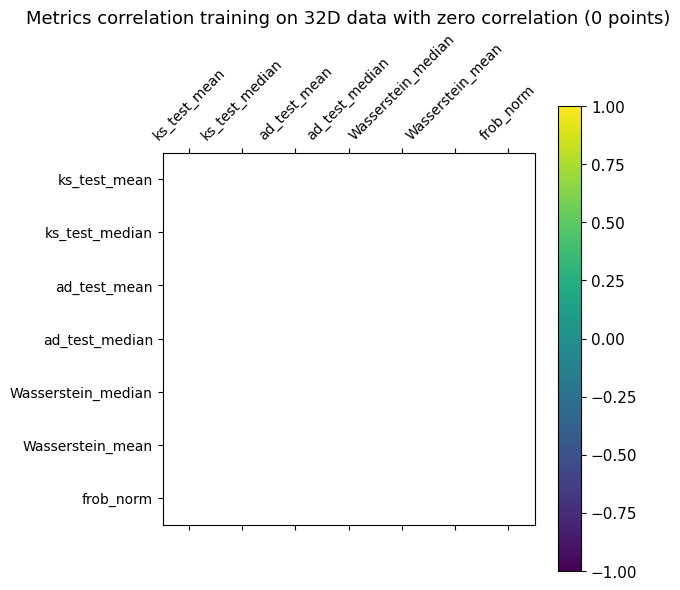

/tmp/ipykernel_6400/886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


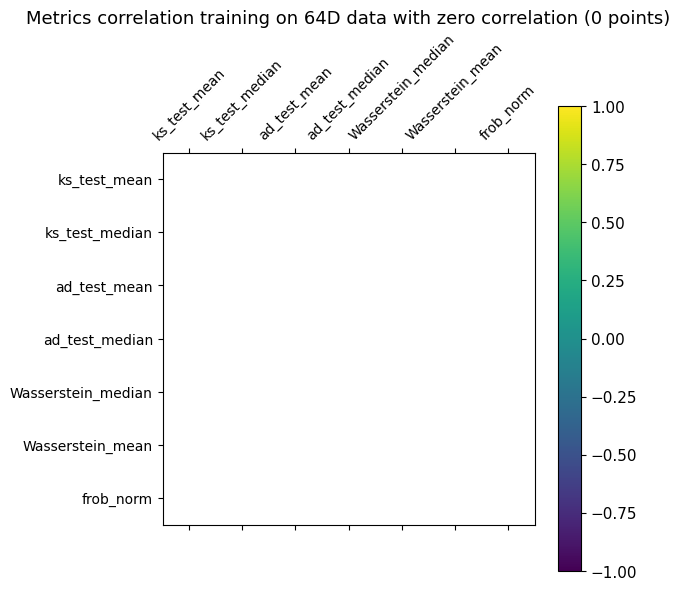

/tmp/ipykernel_6400/886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


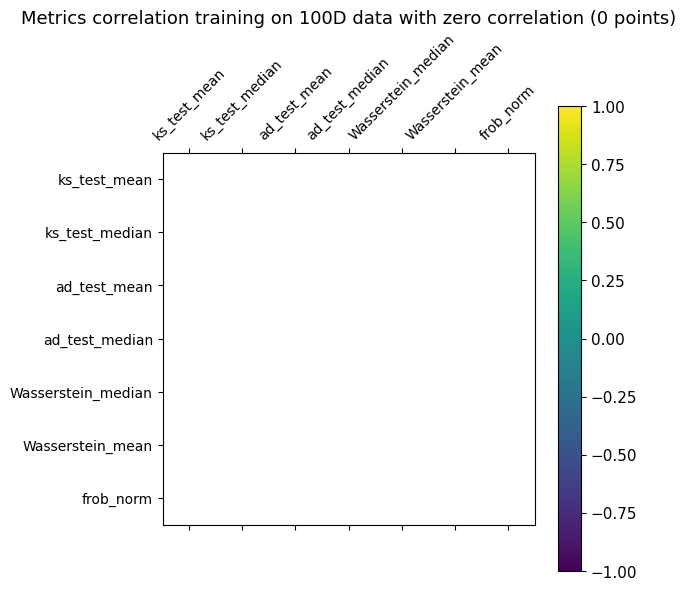

/tmp/ipykernel_6400/886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


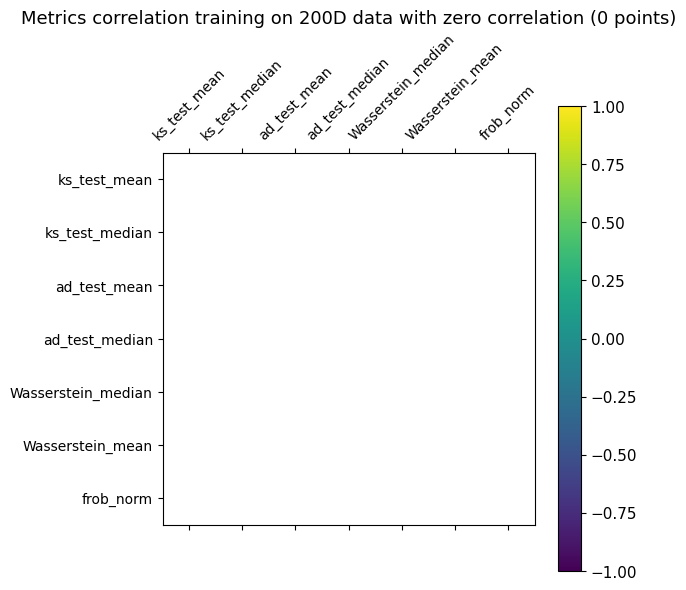

/tmp/ipykernel_6400/886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


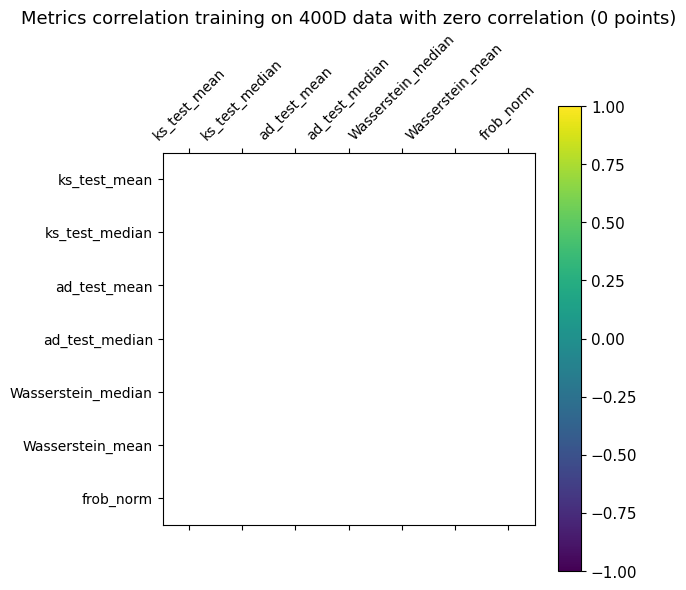

/tmp/ipykernel_6400/886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


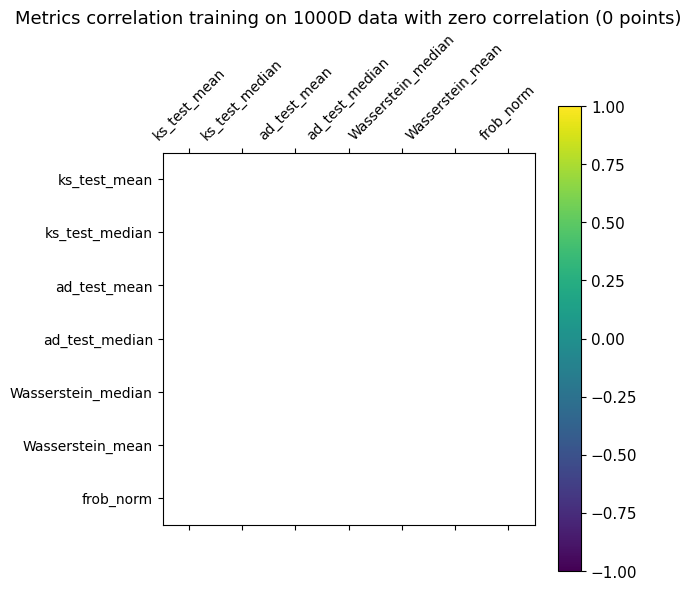

In [20]:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'lime')])]
metrics = ["ks_test_mean", "ks_test_median","ad_test_mean", "ad_test_median","Wasserstein_median", "Wasserstein_mean","frob_norm"]
for d in [4,8,16,32,64,100,200,400,1000]:
    df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]
    df=df.astype(float)
    n_points=len(df)
    df['Wasserstein_median'] = df['Wasserstein_median'].apply(lambda x: -x)
    df['Wasserstein_mean'] = df['Wasserstein_mean'].apply(lambda x: -x)
    df['frob_norm'] = df['frob_norm'].apply(lambda x: -x)
    #display(df)
    title = "Metrics correlation training on "+str(d)+"D data with zero correlation ("+str(n_points)+" points)"
    corr=df.corr()
    display(corr.style.set_caption(title).set_table_styles(styles))
    jtplot.reset()
    f = plt.figure(figsize=(6, 6))
    plt.matshow(corr, fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=11)
    plt.clim(-1, 1) 
    plt.title(title, fontsize=13)
    plt.show()
    plt.close()
    del(df)

## Results for different dimensions and metrics

In [250]:
def define_mean_models(df_all,ndims,verbose=1):
    ascending=True
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_rows', None)
    df_mean = pd.DataFrame()
    df = df_all[df_all["ndims"]==ndims].copy()
    #df.pop("seed_train")
    #df.pop("seed_test")
    df.pop("correlation")
    df.pop("nsamples")
    df.pop("range_min")
    df.pop("eps_regulariser")
    df.pop("activation")
    df.pop("regulariser")
    df.pop("epochs_input")
    df.pop("ks_mean")
    df.pop("ks_std")
    df.pop("ad_mean")
    df.pop("ad_std")
    df.pop("wd_mean")
    df.pop("wd_std")
    df.pop("wd_list")
    df.pop("swd_mean")
    df.pop("swd_std")
    df.pop("fn_mean")
    df.pop("fn_std")
    df = df.rename(columns={'spline_knots': 'knots'})
    bijectors_list = np.unique(df['bijector'])
    nbijectors_list = np.unique(df['nbijectors'])
    hidden_layers_list = np.unique(df['hidden_layers'])
    spline_knots_list = np.unique(df['knots'])
    for bijector in bijectors_list:
        for nbijectors in nbijectors_list:
            for hidden_layers in hidden_layers_list:
                for spline_knots in spline_knots_list:
                    df_tmp = df.loc[(df['bijector'] == bijector) & (df['nbijectors'] == nbijectors) & (df['hidden_layers'] == hidden_layers) & (df['knots'] == spline_knots)].copy()#df[df['nbijectors']==nbijectors][df['hidden_layers']==hidden_layers][df['knots']==spline_knots]
                    # Create the columns with default values
                    df_tmp['ks_all_mean'] = np.nan
                    df_tmp['ks_all_std'] = np.nan
                    df_tmp['ad_all_mean'] = np.nan
                    df_tmp['ad_all_std'] = np.nan
                    tmp = np.array(list(df_tmp.pop("ks_list")))
                    if tmp.size > 0:
                        df_tmp.loc[:, 'ks_all_mean'] = np.mean(tmp.flatten())
                        df_tmp.loc[:, 'ks_all_std'] = np.std(tmp.flatten())
                    tmp = np.array(list(df_tmp.pop("ad_list")))
                    if tmp.size > 0:
                        df_tmp.loc[:, 'ad_all_mean'] = np.mean(tmp.flatten())
                        df_tmp.loc[:, 'ad_all_std'] = np.std(tmp.flatten())
                    tmp = np.array(list(df_tmp.pop("swd_list")))
                    if tmp.size > 0:
                        df_tmp.loc[:, 'swd_all_mean'] = np.mean(tmp.flatten())
                        df_tmp.loc[:, 'swd_all_std'] = np.std(tmp.flatten())
                    tmp = np.array(list(df_tmp.pop("fn_list")))
                    if tmp.size > 0:
                        df_tmp.loc[:, 'fn_all_mean'] = np.mean(tmp.flatten())
                        df_tmp.loc[:, 'fn_all_std'] = np.std(tmp.flatten())
                    tmp = np.array(list(df_tmp.pop("training_time")))
                    if tmp.size > 0:
                        df_tmp.loc[:, 'tt_all_mean'] = np.mean(tmp.flatten())
                        df_tmp.loc[:, 'tt_all_std'] = np.std(tmp.flatten())
                    tmp = np.array(list(df_tmp.pop("prediction_time")))
                    if tmp.size > 0:
                        df_tmp.loc[:, 'pt_all_mean'] = np.mean(tmp.flatten())
                        df_tmp.loc[:, 'pt_all_std'] = np.std(tmp.flatten())
                    nseeds_train = np.unique(list(df["seed_train"]))
                    l=0
                    i=0
                    while l<4:
                        l = len(df[df['seed_train'] == nseeds_train[i]])
                        chosen_seed = nseeds_train[i]
                        i = i+1
                    df_tmp = df_tmp[df_tmp['seed_train'] == chosen_seed]
                    df_mean =  pd.concat([df_mean, df_tmp])
    df_mean['ad_score'] = np.abs(df_mean['ad_all_mean'] - 0.5)
    df_mean['ad_score'] = (df_mean['ad_score'] - df_mean['ad_score'].mean()) / df_mean['ad_score'].std()
    df_mean['ks_score'] = np.abs(df_mean['ks_all_mean'] - 0.5)
    df_mean['ks_score'] = (df_mean['ks_score'] - df_mean['ks_score'].mean()) / df_mean['ks_score'].std()
    df_mean['swd_score'] = (df_mean['swd_all_mean'] - df_mean['swd_all_mean'].mean()) / df_mean['swd_all_mean'].std()
    df_mean['fn_score'] = (df_mean['fn_all_mean'] - df_mean['fn_all_mean'].mean()) / df_mean['fn_all_mean'].std()
    df_mean['tt_score'] = (df_mean['tt_all_mean'] - df_mean['tt_all_mean'].mean()) / df_mean['tt_all_mean'].std()
    df_mean['score_t'] = (df_mean['ks_score']+
                         df_mean['swd_score']+
                         df_mean['fn_score']+
                         df_mean['tt_score'])/4
    df_mean['score'] = (df_mean['ks_score']+
                         df_mean['swd_score']+
                         df_mean['fn_score'])/3
    df_mean = df_mean.sort_values(by="score",axis=0,ascending=True).reset_index(drop=True)
    if verbose:
        df_styled = df_mean.style.apply(lambda x: ['background: green' if x.name == 0 else '' for _ in x], axis=1)
        df_styled = df_styled.apply(dataframe_highlight_min, subset=['tt_all_mean','fn_all_mean','swd_all_mean','ad_score','swd_score','fn_score','tt_score','score'])
        df_styled = df_styled.apply(dataframe_highlight_max, subset=['ad_all_mean','ks_all_mean'])
        display(df_styled)
    #df_means = df_means.sort_values(by="score_t",axis=0,ascending=True).reset_index(drop=True)
    #if verbose:
    #    df_styled = df_means.style.apply(lambda x: ['background: green' if x.name == 0 else '' for _ in x], axis=1)
    #    df_styled = df_styled.apply(dataframe_highlight_min, subset=['tt_all_mean','fn_all_mean','swd_all_mean','ad_score','swd_score','fn_score','tt_score','score'])
    #    df_styled = df_styled.apply(dataframe_highlight_max, subset=['ad_all_mean','ks_all_mean'])
    #    display(df_styled)
    return df_mean

In [251]:
define_mean_models(df_all,4)

run_n  seed_train  seed_test  ndims  nbijectors  bijector  knots  \
0       1           0          1      4           2  MsplineN      8   
1       2           0          1      4           2  MsplineN      8   
2       4           0          1      4           2  MsplineN     12   
3       3           0          1      4           2  MsplineN     12   
4       2           0          1      4           5  CsplineN      8   
5       1           0          1      4           5  CsplineN      8   
6       4           0          1      4           5  CsplineN     12   
7       8           0          1      4          10  CsplineN     12   
8       2           0          1      4           5  RealNVPN      8   
9       1           0          1      4           5      MAFN      8   
10      2           0          1      4           5      MAFN      8   
11      5           0          1      4          10  CsplineN      8   
12      3           0          1      4           5  CsplineN     12   
13      4           0          1      4          10  RealNVPN      8   
14      3           0          1      4          10  RealNVPN      8   
15      7           0          1      4          10  CsplineN     12   
16      6           0          1      4          10  CsplineN      8   
17      1           0          1      4           5  RealNVPN      8   
18      3           0          1      4          10      MAFN      8   

   hidden_layers  batch_size  epochs_output  ...   tt_all_std pt_all_mean  \
0    128-128-128         512            426  ...   299.117679    5.311501   
1    256-256-256         512            334  ...   370.159871    5.245401   
2    256-256-256         512            273  ...   321.481248    5.306132   
3    128-128-128         512            350  ...   293.969029    5.297856   
4    256-256-256         512            274  ...  2009.611810    5.215467   
5    128-128-128         512            383  ...  1791.609145    5.243890   
6    256-256-256         512            261  ...  2179.738884    5.656292   
7    256-256-256         512            298  ...  1175.682096    5.327108   
8    256-256-256         256            427  ...   433.904567    5.383155   
9    128-128-128         512            712  ...   359.280674    5.709223   
10   256-256-256         512            270  ...   231.313474    5.155835   
11   128-128-128         512            235  ...  2552.989994    5.324184   
12   128-128-128         512            269  ...   792.960207    5.220847   
13   256-256-256         256            324  ...   894.667004    5.542058   
14   128-128-128         256            337  ...   802.642875    5.333080   
15   128-128-128         512            288  ...  2072.397984    5.251195   
16   256-256-256         512            292  ...  2864.799590    5.358160   
17   128-128-128         256            489  ...   593.921249    5.086669   
18   128-128-128         512             24  ...  1190.101356    5.403869   

    pt_all_std  ad_score  ks_score  swd_score  fn_score  tt_score   score_t  \
0     0.489082 -1.347338 -1.761376  -0.337488 -0.303719 -0.677162 -0.769936   
1     0.373354 -1.414730 -1.640278  -0.323038 -0.229059 -0.828656 -0.755258   
2     0.503805 -1.343969 -0.905283  -0.343672 -0.335029 -0.825877 -0.602465   
3     0.478234 -1.163582 -0.963795  -0.282028 -0.282373 -0.711350 -0.559886   
4     0.461710 -0.695763 -0.961130  -0.320773 -0.153679  0.423425 -0.253039   
5     0.378738 -0.574693 -0.598433  -0.362479 -0.265640  0.519449 -0.176775   
6     0.384158 -0.635211 -0.319628  -0.278182 -0.195996  0.540424 -0.063346   
7     0.486863 -0.054053 -0.186439  -0.042336 -0.298694  1.645301  0.279458   
8     0.456446  0.163198  0.123714  -0.211934 -0.299916 -0.762981 -0.287779   
9     0.493923  0.147816 -0.218136  -0.083165 -0.083737 -0.973231 -0.339567   
10    0.479064  0.013014  0.171894  -0.255266 -0.238645 -1.040721 -0.340685   
11    0.429403  0.021655  0.358479  -0.226069 -0.120943  1.586554  0.39950

In [252]:
df_means = {}
ndims_list = [4,8,16,32,64,100,200,400,1000]
for ndims in ndims_list:
    df_means[ndims] = define_mean_models(df_all,ndims)

In [254]:
def choose_best_models(df_means,ndims,metric='score',verbose=1):
    print("\n==============================================================")
    print(str(ndims)+"D")
    print("==============================================================")
    df_bests = pd.DataFrame()
    df = pd.DataFrame(df_means[ndims])
    for bijector in ["MAFN","RealNVPN","MsplineN","CsplineN"]:
        print(bijector,"in",ndims,"dimensions.")
        try:
            df_tmp = df[df["bijector"]==bijector].copy()
            best_score_t = df_tmp.sort_values(by="score_t",axis=0,ascending=True).reset_index(drop=True)['run_n'].iloc[0]
            df_tmp = df_tmp.sort_values(by="score",axis=0,ascending=True).reset_index(drop=True)
            best_swd = [list(df_tmp["swd_all_mean"])[0],list(df_tmp["swd_all_std"])[0]]
            df_tmp_bests_swd = df_tmp[df_tmp["swd_all_mean"]-df_tmp["swd_all_std"]<best_swd[0]+best_swd[1]]
            df_tmp_bests_swd = df_tmp_bests_swd.sort_values(by="fn_all_mean",axis=0,ascending=True).reset_index(drop=True)
            best_fn = [list(df_tmp_bests_swd["fn_all_mean"])[0],list(df_tmp_bests_swd["fn_all_std"])[0]]
            df_tmp_bests_swd_fn = df_tmp_bests_swd[df_tmp_bests_swd["fn_all_mean"]-df_tmp_bests_swd["fn_all_std"]<best_fn[0]+best_fn[1]]
            df_tmp_bests_swd_fn = df_tmp_bests_swd_fn.sort_values(by="ks_all_mean",axis=0,ascending=False).reset_index(drop=True)
            best_ks = [list(df_tmp_bests_swd_fn["ks_all_mean"])[0],list(df_tmp_bests_swd_fn["ks_all_std"])[0]]
            df_tmp_bests_swd_fn_ks = df_tmp_bests_swd_fn[df_tmp_bests_swd_fn["ks_all_mean"]+df_tmp_bests_swd_fn["ks_all_std"]>best_ks[0]-best_ks[1]]
            df_tmp_bests_swd_fn_ks = df_tmp_bests_swd_fn_ks.sort_values(by="score",axis=0,ascending=True).reset_index(drop=True)
            df_bests = pd.concat([df_bests,df_tmp_bests_swd_fn_ks.drop_duplicates('bijector')])
            if df_tmp["run_n"].iloc[0] == df_tmp_bests_swd_fn_ks["run_n"].iloc[0]:
                if verbose>1:
                    #print("==============================================================\n")
                    df_styled = df_tmp.style.apply(lambda x: ['background: green' if x.name == 0 else '' for _ in x], axis=1)
                    df_styled = df_styled.apply(dataframe_highlight_min, subset=['tt_all_mean','fn_all_mean','swd_all_mean','ad_score','swd_score','fn_score','tt_score','score'])
                    df_styled = df_styled.apply(dataframe_highlight_max, subset=['ad_all_mean','ks_all_mean'])
                    display(df_styled)
                print("Best model run_n=",df_tmp["run_n"].iloc[0],"satisfies the condition.\n")
            else:
                if verbose>1:
                    #print("==============================================================\n")
                    df_styled = df_tmp_bests_swd_fn_ks.style.apply(lambda x: ['background: green' if x.name == 0 else '' for _ in x], axis=1)
                    df_styled = df_styled.apply(dataframe_highlight_min, subset=['tt_all_mean','fn_all_mean','swd_all_mean','ad_score','swd_score','fn_score','tt_score','score'])
                    df_styled = df_styled.apply(dataframe_highlight_max, subset=['ad_all_mean','ks_all_mean'])
                    display(df_styled)
                    df_styled = df_tmp.style.apply(lambda x: ['background: green' if x.name == 0 else '' for _ in x], axis=1)
                    df_styled = df_styled.apply(dataframe_highlight_min, subset=['tt_all_mean','fn_all_mean','swd_all_mean','ad_score','swd_score','fn_score','tt_score','score'])
                    df_styled = df_styled.apply(dataframe_highlight_max, subset=['ad_all_mean','ks_all_mean'])
                    display(df_styled)
                print("Best model run_n=",df_tmp["run_n"].iloc[0],"does not satisfy the condition. The best model satisfying the condition is",df_tmp_bests_swd_fn_ks["run_n"].iloc[0],".\n")
            if metric == 'score':
                if df_tmp_bests_swd_fn_ks["run_n"].iloc[0] == best_score_t:
                    print("Best model according to 'score', run_n=",df_tmp_bests_swd_fn_ks["run_n"].iloc[0],", is also the best model according to 'score_t' metric.\n")
                else:
                    if verbose>1:
                        df_styled = df_tmp_bests_swd_fn_ks.sort_values(by="score_t",axis=0,ascending=True).reset_index(drop=True).style.apply(lambda x: ['background: green' if x.name == 0 else '' for _ in x], axis=1)
                        df_styled = df_styled.apply(dataframe_highlight_min, subset=['tt_all_mean','fn_all_mean','swd_all_mean','ad_score','swd_score','fn_score','tt_score','score'])
                        df_styled = df_styled.apply(dataframe_highlight_max, subset=['ad_all_mean','ks_all_mean'])
                        display(df_styled)
                    print("Best model according to 'score' is run_n=",df_tmp_bests_swd_fn_ks["run_n"].iloc[0],", while best model according to 'score_t' is run_n=",best_score_t,".\n")
        except:
            print("No models available for",bijector,"in",ndims,"dimensions.")
    df_bests = df_bests.sort_values(by="score",axis=0,ascending=True).reset_index(drop=True)
    if verbose>0:
        print("\n-------------------------------------------------")
        df_styled = df_bests.style.apply(lambda x: ['background: green' if x.name == 0 else '' for _ in x], axis=1)
        df_styled = df_styled.apply(dataframe_highlight_min, subset=['tt_all_mean','fn_all_mean','swd_all_mean','ad_score','swd_score','fn_score','tt_score','score'])
        df_styled = df_styled.apply(dataframe_highlight_max, subset=['ad_all_mean','ks_all_mean'])
        display(df_styled)
        print("-------------------------------------------------")
    return df_bests

In [255]:
res = choose_best_models(df_means=df_means,ndims=4,metric='score',verbose=2)


4D
MAFN in 4 dimensions.


Best model run_n= 1 satisfies the condition.



Best model according to 'score' is run_n= 1 , while best model according to 'score_t' is run_n= 2 .

RealNVPN in 4 dimensions.


Best model run_n= 2 satisfies the condition.

Best model according to 'score', run_n= 2 , is also the best model according to 'score_t' metric.

MsplineN in 4 dimensions.


Best model run_n= 1 satisfies the condition.

Best model according to 'score', run_n= 1 , is also the best model according to 'score_t' metric.

CsplineN in 4 dimensions.


Best model run_n= 2 satisfies the condition.

Best model according to 'score', run_n= 2 , is also the best model according to 'score_t' metric.


-------------------------------------------------


-------------------------------------------------


In [209]:
res = choose_best_models(df_means=df_means,ndims=1000,metric='score',verbose=2)


1000D
MAFN in 1000 dimensions.


Best model run_n= 324 satisfies the condition.



Best model according to 'score' is run_n= 324 , while best model according to 'score_t' is run_n= 322 .

RealNVPN in 1000 dimensions.


Best model run_n= 324 satisfies the condition.



Best model according to 'score' is run_n= 324 , while best model according to 'score_t' is run_n= 322 .

MsplineN in 1000 dimensions.
No models available for MsplineN in 1000 dimensions.
CsplineN in 1000 dimensions.
No models available for CsplineN in 1000 dimensions.

-------------------------------------------------


-------------------------------------------------


In [256]:
df_best = {}
ndims_list = [4,8,16,32,64,100,200,400,1000]
for ndims in ndims_list:
    df_best[ndims] = choose_best_models(df_means=df_means,ndims=ndims,metric='score',verbose=0)


4D
MAFN in 4 dimensions.
Best model run_n= 1 satisfies the condition.

Best model according to 'score' is run_n= 1 , while best model according to 'score_t' is run_n= 2 .

RealNVPN in 4 dimensions.
Best model run_n= 2 satisfies the condition.

Best model according to 'score', run_n= 2 , is also the best model according to 'score_t' metric.

MsplineN in 4 dimensions.
Best model run_n= 1 satisfies the condition.

Best model according to 'score', run_n= 1 , is also the best model according to 'score_t' metric.

CsplineN in 4 dimensions.
Best model run_n= 2 satisfies the condition.

Best model according to 'score', run_n= 2 , is also the best model according to 'score_t' metric.


8D
MAFN in 8 dimensions.
Best model run_n= 43 satisfies the condition.

Best model according to 'score' is run_n= 43 , while best model according to 'score_t' is run_n= 42 .

RealNVPN in 8 dimensions.
Best model run_n= 41 satisfies the condition.

Best model according to 'score', run_n= 41 , is also the best mod

## Best models

In [257]:
df_best = list(df_best.values())

In [258]:
df_best[0]

run_n  seed_train  seed_test  ndims  nbijectors  bijector  knots  \
0      1           0          1      4           2  MsplineN      8   
1      2           0          1      4           5  CsplineN      8   
2      2           0          1      4           5  RealNVPN      8   
3      1           0          1      4           5      MAFN      8   

  hidden_layers  batch_size  epochs_output  ...   tt_all_std pt_all_mean  \
0   128-128-128         512            426  ...   299.117679    5.311501   
1   256-256-256         512            274  ...  2009.611810    5.215467   
2   256-256-256         256            427  ...   433.904567    5.383155   
3   128-128-128         512            712  ...   359.280674    5.709223   

   pt_all_std  ad_score  ks_score  swd_score  fn_score  tt_score   score_t  \
0    0.489082 -1.347338 -1.761376  -0.337488 -0.303719 -0.677162 -0.769936   
1    0.461710 -0.695763 -0.961130  -0.320773 -0.153679  0.423425 -0.253039   
2    0.456446  0.163198  0.123714  -0.211934 -0.299916 -0.762981 -0.287779   
3    0.493923  0.147816 -0.218136  -0.083165 -0.083737 -0.973231 -0.339567   

      score  
0 -0.800861  
1 -0.478527  
2 -0.129379  
3 -0.128346  

[4 rows x 31 columns]

In [259]:
tmp=pd.concat(df_best)
tmp2=tmp[tmp["ndims"]==1000]
tmp2

run_n  seed_train  seed_test  ndims  nbijectors  bijector  knots  \
0    322           0          1   1000           5      MAFN      8   
1    324           0          1   1000          10  RealNVPN      8   

  hidden_layers  batch_size  epochs_output  ...   tt_all_std pt_all_mean  \
0   256-256-256         512            192  ...   602.241908  175.113163   
1   256-256-256         256            177  ...  2021.012109  167.296021   

   pt_all_std  ad_score  ks_score  swd_score  fn_score  tt_score   score_t  \
0   16.262871 -2.118383 -2.225412  -1.230225 -1.236401 -0.469988 -1.290507   
1   11.696454 -0.216793 -0.263762  -0.810966 -0.709424  1.161007 -0.155786   

      score  
0 -1.564013  
1 -0.594717  

[2 rows x 31 columns]

In [260]:
tmp=pd.concat(df_best)
tmp2=tmp[tmp["bijector"]=="CsplineN"]
tmp2

run_n  seed_train  seed_test  ndims  nbijectors  bijector  knots  \
1      2           0          1      4           5  CsplineN      8   
2     83           0          1      8           5  CsplineN     12   

  hidden_layers  batch_size  epochs_output  ...  tt_all_std pt_all_mean  \
1   256-256-256         512            274  ...  2009.61181    5.215467   
2   128-128-128         512            189  ...     0.00000    5.982947   

   pt_all_std  ad_score  ks_score  swd_score  fn_score  tt_score   score_t  \
1     0.46171 -0.695763 -0.961130  -0.320773 -0.153679  0.423425 -0.253039   
2     0.00000  0.149350  0.469998   0.072492 -1.139926  2.323204  0.431442   

      score  
1 -0.478527  
2 -0.199145  

[2 rows x 31 columns]

## Plots

### Wasserstein distance

In [324]:
MsplineN_corr_WD = extract_lines(df_best,"MsplineN","swd_all_mean",replicas=False)
CsplineN_corr_WD = extract_lines(df_best,"CsplineN","swd_all_mean",replicas=False)
MAFN_corr_WD = extract_lines(df_best,"MAFN","swd_all_mean",replicas=False)
RealNVPN_corr_WD = extract_lines(df_best,"RealNVPN","swd_all_mean",replicas=False)

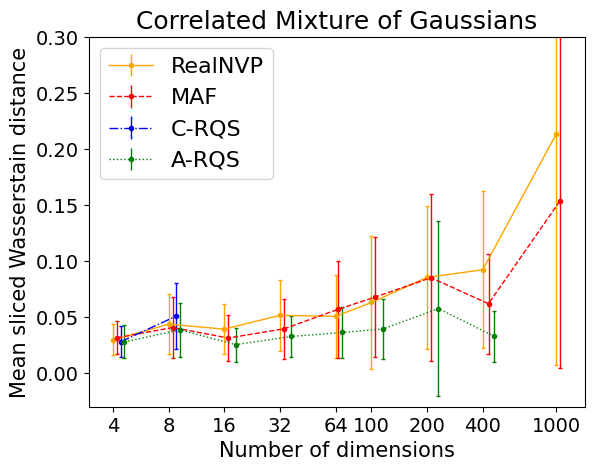

In [325]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = '.'#'go--'#'.'
fontsize_x=15
fontsize_y=15
fontsize_title=18
fontsize_legend=16
fontsize_ticks=14
spacing=20
[x,y,delta_y]=[RealNVPN_corr_WD[:,i] for i in [0,1,2]]
#plt.plot(x0,RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.errorbar(x,y,delta_y, fmt=point_marker, label='RealNVP', color='orange', linestyle="-", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='orange')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='orange')
[x,y,delta_y]=[MAFN_corr_WD[:,i] for i in [0,1,2]]
x=x+np.append((x[1:]-x[:-1]),x[-1])*1/spacing
plt.errorbar(x,y,delta_y, fmt=point_marker, label='MAF', color='red', linestyle="--", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='red')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='red')
[x,y,delta_y]=[CsplineN_corr_WD[:,i] for i in [0,1,2]]
x=x+np.append((x[1:]-x[:-1]),x[-1])*2/spacing
plt.errorbar(x,y,delta_y, fmt=point_marker, label='C-RQS', color='blue', linestyle="-.", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='blue')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='blue')
[x,y,delta_y]=[MsplineN_corr_WD[:,i] for i in [0,1,2]]
x=x+np.append((x[1:]-x[:-1]),x[-1])*3/spacing
plt.errorbar(x,y,delta_y, fmt=point_marker, label='A-RQS', color='green', linestyle=":", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='green')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='green')
if labels:
    for i in MsplineN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of dimensions', fontsize=fontsize_x)
plt.ylabel('Mean sliced Wasserstain distance', fontsize=fontsize_y)
plt.ylim(-0.03,0.3)
plt.title("Correlated Mixture of Gaussians", fontsize=fontsize_title)
plt.legend(fontsize=fontsize_legend,loc="upper left")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=fontsize_ticks) # labels along the bottom edge are off
#plt.text(3.5, 0.008, 'Single run\nUncertainties from\nrepeated tests', fontsize=12, ha='left', va='center')
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'],fontsize=fontsize_ticks)
plt.savefig(paper_fig_dir + 'Best_WD_median_corr.pdf')
plt.show()
plt.close()

### KS

In [315]:
MsplineN_corr_KS = extract_lines(df_best,"MsplineN","ks_all_mean",replicas=False)
CsplineN_corr_KS = extract_lines(df_best,"CsplineN","ks_all_mean",replicas=False)
MAFN_corr_KS = extract_lines(df_best,"MAFN","ks_all_mean",replicas=False)
RealNVPN_corr_KS = extract_lines(df_best,"RealNVPN","ks_all_mean",replicas=False)

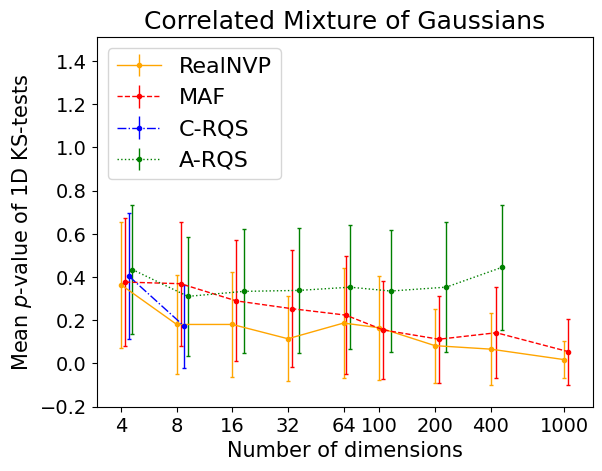

In [323]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = '.'#'go--'#'.'
fontsize_x=15
fontsize_y=15
fontsize_title=18
fontsize_legend=16
fontsize_ticks=14
spacing=20
[x,y,delta_y]=[RealNVPN_corr_KS[:,i] for i in [0,1,2]]
#plt.plot(x0,RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.errorbar(x,y,delta_y, fmt=point_marker, label='RealNVP', color='orange', linestyle="-", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='orange')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='orange')
[x,y,delta_y]=[MAFN_corr_KS[:,i] for i in [0,1,2]]
x=x+np.append((x[1:]-x[:-1]),x[-1])*1/spacing
plt.errorbar(x,y,delta_y, fmt=point_marker, label='MAF', color='red', linestyle="--", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='red')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='red')
[x,y,delta_y]=[CsplineN_corr_KS[:,i] for i in [0,1,2]]
x=x+np.append((x[1:]-x[:-1]),x[-1])*2/spacing
plt.errorbar(x,y,delta_y, fmt=point_marker, label='C-RQS', color='blue', linestyle="-.", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='blue')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='blue')
[x,y,delta_y]=[MsplineN_corr_KS[:,i] for i in [0,1,2]]
x=x+np.append((x[1:]-x[:-1]),x[-1])*3/spacing
plt.errorbar(x,y,delta_y, fmt=point_marker, label='A-RQS', color='green', linestyle=":", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='green')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='green')
if labels:
    for i in MsplineN_corr_KS:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_KS:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_KS:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_KS:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of dimensions', fontsize=fontsize_x)
plt.ylabel('Mean $p$-value of 1D KS-tests', fontsize=fontsize_y)
plt.ylim(-0.2,1.51)
plt.title("Correlated Mixture of Gaussians", fontsize=fontsize_title)
plt.legend(fontsize=fontsize_legend,loc="upper left")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=fontsize_ticks) # labels along the bottom edge are off
#plt.text(170, 7, 'Single run\nUncertainties from\nrepeated tests', fontsize=12, ha='left', va='top')
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'],fontsize=fontsize_ticks)
plt.savefig(paper_fig_dir + 'Best_KS_median_corr.pdf')
plt.show()
plt.close()

### Frobenius-norm

In [281]:
MsplineN_corr_FN = extract_lines(df_best,"MsplineN","fn_all_mean",replicas=False)
CsplineN_corr_FN = extract_lines(df_best,"CsplineN","fn_all_mean",replicas=False)
MAFN_corr_FN = extract_lines(df_best,"MAFN","fn_all_mean",replicas=False)
RealNVPN_corr_FN = extract_lines(df_best,"RealNVPN","fn_all_mean",replicas=False)

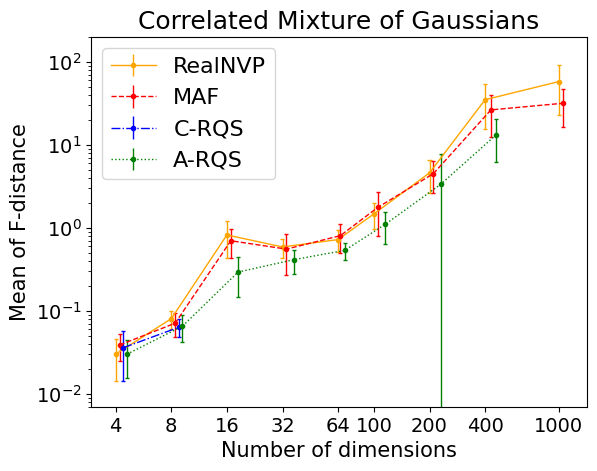

In [282]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = '.'#'go--'#'.'
fontsize_x=15
fontsize_y=15
fontsize_title=18
fontsize_legend=16
fontsize_ticks=14
spacing=20
[x,y,delta_y]=[RealNVPN_corr_FN[:,i] for i in [0,1,2]]
#plt.plot(x0,RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.errorbar(x,y,delta_y, fmt=point_marker, label='RealNVP', color='orange', linestyle="-", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='orange')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='orange')
[x,y,delta_y]=[MAFN_corr_FN[:,i] for i in [0,1,2]]
x=x+np.append((x[1:]-x[:-1]),x[-1])*1/spacing
plt.errorbar(x,y,delta_y, fmt=point_marker, label='MAF', color='red', linestyle="--", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='red')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='red')
[x,y,delta_y]=[CsplineN_corr_FN[:,i] for i in [0,1,2]]
x=x+np.append((x[1:]-x[:-1]),x[-1])*2/spacing
plt.errorbar(x,y,delta_y, fmt=point_marker, label='C-RQS', color='blue', linestyle="-.", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='blue')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='blue')
[x,y,delta_y]=[MsplineN_corr_FN[:,i] for i in [0,1,2]]
x=x+np.append((x[1:]-x[:-1]),x[-1])*3/spacing
plt.errorbar(x,y,delta_y, fmt=point_marker, label='A-RQS', color='green', linestyle=":", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='green')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='green')
if labels:
    for i in MsplineN_corr_FN:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_FN:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_FN:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_FN:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions', fontsize=fontsize_x)
plt.ylabel('Mean of F-distance', fontsize=fontsize_y)
plt.ylim(0.007,200)
plt.title("Correlated Mixture of Gaussians", fontsize=fontsize_title)
plt.legend(fontsize=fontsize_legend,loc="upper left")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=fontsize_ticks) # labels along the bottom edge are off
#plt.text(170, 0.03, 'Single run\nUncertainties from\nrepeated tests', fontsize=12, ha='left', va='center')
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'],fontsize=fontsize_ticks)
plt.savefig(paper_fig_dir + 'Best_FN_corr.pdf')
plt.show()
plt.close()

### Training time

In [283]:
MsplineN_corr_time = extract_lines(df_best,"MsplineN","tt_all_mean",replicas=False).astype(np.float)
CsplineN_corr_time = extract_lines(df_best,"CsplineN","tt_all_mean",replicas=False).astype(np.float)
MAFN_corr_time = extract_lines(df_best,"MAFN","tt_all_mean",replicas=False).astype(np.float)
RealNVPN_corr_time = extract_lines(df_best,"RealNVPN","tt_all_mean",replicas=False).astype(np.float)

/tmp/ipykernel_2274/1783991369.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  MsplineN_corr_time = extract_lines(df_best,"MsplineN","tt_all_mean",replicas=False).astype(np.float)
/tmp/ipykernel_2274/1783991369.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  CsplineN_corr_time = extract_lines(df_best,"CsplineN","tt_all_mean",repli

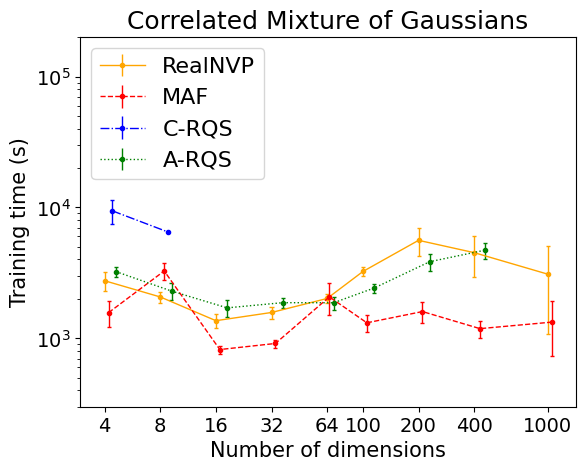

In [284]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = '.'#'go--'#'.'
fontsize_x=15
fontsize_y=15
fontsize_title=18
fontsize_legend=16
fontsize_ticks=14
spacing=20
[x,y,delta_y]=[RealNVPN_corr_time[:,i] for i in [0,1,2]]
#plt.plot(x0,RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.errorbar(x,y,delta_y, fmt=point_marker, label='RealNVP', color='orange', linestyle="-", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='orange')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='orange')
[x,y,delta_y]=[MAFN_corr_time[:,i] for i in [0,1,2]]
x=x+np.append((x[1:]-x[:-1]),x[-1])*1/spacing
plt.errorbar(x,y,delta_y, fmt=point_marker, label='MAF', color='red', linestyle="--", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='red')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='red')
[x,y,delta_y]=[CsplineN_corr_time[:,i] for i in [0,1,2]]
x=x+np.append((x[1:]-x[:-1]),x[-1])*2/spacing
plt.errorbar(x,y,delta_y, fmt=point_marker, label='C-RQS', color='blue', linestyle="-.", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='blue')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='blue')
[x,y,delta_y]=[MsplineN_corr_time[:,i] for i in [0,1,2]]
x=x+np.append((x[1:]-x[:-1]),x[-1])*3/spacing
plt.errorbar(x,y,delta_y, fmt=point_marker, label='A-RQS', color='green', linestyle=":", linewidth=linewidth)
for i in range(len(x)):
    plt.hlines(y[i] + delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='green')
    plt.hlines(y[i] - delta_y[i], x[i]-x[i]/spacing/2, x[i]+x[i]/spacing/2, linewidth=linewidth, color='green')
if labels:
    for i in MsplineN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_time:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_time:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions', fontsize=fontsize_x)
plt.ylabel('Training time (s)', fontsize=fontsize_y)
plt.ylim(300,200000)
plt.title("Correlated Mixture of Gaussians", fontsize=fontsize_title)
plt.legend(fontsize=fontsize_legend,loc="upper left")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=fontsize_ticks) # labels along the bottom edge are off
#plt.text(170, 100000, 'Multi run\nUncertainties from\nrepeated trainings', fontsize=12, ha='left', va='top')
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'],fontsize=fontsize_ticks)
plt.savefig(paper_fig_dir + 'Best_training_time_corr.pdf')
plt.show()
plt.close()

### Score

In [285]:
MsplineN_score = extract_lines(df_best,"MsplineN","score",replicas=False).astype(np.float)
CsplineN_score = extract_lines(df_best,"CsplineN","score",replicas=False).astype(np.float)
MAFN_score = extract_lines(df_best,"MAFN","score",replicas=False).astype(np.float)
RealNVPN_score = extract_lines(df_best,"RealNVPN","score",replicas=False).astype(np.float)

/tmp/ipykernel_2274/1058485306.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  MsplineN_score = extract_lines(df_best,"MsplineN","score",replicas=False).astype(np.float)
/tmp/ipykernel_2274/1058485306.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  CsplineN_score = extract_lines(df_best,"CsplineN","score",replicas=False).astype(np

In [290]:
MsplineN_score

array([[  4.        ,  -0.8008612 ,  -0.8008612 ],
       [  8.        ,  -0.86581318,  -0.86581318],
       [ 16.        ,  -1.13768504,  -1.13768504],
       [ 32.        ,  -1.64646223,  -1.64646223],
       [ 64.        ,  -1.60170069,  -1.60170069],
       [100.        ,  -1.63169901,  -1.63169901],
       [200.        ,  -1.14022568,  -1.14022568],
       [400.        ,  -1.3750951 ,  -1.3750951 ]])

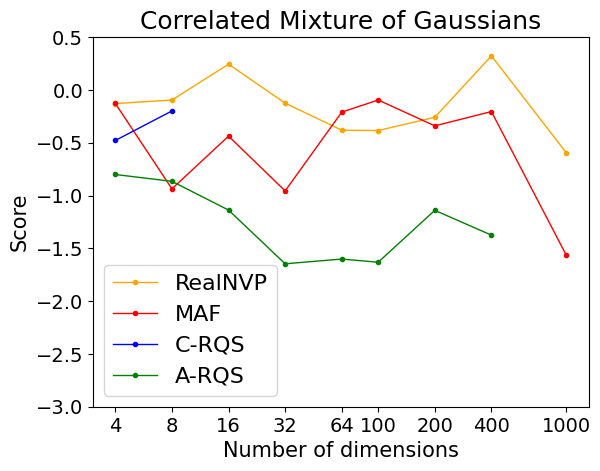

In [297]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = '.'#'go--'#'.'
fontsize_x=15
fontsize_y=15
fontsize_title=18
fontsize_legend=16
fontsize_ticks=14
spacing=20
plt.plot(RealNVPN_score[:,0],RealNVPN_score[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_score[:,0],MAFN_score[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_score[:,0],CsplineN_score[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_score[:,0],MsplineN_score[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_time:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_time:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of dimensions', fontsize=fontsize_x)
plt.ylabel('Score', fontsize=fontsize_y)
plt.ylim(-3,0.5)
plt.title("Correlated Mixture of Gaussians", fontsize=fontsize_title)
plt.legend(fontsize=fontsize_legend,loc="lower left")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=fontsize_ticks) # labels along the bottom edge are off
#plt.text(170, 100000, 'Multi run\nUncertainties from\nrepeated trainings', fontsize=12, ha='left', va='top')
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'],fontsize=fontsize_ticks)
plt.savefig(paper_fig_dir + 'Best_score_corr.pdf')
plt.show()
plt.close()

## Tables

In [561]:
df_bests_corr[0]

run_n  run_seed  ndims  nsamples correlation  nbijectors  bijector  \
0      1         0      4    100000        corr           2  MsplineN   
1      1         0      4    100000        corr           5  CsplineN   
2      4         0      4    100000        corr          10  RealNVPN   
3      2         0      4    100000        corr           5      MAFN   

  activation  knots  range_min  eps_regulariser regulariser   ks_mean  \
0       relu      8        -16                0        None  0.495217   
1       relu      8        -16                0        None  0.548395   
2       relu      8         -5                0        None  0.307817   
3       relu      8         -5                0        None  0.319240   

     ks_std   ad_mean    ad_std   wd_mean    wd_std  swd_mean   swd_std  \
0  0.251435  0.216209  0.066911  0.026842  0.012460  0.027267  0.011680   
1  0.297681  0.218421  0.064449  0.023984  0.010414  0.025026  0.010843   
2  0.255519  0.188032  0.080101  0.026637  0.008139  0.026858  0.011076   
3  0.235655  0.196969  0.076791  0.027648  0.011148  0.027307  0.011358   

    fn_mean    fn_std hidden_layers  batch_size  epochs_input  epochs_output  \
0  0.017926  0.010255   128-128-128         512          1000            360   
1  0.022538  0.006425   128-128-128         512          1000            310   
2  0.018490  0.008663   256-256-256         256          1000            337   
3  0.034974  0.014084   256-256-256         512          1000            361   

          time  
0  1878.589050  
1  8690.510488  
2  3307.465860  
3   833.398603

In [731]:
final_string=""
header = r"""\begin{tabular}{lrlrlllrr}
\toprule
\multicolumn{9}{c}{\bf Best Models for Correlated Mixture of Gaussians} \\
\midrule
hidden& \# of	&  algorithm 	&  spline 	& Sliced 		& KS-test	& Frobenius 	& \# of  	& training 	\\
layers & bijec. 	&  		&  knots 	& WD		 	& $p$-value	& Norm 	&	epochs	& time (s)  	\\
\midrule"""
for i in range(9):
    tmp=df_bests_corr[i]
    ndims=tmp["ndims"][0]
    #print("Dimensions:", ndims)
    tmp=tmp[tmp["correlation"]=="corr"]
    tmp=tmp[["hidden_layers","nbijectors","bijector","spline_knots","swd_mean","swd_std", "ks_mean","ks_std","fn_mean","fn_std","epochs_output","time"]]
    for k in ["swd_mean","ks_mean","fn_mean"]:
        #tmp[k]="$"+tmp[k].apply(lambda x: "{:.2e}".format(float(x)))+"\pm "+tmp[k.replace("mean","std")].apply(lambda x: "{:.2e}".format(float(x)))+"$"
        tmp[k]="$"+tmp[k].apply(lambda x: str(format_number(float(x))))+"\pm "+tmp[k.replace("mean","std")].apply(lambda x: str(format_number(float(x))))+"$"
        tmp.pop(k.replace("mean","std"))
    tmp["time"]=tmp["time"].apply(lambda x: int(float(x)))
    tmp.loc[tmp["bijector"]=="RealNVPN","spline_knots"]="--"
    tmp.loc[tmp["bijector"]=="MAFN","spline_knots"]="--"
    tmp.loc[tmp["bijector"]=="MAFN","bijector"]="MAF"
    tmp.loc[tmp["bijector"]=="RealNVPN","bijector"]="RealNVP"
    tmp.loc[tmp["bijector"]=="MsplineN","bijector"]="A-RQS "
    tmp.loc[tmp["bijector"]=="CsplineN","bijector"]="C-RQS"
    tmp['hidden_layers'] = tmp['hidden_layers'].str.replace(r'(\d+)-(\d+)-(\d+)', r'$3\times \1$', regex=True)
    string=tmp.to_latex(index=False).replace(r"\textbackslash ","\\").replace(r"\$","$")
    string=transform_string_1(string)
    string='\n'.join(string.splitlines()[3:-2])
    string=string.strip()
    string="\n"+r"\midrule"+"\n"+r"\multicolumn{9}{l}{\bf "+str(ndims)+r"D} \\"+"\n"+string
    final_string = final_string+string
final_string = final_string+"\n" +r"""\bottomrule
\end{tabular}"""
final_string = align_table_latex(final_string)
final_string = final_string.replace('\n\\midrule\n\\multicolumn{9}{l}{\\bf 4D}','\\multicolumn{9}{l}{\\bf 4D}')
final_string = header+"\n"+final_string
print(final_string)

\begin{tabular}{lrlrlllrr}
\toprule
\multicolumn{9}{c}{\bf Best models for CMoG} \\
\midrule
hidden& \# of	&  algorithm 	&  spline 	& Sliced 		& KS-test	& Frobenius 	& \# of  	& training 	\\
layers & bijec. 	&  		&  knots 	& WD		 	& $p$-value	& Norm 	&	epochs	& time (s)  	\\
\midrule
\multicolumn{9}{l}{\bf 4D} \\
\midrule
$3\times 128$ &           2 &   A-RQS  &            8 & $0.027\pm 0.012$ & $0.495\pm 0.251$    &  $0.018\pm 0.01$ &            360 &  1878 \\
$3\times 128$ &           5 &    C-RQS &            8 & $0.025\pm 0.011$ & $0.548\pm 0.298$    & $0.023\pm 0.006$ &            310 &  8690 \\
$3\times 256$ &          10 &  RealNVP &           -- & $0.027\pm 0.011$ & $0.308\pm 0.256$    & $0.018\pm 0.009$ &            337 &  3307 \\
$3\times 256$ &           5 &      MAF &           -- & $0.027\pm 0.011$ & $0.319\pm 0.236$    & $0.035\pm 0.014$ &            361 &   833 \\
\midrule
\multicolumn{9}{l}{\bf 8D} \\
\midrule
$3\times 128$ &           5 &      MAF &           -- & $0.0

/tmp/ipykernel_416/4097321329.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string=tmp.to_latex(index=False).replace(r"\textbackslash ","\\").replace(r"\$","$")
/tmp/ipykernel_416/4097321329.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string=tmp.to_latex(index=False).replace(r"\textbackslash ","\\").replace(r"\$","$")
/tmp/ipykernel_416/4097321329.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of 

In [659]:
final_string.replace("\n\\midrule\n\\multicolumn{9}{l}{\\bf 4D}",r"\multicolumn{9}{l}{\\bf 4D}")

'\\multicolumn{9}{l}{\\\\bf 4D} \\\\\n\\midrule\n$3\\times 128$ &           2 &   A-RQS  &            8 &  $(2.73\\pm 1.17)$e-02  &  $(4.95\\pm 2.51)$e-01  &  $(1.79\\pm 1.03)$e-02   &            360   &  1878 \\\\\n$3\\times 128$ &           5 &    C-RQS &            8 &  $(2.50\\pm 1.08)$e-02  &  $(5.48\\pm 2.98)$e-01  & $2.25e-02\\pm 6.42e-03$  &            310  &  8690 \\\\\n$3\\times 256$ &          10 &  RealNVP &           -- &  $(2.69\\pm 1.11)$e-02  &  $(3.08\\pm 2.56)$e-01  & $1.85e-02\\pm 8.66e-03$  &            337  &  3307 \\\\\n$3\\times 256$ &           5 &      MAF &           -- &  $(2.73\\pm 1.14)$e-02  &  $(3.19\\pm 2.36)$e-01  &  $(3.50\\pm 1.41)$e-02   &            361   &   833 \\\\\n\\bottomrule\n\\midrule\n\\multicolumn{9}{l}{\\bf 8D} \\\\\n\\midrule\n$3\\times 128$ &           5 &      MAF &           -- &  $(4.12\\pm 2.23)$e-02  &  $(4.30\\pm 2.74)$e-01  &  $(7.88\\pm 2.02)$e-02   &            327   &   752 \\\\\n$3\\times 128$ &           2 &   A-RQS  &      

In [12]:
import re

def transform_string(input_string):
    # Regular expression to find parts like '& $2.42e-02\pm 1.00e-02$'
    matches = re.findall(r"(& \$(\d+\.\d+)(e-\d+)\\pm (\d+\.\d+)(e-\d+)\$)", input_string)

    # If we found matches
    if matches:
        for match in matches:
            # Check if exponents are the same
            if match[2] == match[4]:
                # Now move e-XX at end after $
                new_format = "{} ${}\\pm {}${}".format(match[0].split('$')[0], match[1], match[3], match[2])
                # Replace the original match with the new format
                input_string = input_string.replace(match[0], new_format)
            
    return input_string

input_string = "& $2.42e-02\\pm 1.00e-02$"
print(transform_string(input_string))

&  $2.42\pm 1.00$e-02


In [9]:
import re

def transform_string(input_string):
    # Regular expression to find parts like '& $2.42e-02\pm 1.00e-02$'
    matches = re.findall(r"(& \$(\d+\.\d+)(e-\d+)\\pm (\d+\.\d+)(e-\d+)\$)", input_string)

    # If we found matches
    if matches:
        for match in matches:
            # Now move e-XX at end after $
            new_format = "{} ${}\\pm {}${}".format(match[0].split('$')[0], match[1], match[3], match[2])
            # Replace the original match with the new format
            input_string = input_string.replace(match[0], new_format)
            
    return input_string

input_string = "& $2.42e-02\\pm 1.00e-02$"
print(transform_string(input_string))

&  $2.42\pm 1.00$e-02


In [168]:
tmp.loc[df["bijector"]=="RealNVPN","spline_knots"]

1    --
8    --
Name: spline_knots, dtype: object

# Re-evaluate models

In [47]:
def recompute_metrics(run):
    print("Recomputing metrics for run",run.replace("results.txt",""),".")
    start_all=timer()
    tmp = pd.read_csv(run)
    X_data_nf = np.load(run.replace("results.txt","nf_sample.npy"))
    np.shape(X_data_nf)
    run_n=int(tmp["run_n"])
    run_seed=int(tmp["run_seed"])
    ndims=int(tmp["ndims"])
    nsamples=int(tmp["nsamples"])
    correlation=str(tmp["correlation"][0])
    nbijectors=int(tmp["nbijectors"])
    bijector=str(tmp["bijector"][0])
    activation=str(tmp["activation"][0])
    spline_knots=int(tmp["spline_knots"])
    range_min=int(tmp["range_min"])
    eps_regulariser=tmp["eps_regulariser"][0]
    regulariser=tmp["regulariser"][0]
    hidden_layers=str(tmp["hidden_layers"][0])
    batch_size=int(tmp["batch_size"])
    epochs_input=int(tmp["epochs_input"])
    epochs_output=int(tmp["epochs_output"])
    time=tmp["time"][0]
    reset_random_seeds(0)
    ncomp=3
    ntest_samples=100000
    seed_dist = 0
    seed_test = 0
    targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    X_data_test=targ_dist.sample(ntest_samples,seed=seed_test).numpy()
    start=timer()
    ks_mean,ks_std,ad_mean,ad_std,,wd_mean,wd_std,swd_mean,swd_std,fn_mean,fn_std=Metrics.ComputeMetrics(X_data_test,X_data_nf)
    results_dict = {'run_n': [run_n],
                    'run_seed': [run_seed],
                    'ndims':[ndims],
                    'nsamples':[nsamples],
                    'correlation':[correlation],
                    'nbijectors':[nbijectors],
                    'bijector':[bijector],
                    'activation':[activation],
                    'spline_knots':[spline_knots],
                    'range_min':[range_min],
                    'eps_regulariser':[eps_regulariser],
                    'regulariser':[regulariser],
                    'kl_divergence':[kl_divergence],
                    'ks_test_mean':[ks_mean],
                    'ks_test_median':[ks_median],
                    'ad_test_mean':[ad_mean],
                    'ad_test_median':[ad_median],
                    'Wasserstein_median':[w_distance_median],
                    'Wasserstein_mean':[w_distance_mean],
                    'sliced_Wasserstein_mean':[swd_mean],
                    'sliced_Wasserstein_std':[swd_std],
                    'frob_norm':[frob_norm],
                    'hidden_layers':[hidden_layers],
                    'batch_size':[batch_size],
                    'epochs_input':[epochs_input],
                    'epochs_output':[epochs_output],
                    'time':[time]}
    os.rename(run, run.replace(".txt","_old.txt"))
    Utils.results_current(run.replace("results.txt",""),results_dict)
    tmp_new = pd.read_csv(run)
    end=timer()
    print("Metrics for run",run.replace("results.txt",""),"computed and saved in",end-start,"s.")
    return tmp

In [48]:
run=list(correlated_unc_results_paths.values())[0]+"4D/run_5/results.txt"
pd.read_csv(run)
recompute_metrics(run)

Recomputing metrics for run ../CMoG/results/MAFN_best/4D/run_5/ .


/mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/post-processing/../code/Metrics.py:187: UserWarning: p-value capped: true value larger than 0.25
  p_val=anderson_ksamp([x_estimated[:,dim], batch_test[:,dim]])[2]
/mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/post-processing/../code/Metrics.py:187: UserWarning: p-value floored: true value smaller than 0.001
  p_val=anderson_ksamp([x_estimated[:,dim], batch_test[:,dim]])[2]


Metrics for run ../CMoG/results/MAFN_best/4D/run_5/ computed and saved in 1.2691607510000722 s.


run_n  run_seed  ndims  nsamples correlation  nbijectors bijector  \
0      5       520      4    100000        corr           5     MAFN   

  activation  spline_knots  range_min  ...  Wasserstein_median  \
0       relu             8         -5  ...            0.025781   

  Wasserstein_mean  sliced_Wasserstein_mean  sliced_Wasserstein_std  \
0         0.025781                 0.017306                0.001822   

   frob_norm  hidden_layers  batch_size  epochs_input  epochs_output  \
0   0.010386    128-128-128         512          1000            652   

          time  
0  7184.605105  

[1 rows x 27 columns]

In [105]:
tmp=
X_data_nf = np.load(list(correlated_unc_results_paths.values())[0]+"4D/run_5/nf_sample.npy")
np.shape(X_data_nf)
#arg_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
#X_data_test=targ_dist.sample(ntest_samples,seed=seed_test).numpy()

(100000, 4)

In [106]:
ndims=4
reset_random_seeds(0)

### Initialize number of components ###
def MixtureGaussian(ncomp,ndims,seed=0):
    targ_dist = MixtureDistributions.MixMultiNormal1(ncomp,ndims,seed=seed)
    return targ_dist
ntest_samples=100000
seed_dist = 0
seed_test = 0
targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
X_data_test=targ_dist.sample(ntest_samples,seed=seed_test).numpy()
np.shape(X_data_test)
X_data_test[0]

array([4.2423981 , 7.12590057, 6.06101175, 9.83516205])

In [107]:
ks_mean,ks_std,ad_mean,ad_std,,wd_mean,wd_std,swd_mean,swd_std,fn_mean,fn_std=Metrics.ComputeMetrics(X_data_test,X_data_nf)
{'kl_divergence': kl_divergence,'ks_test_mean': ks_mean,'ks_test_median':ks_median,'ad_test_mean':ad_mean,'ad_test_median':ad_median,'Wasserstein_median':w_distance_median,'Wasserstein_mean':w_distance_mean,'frob_norm':frob_norm}

/mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/post-processing/../code/Metrics.py:187: UserWarning: p-value capped: true value larger than 0.25
  p_val=anderson_ksamp([x_estimated[:,dim], batch_test[:,dim]])[2]
/mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/post-processing/../code/Metrics.py:187: UserWarning: p-value floored: true value smaller than 0.001
  p_val=anderson_ksamp([x_estimated[:,dim], batch_test[:,dim]])[2]


{'kl_divergence': -1,
 'ks_test_mean': 0.5001360132927927,
 'ks_test_median': 0.5071681592536929,
 'ad_test_mean': 0.20878356996181632,
 'ad_test_median': 0.21184494329967268,
 'Wasserstein_median': 0.02578086762691431,
 'Wasserstein_mean': 0.02578086762691431,
 'frob_norm': 0.010386194116092153}

# Bkp

## Re-evaluate metrics

In [101]:
from scipy.stats import wasserstein_distance
def Wasserstein_distance_old(target_test_data,nf_dist,norm=True):
    print("\nWasserstein_distance_old function")
    ##create data sample from trained normising flow
    #z=base_dist.sample((target_test_data.shape[0]))
    #x_estimated=nf_dist.bijector.forward(z).numpy()
    if norm==False:
        x_estimated=nf_dist.sample(target_test_data.shape[0])
        x_estimated=np.reshape(x_estimated,newshape=target_test_data.shape)
    else:
        x_estimated=nf_dist
    wasserstein_distances=[]
    for dim in range(target_test_data.shape[1]):
        #print(wasserstein_distance(x_target[:,dim], x_estimated[:,dim]))
        ws_distance=wasserstein_distance(target_test_data[:,dim], x_estimated[:,dim])
        wasserstein_distances.append(ws_distance)
    wd_mean = np.mean(wasserstein_distances)
    wd_std = np.std(wasserstein_distances)
    print(len(wasserstein_distances),"WD tests performed with",[len(target_test_data),len(x_estimated)],"dimensional samples.")
    print("WD Mean =",wd_mean)
    print("WD Std =",wd_std)
    #print("Samples =\n",wasserstein_distances)
    return [wd_mean,wd_std]

def sliced_Wasserstein_distance_old(target_test_data, nf_dist, norm=True, n_slices=None, seed=None):
    """
    Compute the sliced Wasserstein distance between two sets of points
    using n_slices random directions and the p-th Wasserstein distance.
    """
    print("\nsliced_Wasserstein_distance_old function")
    if seed is None:
        np.random.seed(np.random.randint(10e6))
    else:
        np.random.seed(int(seed))
    if n_slices is None:
        n_slices = target_test_data.shape[1]
    else:
        n_slices = int(n_slices)
    if norm==False:
        x_estimated=nf_dist.sample(target_test_data.shape[0])
        x_estimated=np.reshape(x_estimated,newshape=target_test_data.shape)
    else:
        x_estimated=nf_dist
    # Generate random directions
    directions = np.random.randn(n_slices, target_test_data.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, None]
    # Compute sliced Wasserstein distance
    ws_distances = []
    for direction in directions:
        target_proj = target_test_data @ direction
        estimated_proj = x_estimated @ direction
        ws_distances.append(wasserstein_distance(target_proj, estimated_proj))
    swd_mean = np.mean(ws_distances)
    swd_std = np.std(ws_distances)
    print(len(ws_distances),"SWD tests performed with",[len(target_test_data),len(x_estimated)],"dimensional samples.")
    print("SWD Mean =",swd_mean)
    print("SWD Std =",swd_std)
    #print("Samples =\n",wasserstein_distances)
    return [swd_mean,swd_std]

def WD(dist_1,dist_2,n_iter=100,batch_size=100000):
    """
    The Wasserstein distance between the target distribution and the distribution of the test data.
    The test is performed for each dimension of the distributions and the mean and std of the p-values are returned. 
    _summary_

    Args:
        dist_1 (numpy array or distribution): The first distribution to be compared
        dist_2 (numpy array or distribution): The second distribution to be compared
        n_iter (int, optional): Number of iterations to be performed. Defaults to 100.
        batch_size (int, optional): Number of samples to be used in each iteration. Only used if num is true. Defaults to 100000.

    Returns:
        [float,float]: Mean and std of the p-values obtained from the KS tests
    """
    print("\nWD function")
    # If an array of the input is an array, then the input batch_size is ignored and batch_size is set to nsamples/n_iter
    if isinstance(dist_1, np.ndarray):
        ndims=dist_1.shape[1]
        nsamples=dist_1.shape[0]
        batch_size=int(nsamples/n_iter)
    elif isinstance(dist_2, np.ndarray):
        ndims=dist_2.shape[1]
        nsamples=dist_2.shape[0]
        batch_size=int(nsamples/n_iter)
    else:
        ndims=dist_1.sample(2).numpy().shape[1]
    # Define ad_list that will contain the list of wd for all dimensions and all iterations
    wd_list=[]
    # Loop over all iterations
    for k in range(n_iter):
        # If num is true, then the samples are split in n_iter batches of size nsamples/n_iter, otherwise we just sample batch_size points from the distributions
        if isinstance(dist_1, np.ndarray):
            dist_1_k=dist_1[k*batch_size:(k+1)*batch_size,:]
        elif isinstance(dist_1, tfd.distribution.Distribution):
            dist_1_k=dist_1.sample(batch_size).numpy()
        else:   
            raise ValueError("dist_1 must be either a numpy array or a distribution")
        if isinstance(dist_2, np.ndarray):
            dist_2_k=dist_2[k*batch_size:(k+1)*batch_size,:]
        elif isinstance(dist_2, tfd.distribution.Distribution):
            dist_2_k=dist_2.sample(batch_size).numpy()
        else:   
            raise ValueError("dist_1 must be either a numpy array or a distribution")
        # The WD test is computed and saved for each dimension
        for dim in range(ndims):
            wd=wasserstein_distance(dist_1_k[:,dim], dist_2_k[:,dim])
            wd_list.append(wd)
    #print(wd_list)
    # Compute the mean and std of the p-values
    wd_mean = np.mean(wd_list)
    wd_std = np.std(wd_list)
    print(len(wd_list),"WD tests performed with",[len(dist_1_k),len(dist_2_k)],"dimensional samples.")
    print("WD Mean =",wd_mean)
    print("WD Std =",wd_std)
    #print("Samples =\n",wd_list)
    # Return the mean and std of the p-values
    #return wd_list
    return [wd_mean,wd_std]

def SWD(dist_1,dist_2,n_iter=100,batch_size=100000,n_slices=100,seed=None):
    """
    Compute the sliced Wasserstein distance between two sets of points
    using n_slices random directions and the p-th Wasserstein distance.
    The test is performed for each dimension of the distributions and the mean and std of the p-values are returned. 
    _summary_

    Args:
        dist_1 (numpy array or distribution): The first distribution to be compared
        dist_2 (numpy array or distribution): The second distribution to be compared
        n_iter (int, optional): Number of iterations to be performed. Defaults to 100.
        batch_size (int, optional): Number of samples to be used in each iteration. Only used if num is true. Defaults to 100000.

    Returns:
        [float,float]: Mean and std of the p-values obtained from the KS tests
    """
    print("\nSWD function")
    # If an array of the input is an array, then the input batch_size is ignored and batch_size is set to nsamples/n_iter
    if isinstance(dist_1, np.ndarray):
        ndims=dist_1.shape[1]
        nsamples=dist_1.shape[0]
        batch_size=int(nsamples/n_iter)
    elif isinstance(dist_2, np.ndarray):
        ndims=dist_2.shape[1]
        nsamples=dist_2.shape[0]
        batch_size=int(nsamples/n_iter)
    else:
        ndims=dist_1.sample(2).numpy().shape[1]
    if seed is None:
        np.random.seed(np.random.randint(1000000))
    else:
        np.random.seed(int(seed))
    if n_slices is None:
        n_slices = np.max([100,ndims])
    else:
        n_slices = int(n_slices)
    # Define ad_list that will contain the list of swd for all dimensions and all iterations
    swd_list=[]
    # Loop over all iterations
    for k in range(n_iter):
        # If num is true, then the samples are split in n_iter batches of size nsamples/n_iter, otherwise we just sample batch_size points from the distributions
        if isinstance(dist_1, np.ndarray):
            dist_1_k=dist_1[k*batch_size:(k+1)*batch_size,:]
        elif isinstance(dist_1, tfd.distribution.Distribution):
            dist_1_k=dist_1.sample(batch_size).numpy()
        else:   
            raise ValueError("dist_1 must be either a numpy array or a distribution")
        if isinstance(dist_2, np.ndarray):
            dist_2_k=dist_2[k*batch_size:(k+1)*batch_size,:]
        elif isinstance(dist_2, tfd.distribution.Distribution):
            dist_2_k=dist_2.sample(batch_size).numpy()
        else:   
            raise ValueError("dist_1 must be either a numpy array or a distribution")
        # Generate random directions
        directions = np.random.randn(n_slices, ndims)
        directions /= np.linalg.norm(directions, axis=1)[:, None]
        # Compute sliced Wasserstein distance
        for direction in directions:
            dist_1_proj = dist_1_k @ direction
            dist_2_proj = dist_2_k @ direction
            swd_list.append(wasserstein_distance(dist_1_proj, dist_2_proj))
    # Compute the mean and std of the p-values
    swd_mean = np.mean(swd_list)
    swd_std = np.std(swd_list)
    print(len(swd_list),"WD tests performed with",[len(dist_1_k),len(dist_2_k)],"dimensional samples.")
    print("WD Mean =",swd_mean)
    print("WD Std =",swd_std)
    return [swd_mean,swd_std]
    
def WD_new(dist_1,dist_2,n_iter=100,batch_size=100000):
    """
    The Wasserstein distance between the target distribution and the distribution of the test data.
    The test is performed for each dimension of the distributions and the mean and std of the p-values are returned. 
    _summary_

    Args:
        dist_1 (numpy array or distribution): The first distribution to be compared
        dist_2 (numpy array or distribution): The second distribution to be compared
        n_iter (int, optional): Number of iterations to be performed. Defaults to 100.
        batch_size (int, optional): Number of samples to be used in each iteration. Only used if num is true. Defaults to 100000.

    Returns:
        [float,float]: Mean and std of the p-values obtained from the KS tests
    """
    print("\nWD_new function")
    # If an array of the input is an array, then the input batch_size is ignored and batch_size is set to nsamples/n_iter
    n_iter=int(np.ceil(np.sqrt(n_iter)))
    if isinstance(dist_1, np.ndarray):
        ndims=dist_1.shape[1]
        nsamples=dist_1.shape[0]
        batch_size=int(nsamples/n_iter)
    elif isinstance(dist_2, np.ndarray):
        ndims=dist_2.shape[1]
        nsamples=dist_2.shape[0]
        batch_size=int(nsamples/n_iter)
    else:
        ndims=dist_1.sample(2).numpy().shape[1]
    # Define ad_list that will contain the list of wd for all dimensions and all iterations
    wd_list=[]
    # Loop over all iterations
    for j in range(n_iter):
        # If num is true, then the samples are split in n_iter batches of size nsamples/n_iter, otherwise we just sample batch_size points from the distributions
        if isinstance(dist_1, np.ndarray):
            dist_1_j=dist_1[j*batch_size:(j+1)*batch_size,:]
        elif isinstance(dist_1, tfd.distribution.Distribution):
            dist_1_j=dist_1.sample(batch_size).numpy()
        else:   
            raise ValueError("dist_1 must be either a numpy array or a distribution")
        for k in range(n_iter):
            if isinstance(dist_2, np.ndarray):
                dist_2_k=dist_2[k*batch_size:(k+1)*batch_size,:]
            elif isinstance(dist_2, tfd.distribution.Distribution):
                dist_2_k=dist_2.sample(batch_size).numpy()
            else:   
                raise ValueError("dist_1 must be either a numpy array or a distribution")
            # The WD test is computed and saved for each dimension
            for dim in range(ndims):
                wd=wasserstein_distance(dist_1_j[:,dim], dist_2_k[:,dim])
                wd_list.append(wd)
    #print(wd_list)
    # Compute the mean and std of the p-values
    wd_mean = np.mean(wd_list)
    wd_std = np.std(wd_list)
    print(len(wd_list),"WD tests performed with",[len(dist_1_j),len(dist_2_k)],"dimensional samples.")
    print("WD Mean =",wd_mean)
    print("WD Std =",wd_std)
    #print("Samples =\n",wd_list)
    # Return the mean and std of the p-values
    #return wd_list
    return [wd_mean,wd_std]

def SWD_new(dist_1,dist_2,n_iter=100,batch_size=100000,n_slices=100,seed=None):
    """
    Compute the sliced Wasserstein distance between two sets of points
    using n_slices random directions and the p-th Wasserstein distance.
    The test is performed for each dimension of the distributions and the mean and std of the p-values are returned. 
    _summary_

    Args:
        dist_1 (numpy array or distribution): The first distribution to be compared
        dist_2 (numpy array or distribution): The second distribution to be compared
        n_iter (int, optional): Number of iterations to be performed. Defaults to 100.
        batch_size (int, optional): Number of samples to be used in each iteration. Only used if num is true. Defaults to 100000.

    Returns:
        [float,float]: Mean and std of the p-values obtained from the KS tests
    """
    print("\nSWD_new function")
    # If an array of the input is an array, then the input batch_size is ignored and batch_size is set to nsamples/n_iter
    n_iter=int(np.ceil(np.sqrt(n_iter)))
    if isinstance(dist_1, np.ndarray):
        ndims=dist_1.shape[1]
        nsamples=dist_1.shape[0]
        batch_size=int(nsamples/n_iter)
    elif isinstance(dist_2, np.ndarray):
        ndims=dist_2.shape[1]
        nsamples=dist_2.shape[0]
        batch_size=int(nsamples/n_iter)
    else:
        ndims=dist_1.sample(2).numpy().shape[1]
    if seed is None:
        np.random.seed(np.random.randint(1000000))
    else:
        np.random.seed(int(seed))
    if n_slices is None:
        n_slices = np.max([100,ndims])
    else:
        n_slices = int(n_slices)
    # Define ad_list that will contain the list of swd for all dimensions and all iterations
    swd_list=[]
    # Loop over all iterations
    for j in range(n_iter):
        # If num is true, then the samples are split in n_iter batches of size nsamples/n_iter, otherwise we just sample batch_size points from the distributions
        if isinstance(dist_1, np.ndarray):
            dist_1_j=dist_1[j*batch_size:(j+1)*batch_size,:]
        elif isinstance(dist_1, tfd.distribution.Distribution):
            dist_1_j=dist_1.sample(batch_size).numpy()
        else:   
            raise ValueError("dist_1 must be either a numpy array or a distribution")
        for k in range(n_iter):
            if isinstance(dist_2, np.ndarray):
                dist_2_k=dist_2[k*batch_size:(k+1)*batch_size,:]
            elif isinstance(dist_2, tfd.distribution.Distribution):
                dist_2_k=dist_2.sample(batch_size).numpy()
            else:   
                raise ValueError("dist_1 must be either a numpy array or a distribution")
            # Generate random directions
            directions = np.random.randn(n_slices, ndims)
            directions /= np.linalg.norm(directions, axis=1)[:, None]
            # Compute sliced Wasserstein distance
            for direction in directions:
                dist_1_proj = dist_1_j @ direction
                dist_2_proj = dist_2_k @ direction
                swd_list.append(wasserstein_distance(dist_1_proj, dist_2_proj))
    # Compute the mean and std of the p-values
    swd_mean = np.mean(swd_list)
    swd_std = np.std(swd_list)
    print(len(swd_list),"WD tests performed with",[len(dist_1_j),len(dist_2_k)],"dimensional samples.")
    print("WD Mean =",swd_mean)
    print("WD Std =",swd_std)
    return [swd_mean,swd_std]

In [53]:
from scipy import stats
def KS_test_1(dist_1,dist_2,n_iter=10,batch_size=100000):
    """
    The Kolmogorov-Smirnov test is a non-parametric test that compares two distributions and returns a p-value that indicates whether the two distributions are the same or not. 
    The test is performed for each dimension of the distributions and for n_iter times and the mean and std of the p-values are returned.
    In the case of numerical distributions, data are split in n_iter batches dist_1_j, dist_2_j of size batch_size=int(nsamples/n_iter) and the mean and std are computed over all pairs of batches dist_1_j, dist_2_j.
    Args:
        dist_1 (numpy array or distribution): The first distribution to be compared
        dist_2 (numpy array or distribution): The second distribution to be compared
        n_iter (int, optional): Number of iterations to be performed. Defaults to 10.
        batch_size (int, optional): Number of samples to be used in each iteration. Only used if num is true. Defaults to 100000.
    Returns:
        [float,float]: Mean and std of the p-values obtained from the KS tests
    """
    print("\nKS_test_1 function")
    # If an array of the input is an array, then the input batch_size is ignored and batch_size is set to nsamples/n_iter
    if isinstance(dist_1, np.ndarray):
        ndims=dist_1.shape[1]
        nsamples=dist_1.shape[0]
        batch_size=int(nsamples/n_iter)
    elif isinstance(dist_2, np.ndarray):
        ndims=dist_2.shape[1]
        nsamples=dist_2.shape[0]
        batch_size=int(nsamples/n_iter)
    else:
        ndims=dist_1.sample(2).numpy().shape[1]
    # Define ks_list that will contain the list of ks for all dimensions and all iterations
    ks_list=[]
    # Loop over all iterations
    for k in range(n_iter):
        # If num is true, then the samples are split in n_iter batches of size nsamples/n_iter, otherwise we just sample batch_size points from the distributions
        if isinstance(dist_1, np.ndarray):
            dist_1_k=dist_1[k*batch_size:(k+1)*batch_size,:]
        elif isinstance(dist_1, tfd.distribution.Distribution):
            dist_1_k=dist_1.sample(batch_size).numpy()
        else:   
            raise ValueError("dist_1 must be either a numpy array or a distribution")
        if isinstance(dist_2, np.ndarray):
            dist_2_k=dist_2[k*batch_size:(k+1)*batch_size,:]
        elif isinstance(dist_2, tfd.distribution.Distribution):
            dist_2_k=dist_2.sample(batch_size).numpy()
        else:   
            raise ValueError("dist_1 must be either a numpy array or a distribution")
        # The ks test is computed and the p-value saved for each dimension
        for dim in range(ndims):
            p_val=stats.ks_2samp(dist_1_k[:,dim], dist_2_k[:,dim])[1]
            ks_list.append(p_val)
    # Compute the mean and std of the p-values
    ks_mean = np.mean(ks_list)
    ks_std = np.std(ks_list)
    print(len(ks_list),"KS tests performed with",[len(dist_1_k),len(dist_2_k)],"dimensional samples.")
    print("KS Mean =",ks_mean)
    print("KS Std =",ks_std)
    # Return the mean and std of the p-values
    return [ks_mean,ks_std]


def KS_test_2(dist_1,dist_2,n_iter=100,batch_size=100000):
    """
    The Kolmogorov-Smirnov test is a non-parametric test that compares two distributions and returns a p-value that indicates whether the two distributions are the same or not. 
    The test is performed for each dimension of the distributions and for n_iter times and the mean and std of the p-values are returned.
    In the case of numerical distributions, data are split in np.ceil(np.sqrt(n_iter)) batches dist_1_j, dist_2_k of size batch_size=int(nsamples/np.ceil(np.sqrt(n_iter))) and the mean and std are computed over all pairs of batches dist_1_j, dist_2_k.
    Args:
        dist_1 (numpy array or distribution): The first distribution to be compared
        dist_2 (numpy array or distribution): The second distribution to be compared
        n_iter (int, optional): Number of iterations to be performed. Defaults to 100.
        batch_size (int, optional): Number of samples to be used in each iteration. Only used if num is true. Defaults to 100000.
    Returns:
        [float,float]: Mean and std of the p-values obtained from the KS tests
    """
    print("\nKS_test_2 function")
    # If an array of the input is an array, then the input batch_size is ignored and batch_size is set to nsamples/n_iter
    n_iter=int(np.ceil(np.sqrt(n_iter)))
    if isinstance(dist_1, np.ndarray):
        ndims=dist_1.shape[1]
        nsamples=dist_1.shape[0]
        batch_size=int(nsamples/n_iter)
    elif isinstance(dist_2, np.ndarray):
        ndims=dist_2.shape[1]
        nsamples=dist_2.shape[0]
        batch_size=int(nsamples/n_iter)
    else:
        ndims=dist_1.sample(2).numpy().shape[1]
    # Define ks_list that will contain the list of ks for all dimensions and all iterations
    ks_list=[]
    # Loop over all iterations
    for j in range(n_iter):
        # If num is true, then the samples are split in n_iter batches of size nsamples/n_iter, otherwise we just sample batch_size points from the distributions
        if isinstance(dist_1, np.ndarray):
            dist_1_j=dist_1[j*batch_size:(j+1)*batch_size,:]
        elif isinstance(dist_1, tfd.distribution.Distribution):
            dist_1_j=dist_1.sample(batch_size).numpy()
        else:   
            raise ValueError("dist_1 must be either a numpy array or a distribution")
        for k in range(n_iter):
            if isinstance(dist_2, np.ndarray):
                dist_2_k=dist_2[k*batch_size:(k+1)*batch_size,:]
            elif isinstance(dist_2, tfd.distribution.Distribution):
                dist_2_k=dist_2.sample(batch_size).numpy()
            else:   
                raise ValueError("dist_1 must be either a numpy array or a distribution")
            # The ks test is computed and the p-value saved for each dimension
            for dim in range(ndims):
                p_val=stats.ks_2samp(dist_1_j[:,dim], dist_2_k[:,dim])[1]
                ks_list.append(p_val)
    # Compute the mean and std of the p-values
    ks_mean = np.mean(ks_list)
    ks_std = np.std(ks_list)
    print(len(ks_list),"KS tests performed with",[len(dist_1_j),len(dist_2_k)],"dimensional samples.")
    print("KS Mean =",ks_mean)
    print("KS Std =",ks_std)
    # Return the mean and std of the p-values
    return [ks_mean,ks_std]


def KS_test_old(target_test_data,nf_dist,n_iter=100,norm=True):
    """Kolmogorov-Smirnov test between target distribution and trained normalising flow 
    Args:
        target_test_data (_type_): _description_
        nf_dist (_type_): _description_
        n_iter (int, optional): _description_. Defaults to 100.
        norm (bool, optional): _description_. Defaults to True.
    Returns:
        _type_: _description_
    """
    print("\nKS_test_old function")
    ndims=target_test_data.shape[1]
    nsamples=target_test_data.shape[0]
    batch_size=int(nsamples/n_iter)
    ###### Now we compute ks test between two different dists and print out the norm
    big_list=[]
    for dim in range(ndims):
        dim_list=[]
        big_list.append(dim_list)
    for k in range(n_iter):
        ## create new sample from target distribution
        batch_test=target_test_data[k*batch_size:(k+1)*batch_size,:]
        ##create data sample from trained normising flow
        #z=base_dist.sample((nsamples))
        #x_estimated=nf_dist.bijector.forward(z).numpy()
        if norm==False:
            x_estimated=nf_dist.sample(batch_test.shape[0])
            x_estimated=np.reshape(x_estimated,newshape=batch_test.shape)
        else:
            x_estimated=nf_dist[k*batch_size:(k+1)*batch_size,:]
        for dim in range(ndims):
            p_val=stats.ks_2samp(x_estimated[:,dim], batch_test[:,dim])[1]
            big_list[dim].append(p_val)
    ks_test_all=[]
    for dim in range(ndims):
        print(big_list[dim])
        ks_test_dim=float(np.mean(big_list[dim]))
        ks_test_all.append(ks_test_dim)
    ks_mean = np.mean(ks_test_all)
    ks_std = np.std(ks_test_all)
    print(len(ks_test_all),"KS tests performed with",[len(x_estimated),len(batch_test)],"dimensional samples.")
    print("KS Mean =",ks_mean)
    print("KS Std =",ks_std)
    # Return the mean and std of the p-values
    return [ks_mean,ks_std]

In [60]:
start=timer()
run_number=1
run="/mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN/run_"+str(run_number)+"/results.txt"
tmp = pd.read_csv(run)
X_data_nf = np.load(run.replace("results.txt","nf_sample.npy"))
np.shape(X_data_nf)
run_n=int(tmp["run_n"])
run_seed=int(tmp["run_seed"])
ndims=int(tmp["ndims"])
print("Ndims =",ndims)
nsamples=int(tmp["nsamples"])
correlation=str(tmp["correlation"][0])
nbijectors=int(tmp["nbijectors"])
bijector=str(tmp["bijector"][0])
activation=str(tmp["activation"][0])
spline_knots=int(tmp["spline_knots"])
range_min=int(tmp["range_min"])
eps_regulariser=tmp["eps_regulariser"][0]
regulariser=tmp["regulariser"][0]
hidden_layers=str(tmp["hidden_layers"][0])
batch_size=int(tmp["batch_size"])
epochs_input=int(tmp["epochs_input"])
epochs_output=int(tmp["epochs_output"])
time=tmp["time"][0]
ncomp=3
ntest_samples=100000
seed_dist = 0
seed_test = 0
targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
n_iter=10
X_data_test=targ_dist.sample(ntest_samples,seed=seed_test).numpy().astype("float32")
res_1_KS=KS_test_1(X_data_test,X_data_nf,n_iter=10)
print(res_1_KS)
#res_1_WD=Wasserstein_distance_old(X_data_test,X_data_nf)
#res_1_SWD=sliced_Wasserstein_distance_old(X_data_test,X_data_nf)
#print("\nMean =",np.mean(res_1))
#print("Std =",np.std(res_1))
#print("Samples =\n",res_1)
res_2_KS=KS_test_2(X_data_test,X_data_nf)
print(res_2_KS)
#res_2_WD=WD(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)
#res_2_SWD=SWD(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)
#print("\nMean =",np.mean(res_2))
#print("Std =",np.std(res_2))
#print("Samples =\n",res_2)
res_3_KS=KS_test_old(X_data_test,X_data_nf)
print(res_3_KS)
#res_3_WD=WD_new(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)
#res_3_SWD=SWD_new(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)
#print("\nMean =",np.mean(res_2))
#print("Std =",np.std(res_2))
#print("Samples =\n",res_2)
end=timer()
print("Done in",end-start,"s.")

Ndims = 4

KS_test_1 function
40 KS tests performed with [10000, 10000] dimensional samples.
KS Mean = 0.21122413585637786
KS Std = 0.2539179980226731
[0.21122413585637786, 0.2539179980226731]

KS_test_2 function
400 KS tests performed with [10000, 10000] dimensional samples.
KS Mean = 0.21122413585637786
KS Std = 0.2539179980226731
[0.21122413585637786, 0.2539179980226731]

KS_test_old function
[0.9802627322900355, 0.6101664688189142, 0.12051526066065596, 0.5005673707894058, 0.647814872077161, 0.5728904395829821, 0.09710349657052789, 0.4659595288557257, 0.19957365535779528, 0.6854967337920594, 0.12051526066065596, 0.37012017606173, 0.9690010280430694, 0.1082872208757189, 0.9883339509983219, 0.06153429181321559, 0.7228251828701066, 0.5362766985932181, 0.005306868855560685, 0.014870029418858987, 0.34112475112661245, 0.21939649929677082, 0.7946637387576738, 0.4006338815832625, 0.5728904395829821, 0.008353146175741297, 0.04839715079181246, 0.21939649929677082, 0.03776014017220749, 0.61016

In [104]:
start=timer()
run_number=9
run="/mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN/run_"+str(run_number)+"/results.txt"
tmp = pd.read_csv(run)
X_data_nf = np.load(run.replace("results.txt","nf_sample.npy"))
np.shape(X_data_nf)
run_n=int(tmp["run_n"])
run_seed=int(tmp["run_seed"])
ndims=int(tmp["ndims"])
print("Ndims =",ndims)
nsamples=int(tmp["nsamples"])
correlation=str(tmp["correlation"][0])
nbijectors=int(tmp["nbijectors"])
bijector=str(tmp["bijector"][0])
activation=str(tmp["activation"][0])
spline_knots=int(tmp["spline_knots"])
range_min=int(tmp["range_min"])
eps_regulariser=tmp["eps_regulariser"][0]
regulariser=tmp["regulariser"][0]
hidden_layers=str(tmp["hidden_layers"][0])
batch_size=int(tmp["batch_size"])
epochs_input=int(tmp["epochs_input"])
epochs_output=int(tmp["epochs_output"])
time=tmp["time"][0]
ncomp=3
ntest_samples=100000
seed_dist = 0
seed_test = 0
targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
n_iter=100
X_data_test=targ_dist.sample(ntest_samples,seed=seed_test).numpy().astype("float32")

res_1_WD=Wasserstein_distance_old(X_data_test,X_data_nf)
res_1_SWD=sliced_Wasserstein_distance_old(X_data_test,X_data_nf)

res_2_WD=WD(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)
res_2_SWD=SWD(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)

res_3_WD=WD_new(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)
res_3_SWD=SWD_new(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)

end=timer()
print("Done in",end-start,"s.")

Ndims = 16

Wasserstein_distance_old function
16 WD tests performed with [100000, 100000] dimensional samples.
WD Mean = 0.03373500612157289
WD Std = 0.020203493432553742

sliced_Wasserstein_distance_old function
16 SWD tests performed with [100000, 100000] dimensional samples.
SWD Mean = 0.03807984620331259
SWD Std = 0.01555921475824211

WD function
1600 WD tests performed with [1000, 1000] dimensional samples.
WD Mean = 0.06871675304284244
WD Std = 0.05109879416747633

SWD function
10000 WD tests performed with [1000, 1000] dimensional samples.
WD Mean = 0.0755253201607247
WD Std = 0.04681886827398734

WD_new function
1600 WD tests performed with [10000, 10000] dimensional samples.
WD Mean = 0.03671606686621906
WD Std = 0.024448967631089943

SWD_new function
10000 WD tests performed with [10000, 10000] dimensional samples.
WD Mean = 0.03922254648166329
WD Std = 0.020919553847710236
Done in 124.16610923800908 s.


In [106]:
start=timer()
run_number=9
run="/mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN/run_"+str(run_number)+"/results.txt"
tmp = pd.read_csv(run)
X_data_nf = np.load(run.replace("results.txt","nf_sample.npy"))
np.shape(X_data_nf)
run_n=int(tmp["run_n"])
run_seed=int(tmp["run_seed"])
ndims=int(tmp["ndims"])
print("Ndims =",ndims)
nsamples=int(tmp["nsamples"])
correlation=str(tmp["correlation"][0])
nbijectors=int(tmp["nbijectors"])
bijector=str(tmp["bijector"][0])
activation=str(tmp["activation"][0])
spline_knots=int(tmp["spline_knots"])
range_min=int(tmp["range_min"])
eps_regulariser=tmp["eps_regulariser"][0]
regulariser=tmp["regulariser"][0]
hidden_layers=str(tmp["hidden_layers"][0])
batch_size=int(tmp["batch_size"])
epochs_input=int(tmp["epochs_input"])
epochs_output=int(tmp["epochs_output"])
time=tmp["time"][0]
ncomp=3
ntest_samples=100000
seed_dist = 0
seed_test = 0
targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
n_iter=10
X_data_test=targ_dist.sample(ntest_samples,seed=seed_test).numpy().astype("float32")

res_1_WD=Wasserstein_distance_old(X_data_test,X_data_nf)
res_1_SWD=sliced_Wasserstein_distance_old(X_data_test,X_data_nf)

res_2_WD=WD(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)
res_2_SWD=SWD(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)

res_3_WD=WD_new(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)
res_3_SWD=SWD_new(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)

end=timer()
print("Done in",end-start,"s.")

Ndims = 16

Wasserstein_distance_old function
16 WD tests performed with [100000, 100000] dimensional samples.
WD Mean = 0.03373500612157289
WD Std = 0.020203493432553742

sliced_Wasserstein_distance_old function
16 SWD tests performed with [100000, 100000] dimensional samples.
SWD Mean = 0.03807984620331259
SWD Std = 0.01555921475824211

WD function
160 WD tests performed with [10000, 10000] dimensional samples.
WD Mean = 0.03671606686621905
WD Std = 0.024448967631089943

SWD function
1000 WD tests performed with [10000, 10000] dimensional samples.
WD Mean = 0.0390375798340183
WD Std = 0.020759058955144655

WD_new function
256 WD tests performed with [25000, 25000] dimensional samples.
WD Mean = 0.03510304074570403
WD Std = 0.024569943344250545

SWD_new function
1600 WD tests performed with [25000, 25000] dimensional samples.
WD Mean = 0.03734863271674013
WD Std = 0.020646115816772684
Done in 59.059644709006534 s.


In [105]:
start=timer()
run_number=21
run="/mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN/run_"+str(run_number)+"/results.txt"
tmp = pd.read_csv(run)
X_data_nf = np.load(run.replace("results.txt","nf_sample.npy"))
np.shape(X_data_nf)
run_n=int(tmp["run_n"])
run_seed=int(tmp["run_seed"])
ndims=int(tmp["ndims"])
print("Ndims =",ndims)
nsamples=int(tmp["nsamples"])
correlation=str(tmp["correlation"][0])
nbijectors=int(tmp["nbijectors"])
bijector=str(tmp["bijector"][0])
activation=str(tmp["activation"][0])
spline_knots=int(tmp["spline_knots"])
range_min=int(tmp["range_min"])
eps_regulariser=tmp["eps_regulariser"][0]
regulariser=tmp["regulariser"][0]
hidden_layers=str(tmp["hidden_layers"][0])
batch_size=int(tmp["batch_size"])
epochs_input=int(tmp["epochs_input"])
epochs_output=int(tmp["epochs_output"])
time=tmp["time"][0]
ncomp=3
ntest_samples=100000
seed_dist = 0
seed_test = 0
targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
n_iter=100
X_data_test=targ_dist.sample(ntest_samples,seed=seed_test).numpy().astype("float32")

res_1_WD=Wasserstein_distance_old(X_data_test,X_data_nf)
res_1_SWD=sliced_Wasserstein_distance_old(X_data_test,X_data_nf)

res_2_WD=WD(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)
res_2_SWD=SWD(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)

res_3_WD=WD_new(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)
res_3_SWD=SWD_new(X_data_test,X_data_nf,n_iter=n_iter,batch_size=batch_size)

end=timer()
print("Done in",end-start,"s.")

Ndims = 100

Wasserstein_distance_old function
100 WD tests performed with [100000, 100000] dimensional samples.
WD Mean = 0.12023903130116201
WD Std = 0.061544315592497505

sliced_Wasserstein_distance_old function
100 SWD tests performed with [100000, 100000] dimensional samples.
SWD Mean = 0.11960075962144863
SWD Std = 0.07316267405525886

WD function
10000 WD tests performed with [1000, 1000] dimensional samples.
WD Mean = 0.14771710188628637
WD Std = 0.10798763503639176

SWD function
10000 WD tests performed with [1000, 1000] dimensional samples.
WD Mean = 0.14280971260927397
WD Std = 0.11204016134380657

WD_new function
10000 WD tests performed with [10000, 10000] dimensional samples.
WD Mean = 0.12117306563900083
WD Std = 0.06593168162435659

SWD_new function
10000 WD tests performed with [10000, 10000] dimensional samples.
WD Mean = 0.11388370431228448
WD Std = 0.07391762004393752
Done in 210.4752859250002 s.


In [102]:
start=timer()
ndims=4
ncomp=3
ntest_samples=10000
seed_dist_1 = 0
seed_dist_2 = 1
seed_test_1 = 0
seed_test_2 = 1
n_iter=1000
batch_size=10000
targ_dist_1=MixtureGaussian1(ncomp,ndims,seed=seed_dist_1)
targ_dist_2=MixtureGaussian2(ncomp,ndims,seed=seed_dist_1)
X_data_test_1=targ_dist_1.sample(ntest_samples,seed=seed_test_1).numpy()
X_data_test_2=targ_dist_2.sample(ntest_samples,seed=seed_test_2).numpy()
print(KS_test(X_data_test_1,X_data_test_2,n_iter=n_iter,batch_size=batch_size))
#print(KS_test(targ_dist_1,X_data_test_2,n_iter=n_iter,batch_size=batch_size))
#print(KS_test(X_data_test_1,targ_dist_2,n_iter=n_iter,batch_size=batch_size))
print(KS_test(targ_dist_1,targ_dist_2,n_iter=n_iter,batch_size=batch_size))
end=timer()
print("Done in",end-start,"s.")

Computing KS for samples with lengths: 10
4000
[0.603388352746325, 0.31103815579226224]
Computing KS for samples with lengths: 10000
4000
[0.18471494566976424, 0.239360746698701]
Done in 105.119051691001 s.


In [18]:
res={}
for run_number in [1]:
#for run_number in [13,14,15,16]:
    run="/mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NormalizingFlowsHD/CMoG/results/MAFN/run_"+str(run_number)+"/results.txt"
    tmp = pd.read_csv(run)
    X_data_nf = np.load(run.replace("results.txt","nf_sample.npy"))
    np.shape(X_data_nf)
    run_n=int(tmp["run_n"])
    run_seed=int(tmp["run_seed"])
    ndims=int(tmp["ndims"])
    nsamples=int(tmp["nsamples"])
    correlation=str(tmp["correlation"][0])
    nbijectors=int(tmp["nbijectors"])
    bijector=str(tmp["bijector"][0])
    activation=str(tmp["activation"][0])
    spline_knots=int(tmp["spline_knots"])
    range_min=int(tmp["range_min"])
    eps_regulariser=tmp["eps_regulariser"][0]
    regulariser=tmp["regulariser"][0]
    hidden_layers=str(tmp["hidden_layers"][0])
    batch_size=int(tmp["batch_size"])
    epochs_input=int(tmp["epochs_input"])
    epochs_output=int(tmp["epochs_output"])
    time=tmp["time"][0]
    ncomp=3
    ntest_samples=100000
    seed_dist = 0
    seed_test = 0
    targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    #targ_dist_1=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    #targ_dist_2=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    X_data_test=targ_dist.sample(ntest_samples,seed=seed_test).numpy().astype("float32")
    #X_data_test_1=targ_dist_1.sample(ntest_samples,seed=seed_test).numpy().astype("float32")
    #X_data_test_2=targ_dist_2.sample(ntest_samples,seed=seed_test).numpy().astype("float32")
    
    #for seed in np.random.randint(0,1000000,20):
    #    X_data_test_1=targ_dist_1.sample(ntest_samples,seed=int(seed)).numpy().astype("float32")
    #    FN_n,_,_=Metrics.FrobNorm(X_data_test_1,X_data_nf)
    #    FN.append(FN_n)
    FN_val = FN(X_data_test,X_data_nf)
    SWD_val = Metrics.SWD(X_data_test,X_data_nf,n_slices=10,seed=np.random.randint(1000000))
    #for n in [10]:
    #    for seed in np.random.randint(0,1000000,10):     
    #        res_n = Metrics.sliced_Wasserstein_distance(X_data_test,X_data_nf,n_slices=n,seed=seed)
    #        #res_n = Metrics.sliced_Wasserstein_distance(X_data_test_1,X_data_test_2,n_slices=n,seed=seed)
    #        res.append(res_n)
    #        print(res_n)
    res[run_number]={"SWD":SWD,"FN":FN}
    print(res[run_number])

ValueError: operands could not be broadcast together with shapes (1000,4) (4,4) 

In [290]:
SWD_list = []
for nsamples in [10000,100000,1000000]:
    ndims=4
    ncomp=3
    ntest_samples=nsamples
    seed_dist = 0
    seed_test = 0
    targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    targ_dist_1=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    targ_dist_2=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    X_data_test_1=targ_dist_1.sample(ntest_samples,seed=seed_test).numpy().astype("float32")
    X_data_test_2=targ_dist_2.sample(ntest_samples,seed=seed_test).numpy().astype("float32")
    SWD = Metrics.sliced_Wasserstein_distance(X_data_test_1,X_data_test_2,n_slices=100,seed=np.random.randint(1000000))
    SWD_list.append([nsamples,SWD])
    print([nsamples,SWD])

[10000, [0.03242777552842393, 0.01778819546447554]]
[100000, [0.011425536151111464, 0.004952796941549029]]
[1000000, [0.0022367948656308117, 0.0007193789769005433]]


In [291]:
SWD_list = []
for nsamples in [10000,100000,1000000]:
    ndims=4
    ncomp=3
    ntest_samples=nsamples
    seed_dist = 0
    seed_test = 0
    targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    targ_dist_1=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    targ_dist_2=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    X_data_test_1=targ_dist_1.sample(ntest_samples,seed=seed_test).numpy().astype("float32")
    X_data_test_2=targ_dist_2.sample(ntest_samples,seed=seed_test).numpy().astype("float32")
    SWD = Metrics.sliced_Wasserstein_distance(X_data_test_1,X_data_test_2,n_slices=1000,seed=np.random.randint(1000000))
    SWD_list.append([nsamples,SWD])
    print([nsamples,SWD])

[10000, [0.03468181361910674, 0.017766327001419276]]
[100000, [0.011701384946107625, 0.0052862062353391135]]
[1000000, [0.0022781766000493694, 0.0007203478363419516]]


ValueError: x and y must have same first dimension, but have shapes (3,) and (10,)

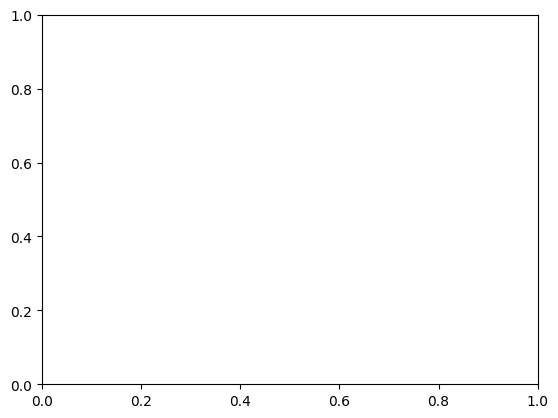

In [223]:
plt.figure(2)
plt.plot([10,100,1000], res[:,0], label="SWD")
plt.fill_between([10,100,1000], res[:,0] - 2 * res[:,1], res[:,0] + 2 * res[:,1], alpha=0.5)

plt.legend()
plt.xscale('log')

plt.xlabel("Number of projections")
plt.ylabel("Distance")
plt.title('Sliced Wasserstein Distance with 95% confidence inverval')

plt.show()

## Other

In [151]:
# Set random seed for reproducibility
np.random.seed(42)

# Define mean and covariance matrices
mean1 = np.random.randn(1000)
cov1 = np.random.randn(1000,1000)
mean2 = np.random.randn(1000)
cov2 = np.random.randn(1000,1000)

# Generate two MVN random samples with same mean and covariance
n_samples = 100000
sample1 = np.random.multivariate_normal(mean1, cov1, size=n_samples)
sample2 = np.random.multivariate_normal(mean2, cov2, size=n_samples)

/tmp/ipykernel_10662/2417459388.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  sample1 = np.random.multivariate_normal(mean1, cov1, size=n_samples)
/tmp/ipykernel_10662/2417459388.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  sample2 = np.random.multivariate_normal(mean2, cov2, size=n_samples)


In [152]:
from scipy.stats import wasserstein_distance
from timeit import default_timer as timer

In [155]:
start=timer()
res = np.mean([wasserstein_distance(sample1[:,0],sample2[:,0]),wasserstein_distance(sample1[:,1],sample2[:,1])])
end=timer()
print(res)
print("SWD computed in",end-start,"s.")

0.3611000457556382
SWD computed in 0.11974661500426009 s.


In [156]:
n_slices=[10,20,30,50,100]
means=[]
stds=[]
for i in n_slices:
    print("Computing SWD for",i,"slices")
    start=timer()
    swd=[sliced_Wasserstein_distance(sample1, sample2, norm=True, n_slices=i, p=1, seed=None) for k in range(10)]
    means.append(np.mean(swd))
    stds.append(np.std(swd))
    end=timer()
    print("SWD for",i,"slices computed in",end-start,"s.")

Computing SWD for 10 slices
SWD for 10 slices computed in 13.37087254099606 s.
Computing SWD for 20 slices
SWD for 20 slices computed in 28.011276363991783 s.
Computing SWD for 30 slices
SWD for 30 slices computed in 42.616360687999986 s.
Computing SWD for 50 slices
SWD for 50 slices computed in 69.60400968199247 s.
Computing SWD for 100 slices
SWD for 100 slices computed in 135.5928650309943 s.


In [157]:
means

[1.1240666444239884,
 1.178620028730426,
 1.0345398202687348,
 1.0856285500872462,
 1.1349826566549233]

In [158]:
stds

[0.2821306524675983,
 0.24819902027034105,
 0.13102079479750936,
 0.13262808573039866,
 0.10346581086159876]

## Likelihood fit

In [120]:
#def likelihood_uniform(measurements, uncertainties):
#    # Ensure that all measurements are within the interval [0,1]
#    if np.any(measurements < 0) or np.any(measurements > 1):
#        return 0
#    # Compute the likelihood assuming Gaussian uncertainties
#    likelihoods = (1/(np.sqrt(2*np.pi)*uncertainties)) * np.exp(-0.5 * ((measurements - 0.5) / uncertainties)**2)
#    # The total likelihood is the product of individual likelihoods
#    total_likelihood = np.prod(likelihoods)
#    return total_likelihood
#
#def neg_likelihood_uniform(measurements, uncertainties):
#    return -likelihood_uniform(measurements, uncertainties)
#
#def neg_log_likelihood_gaussian(mu, measurements, uncertainties=None):
#    n = len(measurements)
#    if uncertainties is None:    
#        log_likelihood = n*np.log(sigma * np.sqrt(2 * np.pi)) + np.sum((measurements - mu)**2 / (2 * sigma**2))
#    else:
#        log_likelihood = np.sum(np.log(uncertainties * np.sqrt(2 * np.pi)) + ((measurements - mu)**2 / (2 * uncertainties**2)))
#    return log_likelihood



#def gaussian(x, mu, sigma):
#    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x-mu)**2 / (2 * sigma**2))
#
#def weighted_sum_of_squared_differences(params, measurements, uncertainties):
#    mu, sigma = params
#    model_values = norm(loc=mu, scale=np.sqrt(sigma**2 + uncertainties**2)).pdf(measurements)
#    differences = measurements - model_values
#    weighted_squares = differences**2 / uncertainties**2
#    return np.sum(weighted_squares)

In [309]:
uncertainties = ks[:,1]
uncertainties

array([0.26999525, 0.22366441, 0.24493149, 0.20944349, 0.10945168,
       0.295335  , 0.23826307, 0.26175365, 0.30373726, 0.25307937])


Getting best estimates in 100 dimensions through maximum likelihood

-----------------------------------------------------------------------
CsplineN bijector
[1.08631315e-02 2.46483968e-03 1.31752658e-02 5.38419881e-03
 2.06448648e-02 1.95832645e-02 3.71541222e-02 1.75711316e-38
 1.66550282e-02 6.25728167e-03]
[4.61698666e-02 1.70797665e-02 4.65758785e-02 4.74896695e-02
 7.29379842e-02 6.88133990e-02 1.05225969e-01 3.06070358e-37
 5.44194565e-02 3.97474058e-02]
Point 8 is likely an outlier. Deleting it before estimating parameters.
[mean,std] excluding point 8 are [0.0146868885629205, 0.009955484504631013] .
Value of pount 8 is [1.7571131578913516e-38, 3.060703581877197e-37]


/tmp/ipykernel_50/1139947028.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


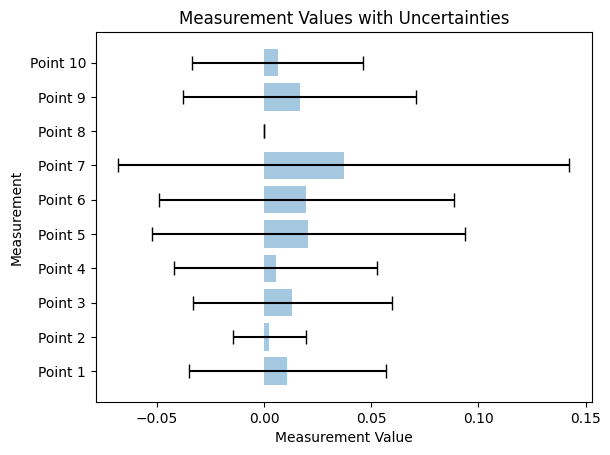

Measurements are compatible. Estimating weighted mean and std.
KS - initial guess:  [0.0146868885629205, 0.009955484504631013]
KS - WM mean estimate:  0.00686132986426756
KS - Sigma_syst estimate:  0.009955484504631013
KS - Sigma_stat estimate:  0.055384377287738186
KS - Sigma_wm estimate:  0.012637420952118046
-.-.-.-.-.-.-.-.
[0.12160115 0.13104592 0.11148076 0.21711406 0.0906318  0.09715026
 0.07501029 2.7012301  0.1030261  0.11925859]
[0.06756744 0.08252081 0.06422475 0.1374442  0.05103157 0.05847157
 0.03678527 1.61334041 0.06090794 0.06861688]
Point 8 is likely an outlier. Deleting it before estimating parameters.
[mean,std] excluding point 8 are [0.11847988195503673, 0.03844886170524288] .
Value of pount 8 is [2.7012300998313785, 1.6133404078332427]


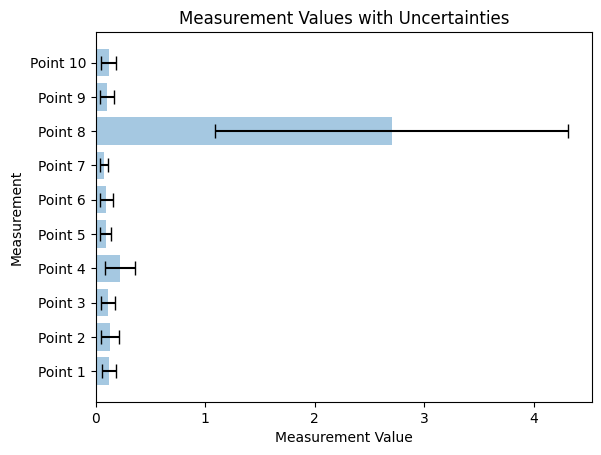

Measurements are compatible. Estimating weighted mean and std.
SWD - initial guess:  [0.11847988195503673, 0.03844886170524288]
SWD - WM mean estimate:  0.1001098105742256
SWD - Sigma_syst estimate:  0.03844886170524288
SWD - Sigma_stat estimate:  0.06973004937151255
SWD - Sigma_wm estimate:  0.01976923425387647
-.-.-.-.-.-.-.-.
[ 3.6177912   2.91910267  3.64655588  3.08639435  2.33717565  2.90541779
  2.10968715 60.19848202  2.14033934  3.60023727]
[0.46941172 0.29256796 0.48668806 0.23493972 0.2221166  0.43992106
 0.2990295  0.20045669 0.15976361 0.65916243]
Point 8 is likely an outlier. Deleting it before estimating parameters.
[mean,std] excluding point 8 are [2.929189033139579, 0.5877283228073377] .
Value of pount 8 is [60.19848201990244, 0.2004566949985247]


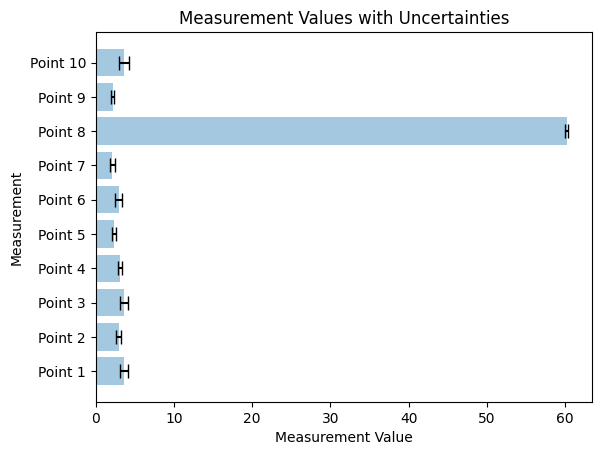

Measurements are compatible. Estimating weighted mean and std.
FN - initial guess:  [2.929189033139579, 0.5877283228073377]
FN - WM mean estimate:  2.5711841654949006
FN - Sigma_syst estimate:  0.5877283228073377
FN - Sigma_stat estimate:  0.3626222953999531
FN - Sigma_wm estimate:  0.09258490185984625
-.-.-.-.-.-.-.-.
Time - Best initial guess:  [3522.6134697787347, 424.4497409444365]
Time - Best MLE estimate:  3522.613470056274
Time - Sigma_tot estimate:  424.44974009309743


In [482]:
# This is our likelihood function
def neg_log_likelihood(params, measurements, uncertainties):
    mu, sigma = params
    #mu, log_sigma = params
    #sigma = np.exp(log_sigma)
    if uncertainties is not None:
        sigma_tot = np.sqrt(sigma**2+uncertainties**2)
    else:
        sigma_tot = sigma
    return np.sum(np.log(sigma_tot * np.sqrt(2 * np.pi)) + ((measurements - mu)**2 / (2 * sigma_tot**2)))

def plot_measurements(measurements,uncertainties):
    # Create y positions
    y_pos = range(len(measurements))
    # Create horizontal bars
    plt.barh(y_pos, measurements, xerr=uncertainties, align='center', alpha=0.4, ecolor='black', capsize=5)
    #Create names on the y-axis
    plt.yticks(y_pos, ['Point '+str(i) for i in range(1,len(measurements)+1)])
    plt.xlabel('Measurement Value')
    plt.ylabel('Measurement')
    plt.title('Measurement Values with Uncertainties')
    # Show graphic
    plt.show()

#def neg_log_likelihood_gaussian(params, measurements):
#    mu, sigma = params
#    #n = len(measurements)
#    #log_likelihood = n*np.log(sigma * np.sqrt(2 * np.pi)) + np.sum((measurements - mu)**2 / (2 * sigma**2))
#    return -np.sum(norm.logpdf(measurements, loc=mu, scale=sigma))
#    #return log_likelihood

# Now for the confidence interval, we find where the likelihood decreases by 0.5 from its maximum
#def tmu(mu, measurements, uncertainties):
#    initial_guess = np.mean(measurements)
#    result = minimize(neg_log_likelihood, initial_guess, args=(measurements, uncertainties))
#    mu_mle = result.x[0]
#    return 2*(neg_log_likelihood(mu, measurements, uncertainties)-neg_log_likelihood(mu_mle, measurements, uncertainties))
#
#def solve_high(x,mu_mle, measurements, uncertainties):
#    return tmu(mu_mle+x, measurements, uncertainties)-1
#    
#def solve_low(x,mu_mle, measurements, uncertainties):
#    return tmu(mu_mle-x, measurements, uncertainties)-1

for ndims in [100]:
    print("\n=======================================================================")
    print("Getting best estimates in",ndims,"dimensions through maximum likelihood")
    for bijector in ["CsplineN"]:
        print("\n-----------------------------------------------------------------------")
        print(bijector,"bijector")
        df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
        ### KS
        ks = df_reduced[["ks_mean","ks_std"]].to_numpy()
        measurements = ks[:,0]
        uncertainties = ks[:,1]
        print(measurements)
        print(uncertainties)
        to_delete=[]
        mean = np.mean(measurements)
        sigma_stat = np.mean(uncertainties)
        sigma_0 = np.std(measurements)
        for i in range(len(measurements)):
            m = np.delete(measurements,i)
            mean_not_i = np.mean(m)
            std_not_i = np.std(m)
            if measurements[i]<mean_not_i/10 or measurements[i]>10*mean_not_i:
                print("Point",i+1,"is likely an outlier. Deleting it before estimating parameters.")
                print("[mean,std] excluding point",i+1,"are",[mean_not_i,std_not_i],".")
                print("Value of pount",i+1,"is",[measurements[i],uncertainties[i]])
                to_delete.append(i)
        if to_delete != []:
            plot_measurements(measurements,uncertainties)
        measurements=np.delete(measurements,to_delete)
        uncertainties=np.delete(uncertainties,to_delete)
        mean = np.mean(measurements)
        sigma_stat = np.mean(uncertainties)
        sigma_0 = np.std(measurements)
        initial_guess = [mean, sigma_0]
        if sigma_0<=2*sigma_stat:
            # Weighted mean
            print("Measurements are compatible. Estimating weighted mean and std.")
            weights = 1/(uncertainties**2)
            mu_wm = np.dot(measurements,weights)/np.sum(weights)
            sigms_wm = 1/np.sqrt(np.sum(weights))
            print('KS - initial guess: ', initial_guess)
            print('KS - WM mean estimate: ', mu_wm)
            print('KS - Sigma_syst estimate: ', sigma_0)
            print('KS - Sigma_stat estimate: ', sigma_stat)
            print('KS - Sigma_wm estimate: ', sigms_wm)
            print('-.-.-.-.-.-.-.-.')
        else:
            print("Measurements are not compatible. Performing MLE of mean and std.")
            # ML estimate
            bounds = [(None, None), (1e-10, None)]  # bounds for mu and sigma
            result = minimize(neg_log_likelihood, initial_guess, args=(measurements, uncertainties),bounds=bounds, method='L-BFGS-B',options={"maxiter": 100000,"gtol":1e-12,"ftol":1e-12})
            mu_mle, sigma_syst = result.x
            sigma_tot_mle = np.sqrt(sigma_syst**2+sigma_stat**2)
            print('KS - Best initial guess: ', initial_guess)
            print('KS - Best MLE estimate: ', mu_mle)
            print('KS - Sigma_syst estimate: ', sigma_syst)
            print('KS - Sigma_stat estimate: ', sigma_stat)
            print('KS - Sigma_tot estimate: ', sigma_tot_mle)
            print('-.-.-.-.-.-.-.-.')
        ## SWD
        swd = df_reduced[["swd_mean","swd_std"]].to_numpy()
        measurements = swd[:,0]
        uncertainties = swd[:,1]
        print(measurements)
        print(uncertainties)
        to_delete=[]
        mean = np.mean(measurements)
        sigma_stat = np.mean(uncertainties)
        sigma_0 = np.std(measurements)
        for i in range(len(measurements)):
            m = np.delete(measurements,i)
            mean_not_i = np.mean(m)
            std_not_i = np.std(m)
            if measurements[i]<mean_not_i/10 or measurements[i]>10*mean_not_i:
                print("Point",i+1,"is likely an outlier. Deleting it before estimating parameters.")
                print("[mean,std] excluding point",i+1,"are",[mean_not_i,std_not_i],".")
                print("Value of pount",i+1,"is",[measurements[i],uncertainties[i]])
                to_delete.append(i)
        if to_delete != []:
            plot_measurements(measurements,uncertainties)
        measurements=np.delete(measurements,to_delete)
        uncertainties=np.delete(uncertainties,to_delete)
        mean = np.mean(measurements)
        sigma_stat = np.mean(uncertainties)
        sigma_0 = np.std(measurements)
        initial_guess = [mean, sigma_0]
        if sigma_0<=2*sigma_stat:
            # Weighted mean
            print("Measurements are compatible. Estimating weighted mean and std.")
            weights = 1/(uncertainties**2)
            mu_wm = np.dot(measurements,weights)/np.sum(weights)
            sigms_wm = 1/np.sqrt(np.sum(weights))
            print('SWD - initial guess: ', initial_guess)
            print('SWD - WM mean estimate: ', mu_wm)
            print('SWD - Sigma_syst estimate: ', sigma_0)
            print('SWD - Sigma_stat estimate: ', sigma_stat)
            print('SWD - Sigma_wm estimate: ', sigms_wm)
            print('-.-.-.-.-.-.-.-.')
        else:
            print("Measurements are not compatible. Performing MLE of mean and std.")
            # ML estimate
            bounds = [(None, None), (1e-10, None)]  # bounds for mu and sigma
            result = minimize(neg_log_likelihood, initial_guess, args=(measurements, uncertainties),bounds=bounds, method='L-BFGS-B',options={"maxiter": 100000,"gtol":1e-12,"ftol":1e-12})
            mu_mle, sigma_syst = result.x
            sigma_tot_mle = np.sqrt(sigma_syst**2+sigma_stat**2)
            print('SWD - Best initial guess: ', initial_guess)
            print('SWD - Best MLE estimate: ', mu_mle)
            print('SWD - Sigma_syst estimate: ', sigma_syst)
            print('SWD - Sigma_stat estimate: ', sigma_stat)
            print('SWD - Sigma_tot estimate: ', sigma_tot_mle)
            print('-.-.-.-.-.-.-.-.')
        ### FN
        fn = df_reduced[["fn_mean","fn_std"]].to_numpy()
        measurements = fn[:,0]
        uncertainties = fn[:,1]
        print(measurements)
        print(uncertainties)
        to_delete=[]
        mean = np.mean(measurements)
        sigma_stat = np.mean(uncertainties)
        sigma_0 = np.std(measurements)
        for i in range(len(measurements)):
            m = np.delete(measurements,i)
            mean_not_i = np.mean(m)
            std_not_i = np.std(m)
            if measurements[i]<mean_not_i/10 or measurements[i]>10*mean_not_i:
                print("Point",i+1,"is likely an outlier. Deleting it before estimating parameters.")
                print("[mean,std] excluding point",i+1,"are",[mean_not_i,std_not_i],".")
                print("Value of pount",i+1,"is",[measurements[i],uncertainties[i]])
                to_delete.append(i)
        if to_delete != []:
            plot_measurements(measurements,uncertainties)
        measurements=np.delete(measurements,to_delete)
        uncertainties=np.delete(uncertainties,to_delete)
        mean = np.mean(measurements)
        sigma_stat = np.mean(uncertainties)
        sigma_0 = np.std(measurements)
        initial_guess = [mean, sigma_0]
        if sigma_0<=2*sigma_stat:
            # Weighted mean
            print("Measurements are compatible. Estimating weighted mean and std.")
            weights = 1/(uncertainties**2)
            mu_wm = np.dot(measurements,weights)/np.sum(weights)
            sigms_wm = 1/np.sqrt(np.sum(weights))
            print('FN - initial guess: ', initial_guess)
            print('FN - WM mean estimate: ', mu_wm)
            print('FN - Sigma_syst estimate: ', sigma_0)
            print('FN - Sigma_stat estimate: ', sigma_stat)
            print('FN - Sigma_wm estimate: ', sigms_wm)
            print('-.-.-.-.-.-.-.-.')
        else:
            print("Measurements are not compatible. Performing MLE of mean and std.")
            # ML estimate
            bounds = [(None, None), (1e-10, None)]  # bounds for mu and sigma
            result = minimize(neg_log_likelihood, initial_guess, args=(measurements, uncertainties),bounds=bounds, method='L-BFGS-B',options={"maxiter": 100000,"gtol":1e-12,"ftol":1e-12})
            mu_mle, sigma_syst = result.x
            sigma_tot_mle = np.sqrt(sigma_syst**2+sigma_stat**2)
            print('FN - Best initial guess: ', initial_guess)
            print('FN - Best MLE estimate: ', mu_mle)
            print('FN - Sigma_syst estimate: ', sigma_syst)
            print('FN - Sigma_stat estimate: ', sigma_stat)
            print('FN - Sigma_tot estimate: ', sigma_tot_mle)
            print('-.-.-.-.-.-.-.-.')
        ### TIME
        time = df_reduced["time"].to_numpy()
        measurements = time
        uncertainties = None
        mean = np.mean(measurements)
        sigma_0 = np.std(measurements)
        initial_guess = [mean, sigma_0]
        result = minimize(neg_log_likelihood, initial_guess, args=(measurements, None),method='Powell')
        mu_mle = result.x[0]
        sigma_tot_mle = result.x[1]
        print('Time - Best initial guess: ', initial_guess)
        print('Time - Best MLE estimate: ', mu_mle)
        print('Time - Sigma_tot estimate: ', sigma_tot_mle)

In [440]:
measurements

array([1.08631315e-02, 2.46483968e-03, 1.31752658e-02, 5.38419881e-03,
       2.06448648e-02, 1.95832645e-02, 3.71541222e-02, 1.75711316e-38,
       1.66550282e-02, 6.25728167e-03])

In [449]:
from scipy import stats
# Calculate z-scores
z_scores = np.abs(stats.zscore(measurements))

# Chose a threshold
threshold = 0.01

# Find outliers
outliers = measurements[z_scores > threshold]

print("Outliers: ", z_scores)

Outliers:  [0.22597518 1.03181403 0.00411962 0.75169361 0.71260863 0.61074521
 2.29671661 1.26832207 0.32977301 0.66791894]


In [407]:
[measurements, uncertainties]

[array([0.12160115, 0.13104592, 0.11148076, 0.21711406, 0.0906318 ,
        0.09715026, 0.07501029, 0.1030261 , 0.11925859]),
 array([0.06756744, 0.08252081, 0.06422475, 0.1374442 , 0.05103157,
        0.05847157, 0.03678527, 0.06090794, 0.06861688])]

In [350]:
print(neg_log_likelihood([0.028,0],measurements,uncertainties),neg_log_likelihood([0.028,0.001],measurements,uncertainties))

-33.09130639304707 -33.045457251811186


In [417]:
measurements

array([3293.8100225 , 3327.77013644, 3634.90744427, 3354.08085802,
       3525.71747086, 3908.77780004, 3800.7869425 , 2494.55528361,
       3813.23137209, 4072.49736745])

In [425]:
['Measurement '+str(i) for i in range(1,len(measurements)+1)]

['Measurement 1',
 'Measurement 2',
 'Measurement 3',
 'Measurement 4',
 'Measurement 5',
 'Measurement 6',
 'Measurement 7',
 'Measurement 8',
 'Measurement 9',
 'Measurement 10']

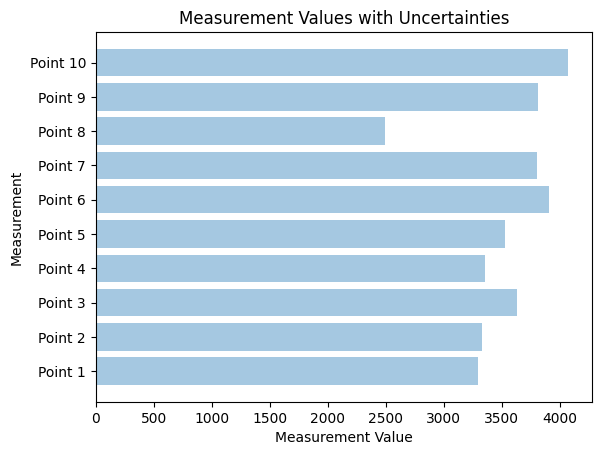

In [427]:
def plot_measurements(measurements,uncertainties):
    # Create y positions
    y_pos = range(len(measurements))
    # Create horizontal bars
    plt.barh(y_pos, measurements, xerr=uncertainties, align='center', alpha=0.4, ecolor='black', capsize=5)
    #Create names on the y-axis
    plt.yticks(y_pos, ['Point '+str(i) for i in range(1,len(measurements)+1)])
    plt.xlabel('Measurement Value')
    plt.ylabel('Measurement')
    plt.title('Measurement Values with Uncertainties')
    # Show graphic
    plt.show()

In [481]:
ndims=4
bijector = "MAFN"
df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
### Check for outliers
to_delete=[]
ks = df_reduced[["ks_mean","ks_std"]].to_numpy()
measurements = ks[:,0]
uncertainties = ks[:,1]
print(measurements,uncertainties)

[0.28561654 0.48163636 0.57410869 0.20632799 0.12295968 0.36141184
 0.60336069 0.32436373 0.47867247 0.43143097] [0.26999525 0.22366441 0.24493149 0.20944349 0.10945168 0.295335
 0.23826307 0.26175365 0.30373726 0.25307937]


/tmp/ipykernel_50/2162307296.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


In [485]:
def neg_log_likelihood(params, measurements, uncertainties=None):
    mu, sigma = params
    #mu, log_sigma = params
    #sigma = np.exp(log_sigma)
    if uncertainties is not None:
        sigma_tot = np.sqrt(sigma**2+uncertainties**2)
    else:
        sigma_tot = sigma
    return np.sum(np.log(sigma_tot * np.sqrt(2 * np.pi)) + ((measurements - mu)**2 / (2 * sigma_tot**2)))


Getting best estimates in 4 dimensions through maximum likelihood

-----------------------------------------------------------------------
MAFN bijector

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
KS - Best initial guess:  [0.3869888971722256, 0.14777412878832172]
KS - Best MLE estimate:  0.32537776668041746
KS - Sigma_syst estimate:  0.07354727740834476
KS - Sigma_stat estimate:  0.24096546563066545
KS - Sigma_tot estimate:  0.2519395912531086
-.-.-.-.-.-.-.-.

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.0301333226607809, 0.006429830020876331]
SWD - WM mean estimate:  0.027295375923345532
SWD - Sigma_syst estimate:  0.006429830020876331
SWD - Sigma_stat estimate:  0.012954493745989431
SWD - Sigma_wm estimate:  0.003621917941988377
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
FN - initial guess:  [0.034605985

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


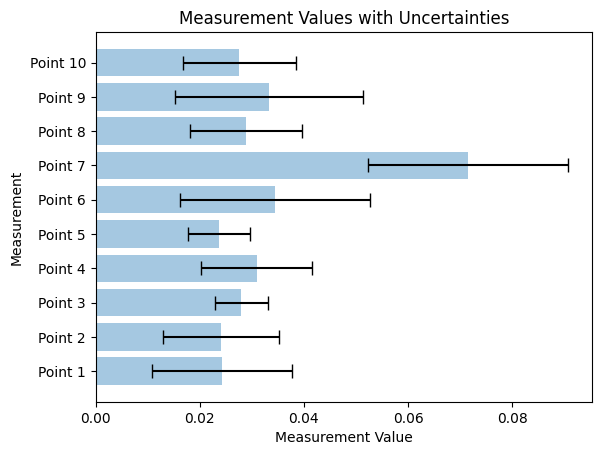


!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
KS - Best initial guess:  [0.41859226713137165, 0.1833850706144501]
KS - Best MLE estimate:  0.36601805266526904
KS - Sigma_syst estimate:  0.09590483574467447
KS - Sigma_stat estimate:  0.24010924693088923
KS - Sigma_tot estimate:  0.258554033000709
-.-.-.-.-.-.-.-.

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.027865349396874788, 0.006253191311235575]
SWD - WM mean estimate:  0.025252059379211232
SWD - Sigma_syst estimate:  0.006253191311235575
SWD - Sigma_stat estimate:  0.012216354910584433
SWD - Sigma_wm estimate:  0.0036928492031783338
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
FN - initial guess:  [0.02834344011332962, 0.0037353478958829884]
FN - WM mean estimate:  0.027059903942239165
FN - Sigma_syst estimate:  0.0037353478958829884
FN - Sigma_stat estimate:

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.3491085603835248, 0.08850258573556102]
KS - WM mean estimate:  0.3293265313031836
KS - Sigma_syst estimate:  0.08850258573556102
KS - Sigma_stat estimate:  0.2634426946485159
KS - Sigma_wm estimate:  0.08146653998359352
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.03993927070796754, 0.011500810117727642]
SWD - WM mean estimate:  0.03525840175539176
SWD - Sigma_syst estimate:  0.011500810117727642
SWD - Sigma_stat estimate:  0.024371829976978232
SWD - Sigma_wm estimate:  0.0066688942381738225
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
FN - initial guess:  [0.06512553414472928, 0.01253798669165739]
FN - WM mean estimate:  0.06779366932759126
FN - Sigma_syst estimate:  0.01253798669165739
FN - Sigma_stat estimate:  0.021662617470930713
FN - Sigma_wm es

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


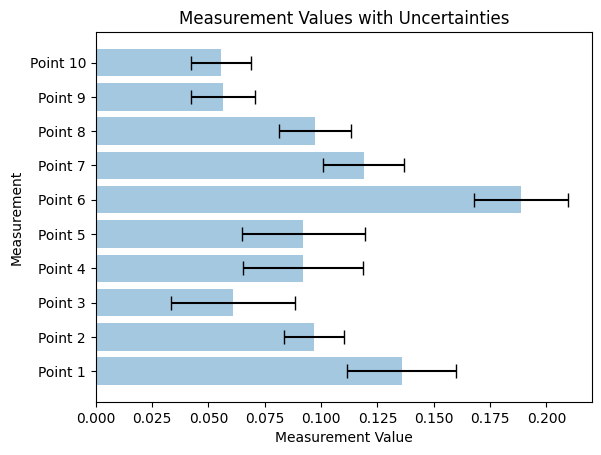

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.23617746087852337, 0.0703188768915547]
KS - WM mean estimate:  0.21601006697272865
KS - Sigma_syst estimate:  0.0703188768915547
KS - Sigma_stat estimate:  0.2310707217590708
KS - Sigma_wm estimate:  0.07447295897369753
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.04202302401412688, 0.00731387624923725]
SWD - WM mean estimate:  0.04005176788328094
SWD - Sigma_syst estimate:  0.00731387624923725
SWD - Sigma_stat estimate:  0.022997247692041367
SWD - Sigma_wm estimate:  0.007374582861117295
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [0.08952955435257623, 0.026210631496341695]
FN - Best MLE estimate:  0.0875192624780629
FN - Sigma_syst estimate:  0.019146320154013383
FN - Sigma_stat estimate:  0.0199795

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.3290293224637762, 0.08142351692054382]
KS - WM mean estimate:  0.2998587383014766
KS - Sigma_syst estimate:  0.08142351692054382
KS - Sigma_stat estimate:  0.26078834124512507
KS - Sigma_wm estimate:  0.07951581737667117
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.03611148703586569, 0.007060894791138982]
SWD - WM mean estimate:  0.03349828609079167
SWD - Sigma_syst estimate:  0.007060894791138982
SWD - Sigma_stat estimate:  0.020233834594876772
SWD - Sigma_wm estimate:  0.005925651724752074
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [1.1729822751438765, 0.24948970960531064]
FN - Best MLE estimate:  1.1769336460666606
FN - Sigma_syst estimate:  0.19478777835000158
FN - Sigma_stat estimate:  0.1661098

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


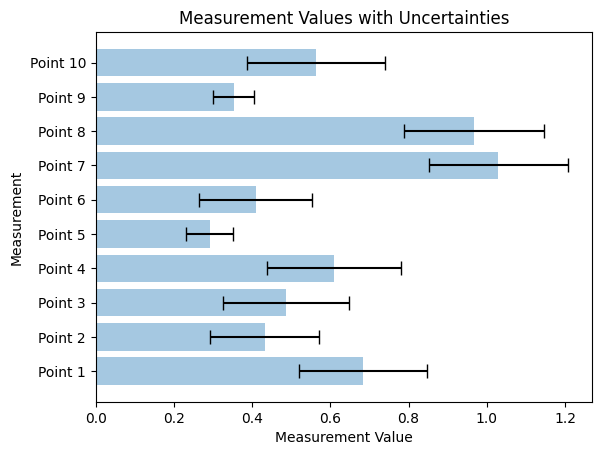

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.09864879316881511, 0.04911917474913033]
KS - WM mean estimate:  0.08361472533250555
KS - Sigma_syst estimate:  0.04911917474913033
KS - Sigma_stat estimate:  0.1837028920418181
KS - Sigma_wm estimate:  0.057976326788974575
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.04389268225169117, 0.00884052889266828]
SWD - WM mean estimate:  0.04108455932973563
SWD - Sigma_syst estimate:  0.00884052889266828
SWD - Sigma_stat estimate:  0.021758378246691287
SWD - Sigma_wm estimate:  0.006895745679696964
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [0.5325842474862614, 0.19366596710682912]
FN - Best MLE estimate:  0.48233804571156474
FN - Sigma_syst estimate:  0.1321845023704248
FN - Sigma_stat estimate:  0.1383210

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.05859554581413916, 0.0414778677977087]
KS - WM mean estimate:  0.012086822383063888
KS - Sigma_syst estimate:  0.0414778677977087
KS - Sigma_stat estimate:  0.13089846672284094
KS - Sigma_wm estimate:  0.01672843150497093
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.060141435113743126, 0.0177115502939214]
SWD - WM mean estimate:  0.051754110642305284
SWD - Sigma_syst estimate:  0.0177115502939214
SWD - Sigma_stat estimate:  0.031837472936718354
SWD - Sigma_wm estimate:  0.008469949225589643
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [0.7441053602133791, 0.20884966121013876]
FN - Best MLE estimate:  0.7194329792303544
FN - Sigma_syst estimate:  0.1902418904360511
FN - Sigma_stat estimate:  0.130247663

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


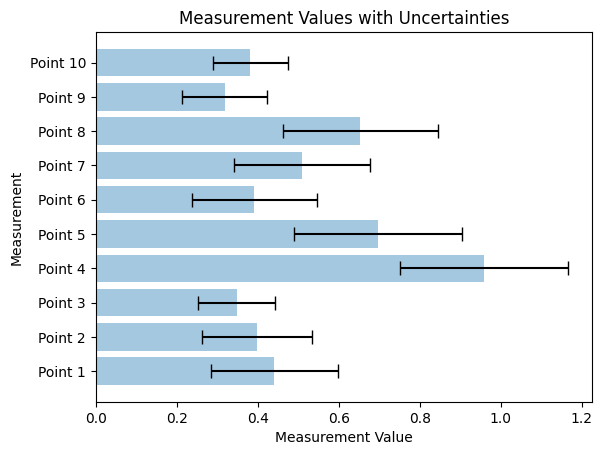

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.25884428946592897, 0.04237679660326585]
KS - WM mean estimate:  0.2522593457504476
KS - Sigma_syst estimate:  0.04237679660326585
KS - Sigma_stat estimate:  0.26364614981635026
KS - Sigma_wm estimate:  0.08699227689572019
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.03728974844623011, 0.00598264137059088]
SWD - WM mean estimate:  0.0354802196061858
SWD - Sigma_syst estimate:  0.00598264137059088
SWD - Sigma_stat estimate:  0.020383013644753593
SWD - Sigma_wm estimate:  0.006419194982053406
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
FN - initial guess:  [0.45982502521653956, 0.12601897097368986]
FN - WM mean estimate:  0.4064631478442869
FN - Sigma_syst estimate:  0.12601897097368986
FN - Sigma_stat estimate:  0.14509313300194476
FN - Sigma_wm estima

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.0552418217551115, 0.017138194332149366]
SWD - WM mean estimate:  0.04461810372273839
SWD - Sigma_syst estimate:  0.017138194332149366
SWD - Sigma_stat estimate:  0.02918846707026538
SWD - Sigma_wm estimate:  0.007698420602379498
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [0.7107492502894232, 0.2162932074371977]
FN - Best MLE estimate:  0.6852658393378751
FN - Sigma_syst estimate:  0.15997768662911127
FN - Sigma_stat estimate:  0.14557346317424774
FN - Sigma_tot estimate:  0.21629723391607714
-.-.-.-.-.-.-.-.

Time - Best initial guess:  [1276.1078770284075, 171.4523599156503]
Time - Best MLE estimate:  1276.1078810446365
Time - Sigma_tot estimate:  171.45235992699614

-----------------------------------------------------------------------
MsplineN bijector
MLE estimates neglig

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


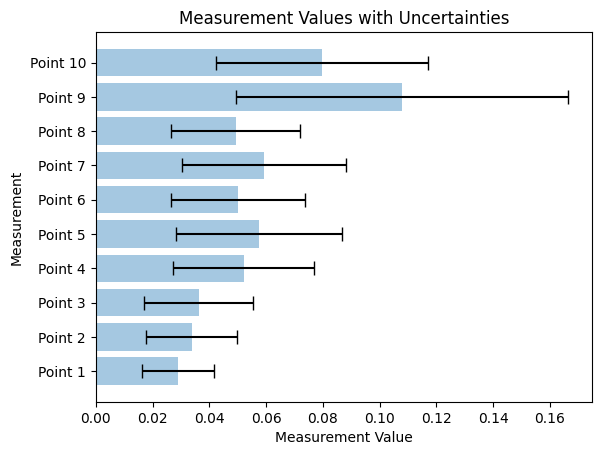

FN - Point 9 is likely an outlier. Deleting it before estimating parameters.
FN - [mean,std] excluding point 9 are [0.6987203093161778, 0.21653049810354053] .
FN - Value of pount 9 is [1.1465568123830432, 0.1041805277461543]
[0.39623539 0.49916907 0.45722096 0.72059061 0.91618039 0.64841993
 1.01936457 0.72756248 1.14655681 0.90373938]
[0.05004519 0.09203811 0.07032384 0.07857058 0.04504622 0.05224039
 0.07466901 0.04812896 0.10418053 0.06094408]


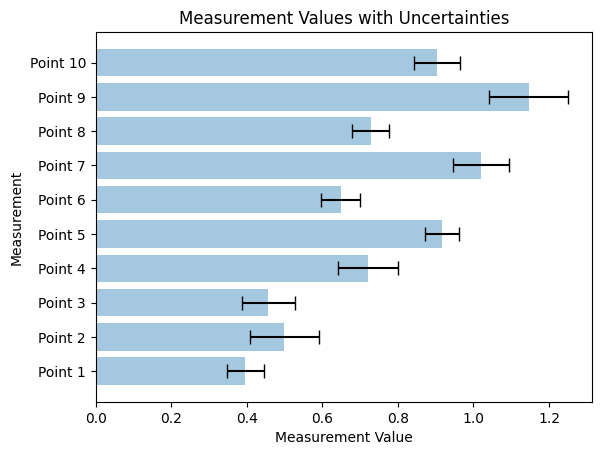

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.12792357356520084, 0.08966028135264019]
KS - WM mean estimate:  0.08293436868105536
KS - Sigma_syst estimate:  0.08966028135264019
KS - Sigma_stat estimate:  0.189666950730674
KS - Sigma_wm estimate:  0.05412298774321071
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.049658965017737866, 0.014616452837636967]
SWD - WM mean estimate:  0.041134786116411325
SWD - Sigma_syst estimate:  0.014616452837636967
SWD - Sigma_stat estimate:  0.023838166281558208
SWD - Sigma_wm estimate:  0.006855938932538669
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [0.6987203093161778, 0.2069928929029918]
FN - Best MLE estimate:  0.7000921774868623
FN - Sigma_syst estimate:  0.19620513053388025
FN - Sigma_stat estimate:  0.063556

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


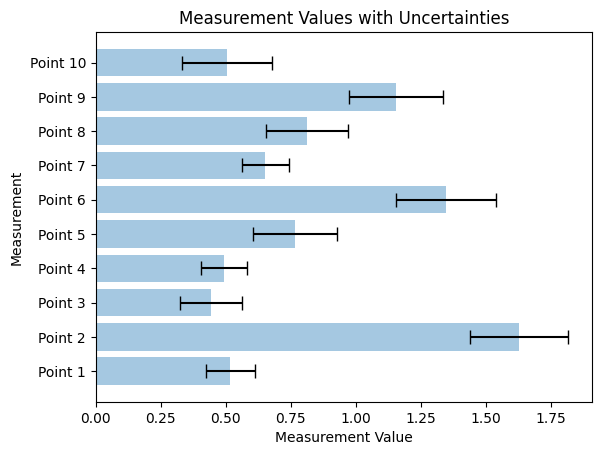

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.24809404977875704, 0.16262872983789506]
KS - WM mean estimate:  0.12209929018456347
KS - Sigma_syst estimate:  0.16262872983789506
KS - Sigma_stat estimate:  0.22481688441779404
KS - Sigma_wm estimate:  0.05808612453624294
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.05616684363069554, 0.026948916360134755]
SWD - WM mean estimate:  0.03954632632831016
SWD - Sigma_syst estimate:  0.026948916360134755
SWD - Sigma_stat estimate:  0.03649640607401239
SWD - Sigma_wm estimate:  0.008887531670336898
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [0.7430238129845492, 0.2995142257591685]
FN - Best MLE estimate:  0.7115475530967551
FN - Sigma_syst estimate:  0.23069600852047192
FN - Sigma_stat estimate:  0.1396463

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


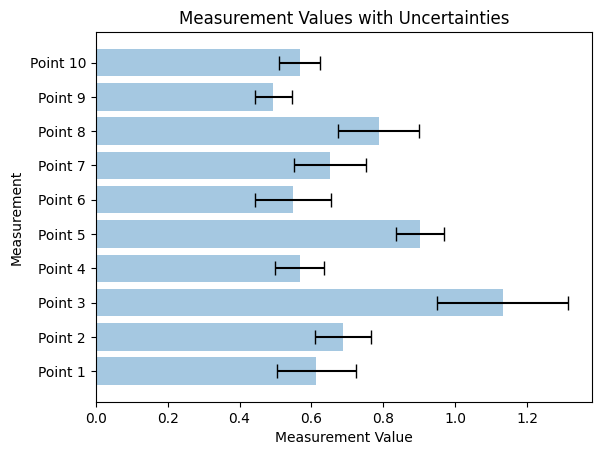

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.22885101094450455, 0.05278050631793715]
KS - WM mean estimate:  0.21655142430089702
KS - Sigma_syst estimate:  0.05278050631793715
KS - Sigma_stat estimate:  0.25578976900708894
KS - Sigma_wm estimate:  0.08369393543124849
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.04121795476226913, 0.007961694002565661]
SWD - WM mean estimate:  0.0383402197954355
SWD - Sigma_syst estimate:  0.007961694002565661
SWD - Sigma_stat estimate:  0.02274001024594529
SWD - Sigma_wm estimate:  0.007074901529422531
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [0.6466565284316198, 0.12159365922649709]
FN - Best MLE estimate:  0.6416261387656609
FN - Sigma_syst estimate:  0.10527594247624285
FN - Sigma_stat estimate:  0.0833146

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


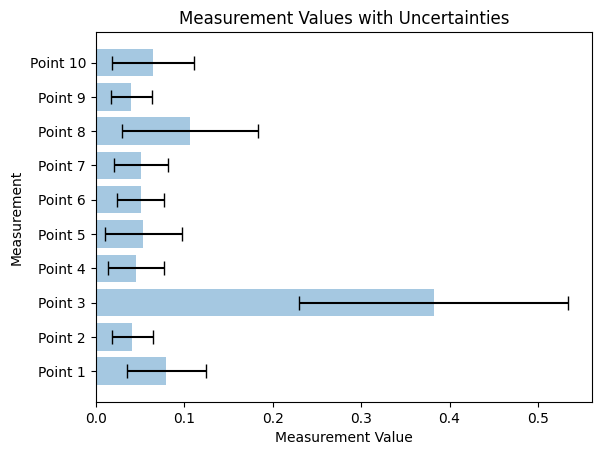

FN - Point 3 is likely an outlier. Deleting it before estimating parameters.
FN - [mean,std] excluding point 3 are [0.9125272158257395, 0.2874438682813643] .
FN - Value of pount 3 is [10.049617163973789, 0.0486125348707233]
[ 1.30466749  0.68256793 10.04961716  0.61808963  1.11278584  0.79695542
  0.77378835  1.33458395  0.77760683  0.8116995 ]
[0.13456304 0.06807617 0.04861253 0.14855229 0.17760036 0.09240223
 0.12243435 0.2163402  0.07927195 0.201529  ]


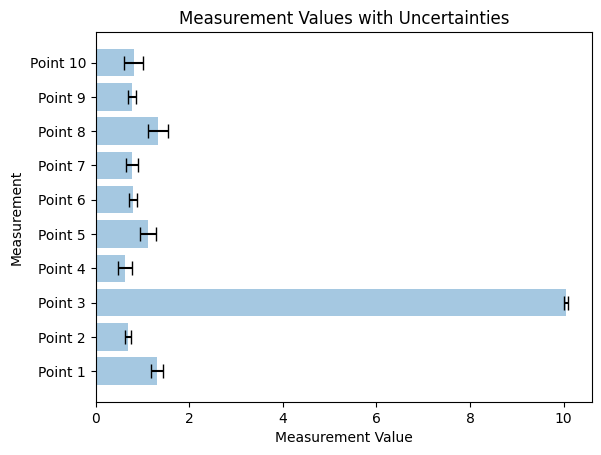

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.16438994416578823, 0.08275331308125326]
KS - WM mean estimate:  0.10158537652768537
KS - Sigma_syst estimate:  0.08275331308125326
KS - Sigma_stat estimate:  0.20650087475746154
KS - Sigma_wm estimate:  0.05738830784843734
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.05922807197402877, 0.020390481703250606]
SWD - WM mean estimate:  0.04950237862118624
SWD - Sigma_syst estimate:  0.020390481703250606
SWD - Sigma_stat estimate:  0.03866249330650022
SWD - Sigma_wm estimate:  0.01065657833519595
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [0.9125272158257395, 0.25222547654235533]
FN - Best MLE estimate:  0.8801577400396812
FN - Sigma_syst estimate:  0.1859932343154996
FN - Sigma_stat estimate:  0.13786328

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


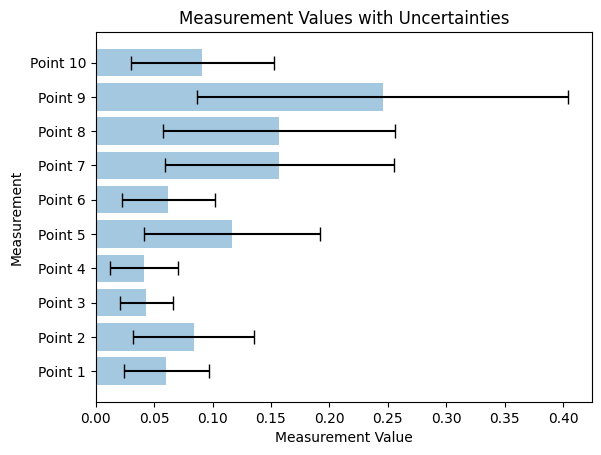

[2.22734854 2.97528863 1.31740242 1.10802382 1.59342631 1.2983582
 2.03779477 2.52512919 2.97811338 3.22963532]
[0.44637105 0.44919389 0.31845081 0.28827187 0.2247908  0.30800852
 0.29106551 0.57261577 0.30085551 0.70135432]


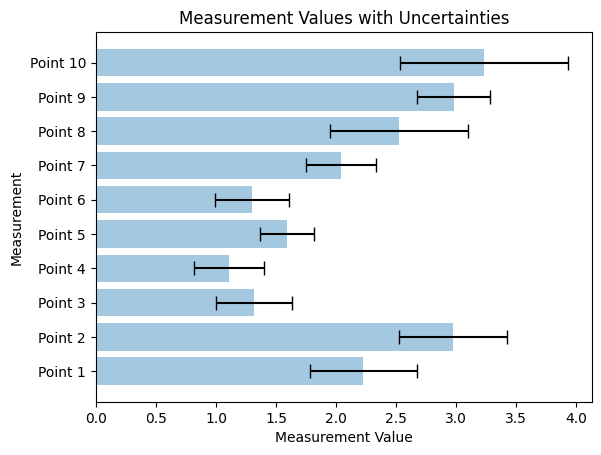

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.11101957104796742, 0.1010652683324179]
KS - WM mean estimate:  0.021369119100073095
KS - Sigma_syst estimate:  0.1010652683324179
KS - Sigma_stat estimate:  0.1510881945416397
KS - Sigma_wm estimate:  0.02466440186770332
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.09029816519813624, 0.04199165945158806]
SWD - WM mean estimate:  0.05924232520795157
SWD - Sigma_syst estimate:  0.04199165945158806
SWD - Sigma_stat estimate:  0.05721309825065492
SWD - Sigma_wm estimate:  0.013566038245810626
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [2.0347119126172344, 0.7226792355293835]
FN - Best MLE estimate:  1.8845020777674053
FN - Sigma_syst estimate:  0.5082489140560621
FN - Sigma_stat estimate:  0.400013616330

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


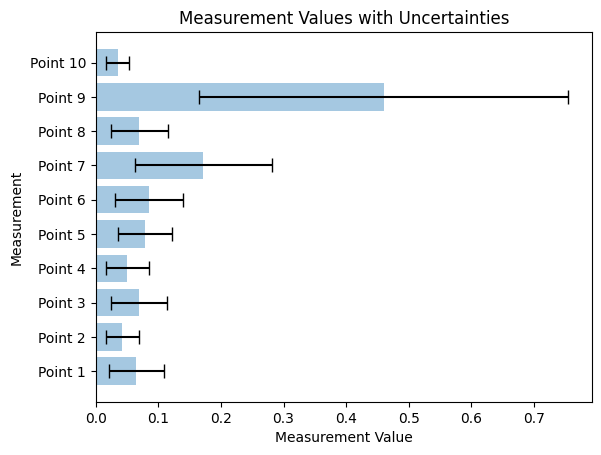

FN - Point 9 is likely an outlier. Deleting it before estimating parameters.
FN - [mean,std] excluding point 9 are [1.8674436292616146, 0.6660408811449797] .
FN - Value of pount 9 is [6.358633618958586, 0.3442868345629619]
[2.01071076 1.16278709 2.08281725 1.07298485 2.29545665 2.19884157
 2.70369447 2.20172121 6.35863362 1.07797881]
[0.43643881 0.31494737 0.44158625 0.1644861  0.31001059 0.40296004
 0.38973428 0.45383038 0.34428683 0.1900217 ]


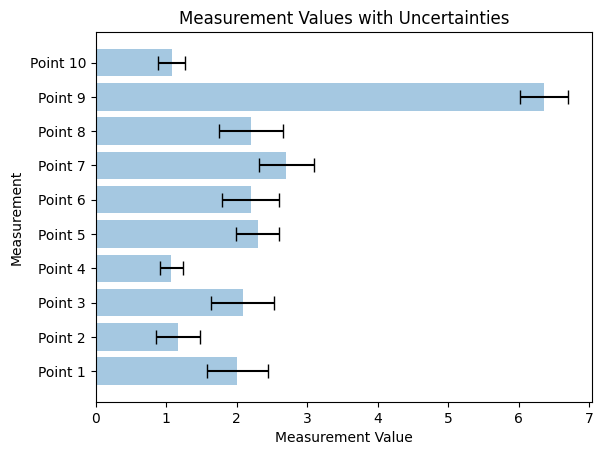

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.11936728302458881, 0.08655387252111715]
KS - WM mean estimate:  0.030835882570617673
KS - Sigma_syst estimate:  0.08655387252111715
KS - Sigma_stat estimate:  0.17531076721897698
KS - Sigma_wm estimate:  0.03172922858337546
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.07396342734250858, 0.0378784999505604]
SWD - WM mean estimate:  0.05133930363947254
SWD - Sigma_syst estimate:  0.0378784999505604
SWD - Sigma_stat estimate:  0.046752024603530666
SWD - Sigma_wm estimate:  0.011505795289587959
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [1.8674436292616146, 0.5697902417579873]
FN - Best MLE estimate:  1.790610444201325
FN - Sigma_syst estimate:  0.5171465408203045
FN - Sigma_stat estimate:  0.34489061418

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


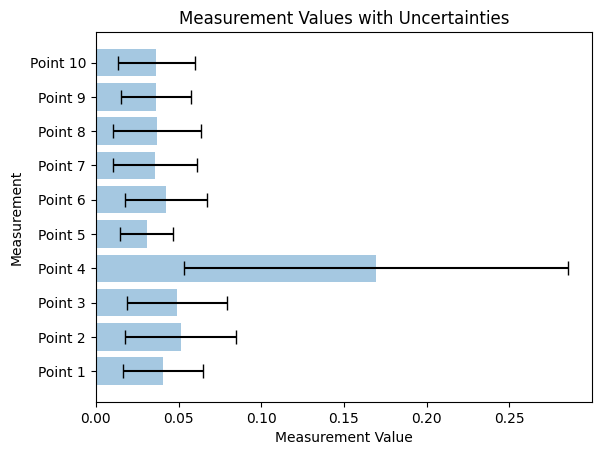

FN - Point 4 is likely an outlier. Deleting it before estimating parameters.
FN - [mean,std] excluding point 4 are [1.0623935818193937, 0.35819341527983917] .
FN - Value of pount 4 is [2.4378506041835943, 0.2489993571108877]
[1.25922018 1.43201635 1.47360341 2.4378506  0.793972   1.20694252
 0.78337843 0.81044484 0.92235961 0.87960491]
[0.36908958 0.42157306 0.34581734 0.24899936 0.14330528 0.27694407
 0.13507139 0.19856903 0.11291184 0.16622685]


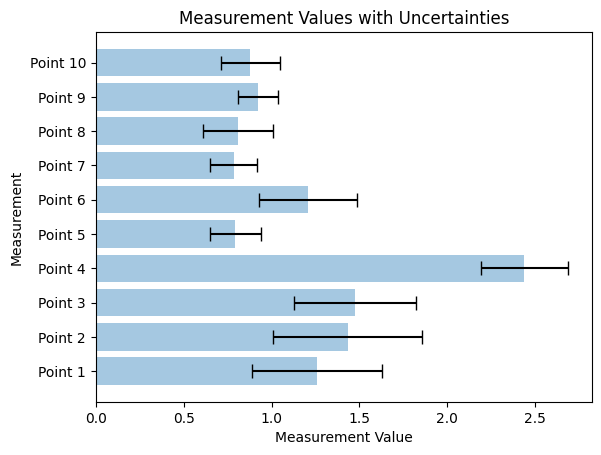

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.3336766851426667, 0.06176847540743108]
KS - WM mean estimate:  0.3270566903745362
KS - Sigma_syst estimate:  0.06176847540743108
KS - Sigma_stat estimate:  0.27439945595537946
KS - Sigma_wm estimate:  0.09095307834912207
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.040007229146544115, 0.006251753170466497]
SWD - WM mean estimate:  0.037779704682404894
SWD - Sigma_syst estimate:  0.006251753170466497
SWD - Sigma_stat estimate:  0.02501102128810022
SWD - Sigma_wm estimate:  0.007837269200784962
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
FN - initial guess:  [1.0623935818193937, 0.26494204924224884]
FN - WM mean estimate:  0.9058233883105353
FN - Sigma_syst estimate:  0.26494204924224884
FN - Sigma_stat estimate:  0.24105649398668583
FN - Sigma_wm esti

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


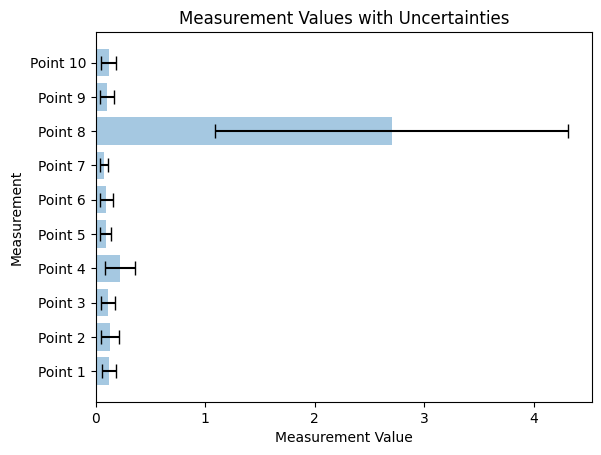

FN - Point 8 is likely an outlier. Deleting it before estimating parameters.
FN - [mean,std] excluding point 8 are [2.929189033139579, 0.6905935928974848] .
FN - Value of pount 8 is [60.19848201990244, 0.2004566949985247]
[ 3.6177912   2.91910267  3.64655588  3.08639435  2.33717565  2.90541779
  2.10968715 60.19848202  2.14033934  3.60023727]
[0.46941172 0.29256796 0.48668806 0.23493972 0.2221166  0.43992106
 0.2990295  0.20045669 0.15976361 0.65916243]


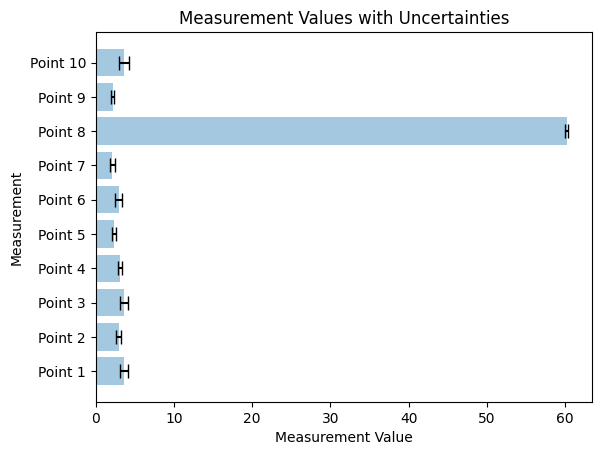

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.0146868885629205, 0.009955484504631013]
KS - WM mean estimate:  0.00686132986426756
KS - Sigma_syst estimate:  0.009955484504631013
KS - Sigma_stat estimate:  0.055384377287738186
KS - Sigma_wm estimate:  0.012637420952118046
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.11847988195503673, 0.03844886170524288]
SWD - WM mean estimate:  0.1001098105742256
SWD - Sigma_syst estimate:  0.03844886170524288
SWD - Sigma_stat estimate:  0.06973004937151255
SWD - Sigma_wm estimate:  0.01976923425387647
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [2.929189033139579, 0.5877283228073377]
FN - Best MLE estimate:  2.7925964267483647
FN - Sigma_syst estimate:  0.44793265533848725
FN - Sigma_stat estimate:  0.362622295

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


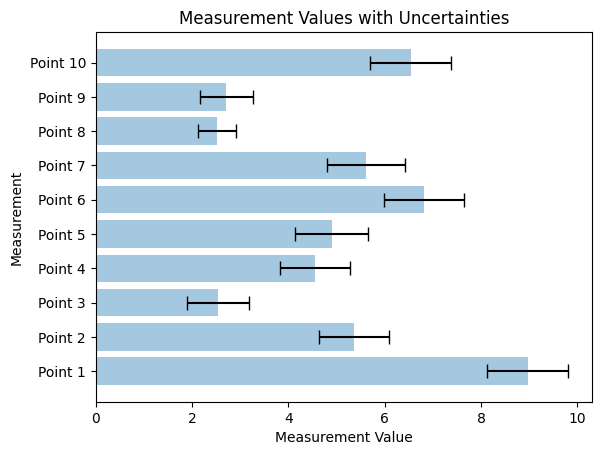

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.0671720773324316, 0.06843513651180426]
KS - WM mean estimate:  0.03326369037732142
KS - Sigma_syst estimate:  0.06843513651180426
KS - Sigma_stat estimate:  0.1346333758724384
KS - Sigma_wm estimate:  0.034340647716053045
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.0922152303256446, 0.022558879713914456]
SWD - WM mean estimate:  0.07334786480370122
SWD - Sigma_syst estimate:  0.022558879713914456
SWD - Sigma_stat estimate:  0.05926621034482747
SWD - Sigma_wm estimate:  0.016735875178097017
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [4.6169706566151865, 1.5853277530929268]
FN - Best MLE estimate:  4.515939364050351
FN - Sigma_syst estimate:  1.4494377380073515
FN - Sigma_stat estimate:  0.69659236684

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


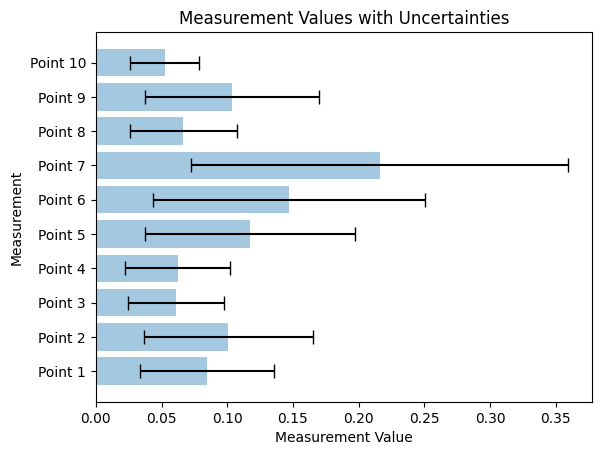

FN - Point 7 is likely an outlier. Deleting it before estimating parameters.
FN - [mean,std] excluding point 7 are [4.312911433812559, 1.5959423647980693] .
FN - Value of pount 7 is [18.52519214061784, 0.8398252899802074]
[ 4.10022639  3.59843714  3.62122028  2.45272853  7.50792006  4.03611585
 18.52519214  3.34202378  6.39324112  3.76428976]
[0.5003621  0.35842718 0.66937029 0.45943502 0.81162951 0.32107784
 0.83982529 0.65433253 0.78385734 0.25348078]


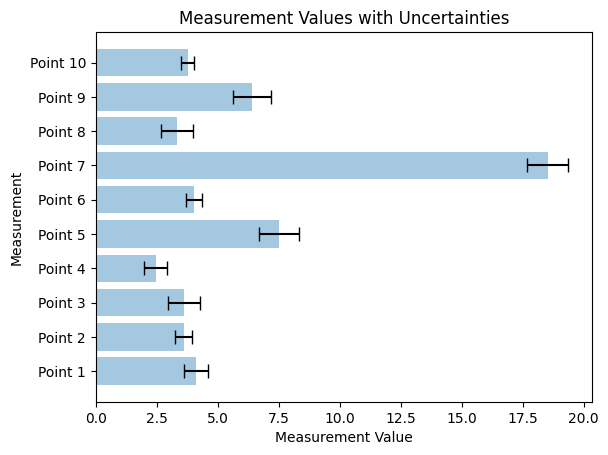

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.06001900703380763, 0.036322520080717464]
KS - WM mean estimate:  0.04200484361317226
KS - Sigma_syst estimate:  0.036322520080717464
KS - Sigma_stat estimate:  0.1337039110356823
KS - Sigma_wm estimate:  0.039629605154886956
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.0884566329775848, 0.029600437029223877]
SWD - WM mean estimate:  0.06916802529491033
SWD - Sigma_syst estimate:  0.029600437029223877
SWD - Sigma_stat estimate:  0.05641311121984586
SWD - Sigma_wm estimate:  0.014822534805293566
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [4.312911433812559, 1.5037176749721994]
FN - Best MLE estimate:  4.199310536815987
FN - Sigma_syst estimate:  1.2209023362189473
FN - Sigma_stat estimate:  0.534663619

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


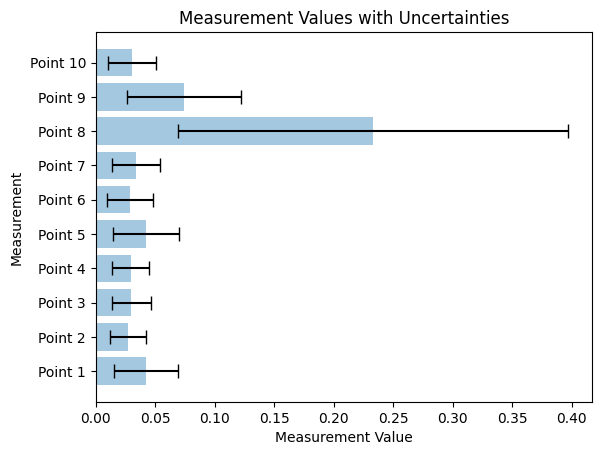

FN - Point 8 is likely an outlier. Deleting it before estimating parameters.
FN - [mean,std] excluding point 8 are [2.224950153524531, 0.9178593427942209] .
FN - Value of pount 8 is [6.411930142206792, 0.4264159540263177]
[1.87991001 1.65974745 1.56960864 1.78471655 3.30173011 1.88997511
 2.37985148 6.41193014 3.38830671 2.17070532]
[0.46486687 0.45269663 0.42208534 0.5715673  0.96082662 0.66597191
 0.79041668 0.42641595 0.82769387 0.74435566]


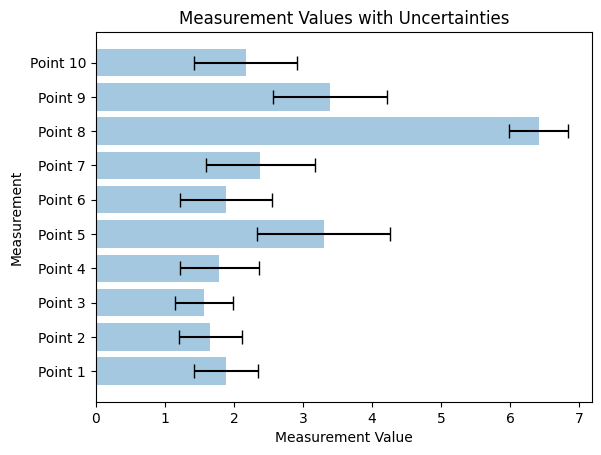

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.40770949916159344, 0.13617898986875354]
KS - WM mean estimate:  0.3413661205091595
KS - Sigma_syst estimate:  0.13617898986875354
KS - Sigma_stat estimate:  0.2690430809101
KS - Sigma_wm estimate:  0.0842817682021764
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.03746764452980385, 0.01402241377682074]
SWD - WM mean estimate:  0.031815807347340776
SWD - Sigma_syst estimate:  0.01402241377682074
SWD - Sigma_stat estimate:  0.023363114253624962
SWD - Sigma_wm estimate:  0.006624419323303574
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
FN - initial guess:  [2.224950153524531, 0.6423726575445206]
FN - WM mean estimate:  1.9550392132145642
FN - Sigma_syst estimate:  0.6423726575445206
FN - Sigma_stat estimate:  0.6556089855957048
FN - Sigma_wm estimate:  0.1

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
/home/rtorre/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rtorre/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rtorre/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/rtorre/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsa

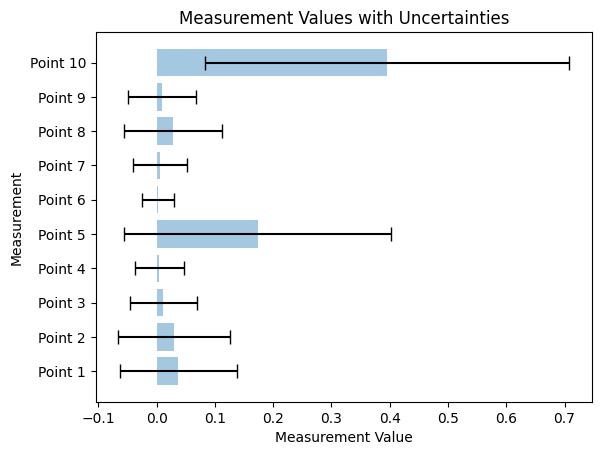

[0.08302342 0.09813457 0.13032919 0.22250496 0.04875051 0.2107764
 0.21636634 0.0918303  0.14480582 0.02622498]
[0.04395457 0.06066869 0.07995627 0.16080058 0.02573177 0.133216
 0.14048425 0.05029216 0.08788556 0.01473775]


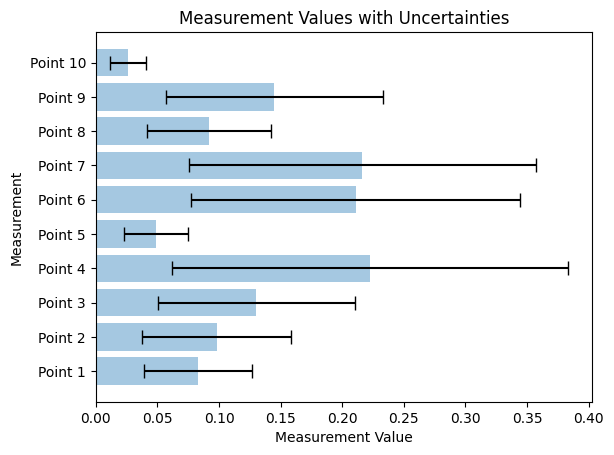

[58.31999934 31.23071785 55.52367376 11.54004905 20.35517011 49.68925489
 54.47120555 35.63296452 52.5658231  10.40033714]
[3.17377981 3.24068524 3.23792367 1.91645317 3.20716518 3.23243005
 3.18699686 3.2284535  3.1630378  0.56540003]


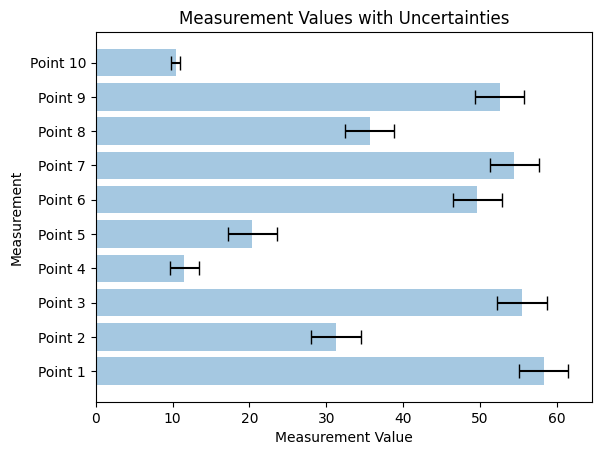

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.03354742052416585, 0.0507731439913863]
KS - WM mean estimate:  0.008708865587443703
KS - Sigma_syst estimate:  0.0507731439913863
KS - Sigma_stat estimate:  0.08228790327856754
KS - Sigma_wm estimate:  0.017358629113609445
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.13850238766944079, 0.06091018441869523]
SWD - WM mean estimate:  0.08000838635847918
SWD - Sigma_syst estimate:  0.06091018441869523
SWD - Sigma_stat estimate:  0.08699887212563422
SWD - Sigma_wm estimate:  0.017884179641134455
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [41.03653979542078, 16.055438361490086]
FN - Best MLE estimate:  40.955015560453226
FN - Sigma_syst estimate:  15.869307028273456
FN - Sigma_stat estimate:  3.06521392113

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
/home/rtorre/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rtorre/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rtorre/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype

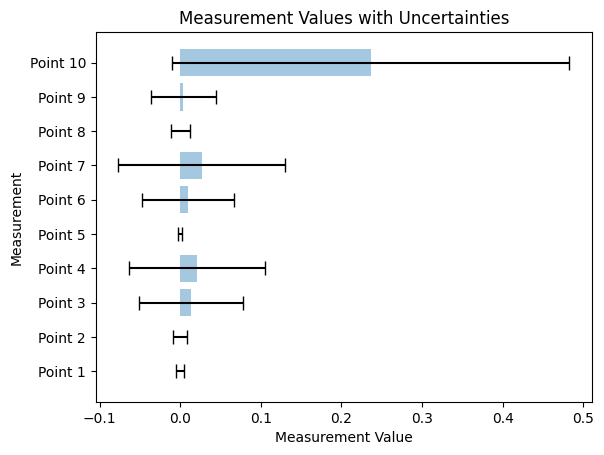

[0.41550221 0.5648001  0.11073752 0.12276484 0.57224781 0.12821176
 0.11773985 0.61314733 0.19853024 0.0449749 ]
[0.21545849 0.34521119 0.06344605 0.08130112 0.34155547 0.0677655
 0.08274337 0.35742901 0.11564182 0.02749993]


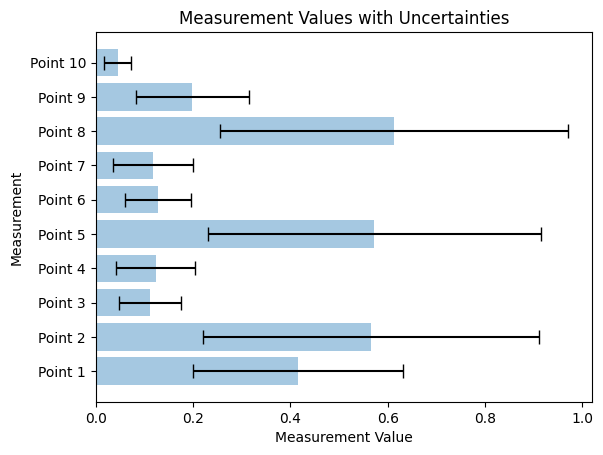

FN - Point 2 is likely an outlier. Deleting it before estimating parameters.
FN - [mean,std] excluding point 2 are [53.61466713867881, 29.782510912471796] .
FN - Value of pount 2 is [119.26004283954757, 4.820146078413915]
[ 87.92610025 119.26004284  25.19315668  37.67086211  98.56098357
  43.65681625  34.04741582  94.87492012  43.99341973  16.60832972]
[2.59361401 4.82014608 3.48238104 4.56178318 3.88131062 1.54946181
 4.71543027 1.22112231 2.19370825 2.13746767]


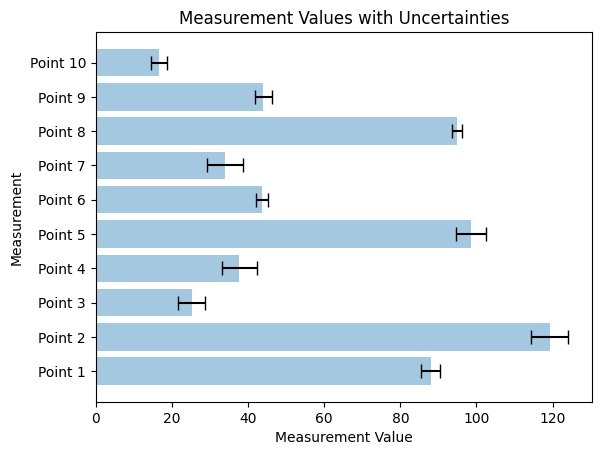

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.009371150127942382, 0.009615608888167709]
KS - WM mean estimate:  0.00012619724753948225
KS - Sigma_syst estimate:  0.009615608888167709
KS - Sigma_stat estimate:  0.04609503628852653
KS - Sigma_wm estimate:  0.001979340730158383
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.2848601943490499, 0.20122929380912982]
SWD - WM mean estimate:  0.1423107962219418
SWD - Sigma_syst estimate:  0.20122929380912982
SWD - Sigma_stat estimate:  0.16566760462377284
SWD - Sigma_wm estimate:  0.03378200289023952
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [58.240459316188215, 28.207406714957987]
FN - Best MLE estimate:  58.33560200083955
FN - Sigma_syst estimate:  28.01384859064962
FN - Sigma_stat estimate:  3.02485143

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


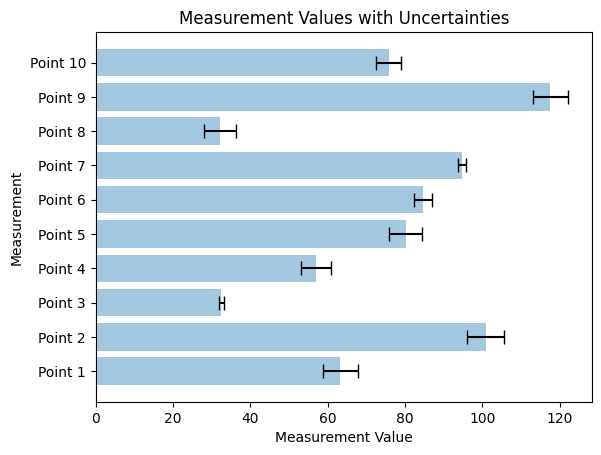

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.0026250470421468777, 0.0033212798724867993]
KS - WM mean estimate:  0.0005286983409926747
KS - Sigma_syst estimate:  0.0033212798724867993
KS - Sigma_stat estimate:  0.0238391988322685
KS - Sigma_wm estimate:  0.003785787001935111
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.265343004107572, 0.08763371120151861]
SWD - WM mean estimate:  0.18074041908145
SWD - Sigma_syst estimate:  0.08763371120151861
SWD - Sigma_stat estimate:  0.16628453604450147
SWD - Sigma_wm estimate:  0.04062221077888496
-.-.-.-.-.-.-.-.

!!!!!!!!!!!!!!!!!!!!!!!!!!
MLE estimates non-negligible systematic uncertainty. Combining uncertainties.
FN - Best initial guess:  [69.02927658471474, 23.482576675083077]
FN - Best MLE estimate:  68.99740150434236
FN - Sigma_syst estimate:  23.283842929334522
FN - Sigma_stat estimate:  3.1822507911

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])


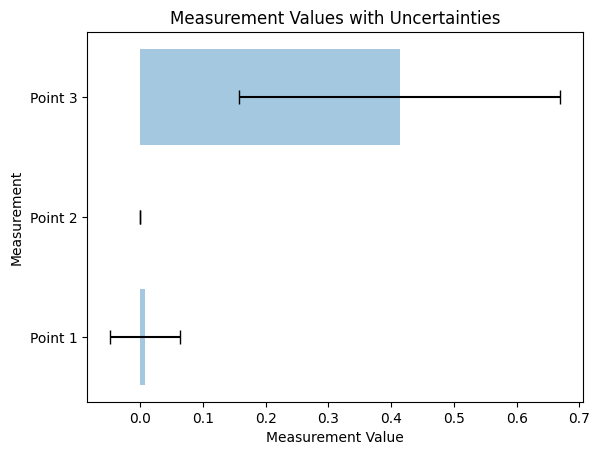

SWD - Point 2 is likely an outlier. Deleting it before estimating parameters.
SWD - [mean,std] excluding point 2 are [0.14172672412519924, 0.14493928652531368] .
SWD - Value of pount 2 is [0.5734698070933711, 0.3462809512451256]
[0.24612311 0.57346981 0.03733034]
[0.17990611 0.34628095 0.02117887]


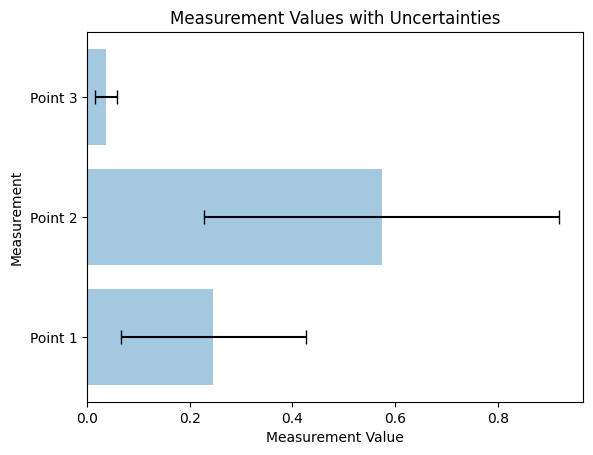

FN - Point 2 is likely an outlier. Deleting it before estimating parameters.
FN - [mean,std] excluding point 2 are [37.50661822411756, 28.391458277565874] .
FN - Value of pount 2 is [146.4766067153517, 3.1153937277947046]
FN - Point 3 is likely an outlier. Deleting it before estimating parameters.
FN - [mean,std] excluding point 3 are [106.14330290629252, 40.4463637990734] .
FN - Value of pount 3 is [9.203237351001754, 1.5404835131982682]
[ 65.8099991  146.47660672   9.20323735]
[2.92875995 3.11539373 1.54048351]


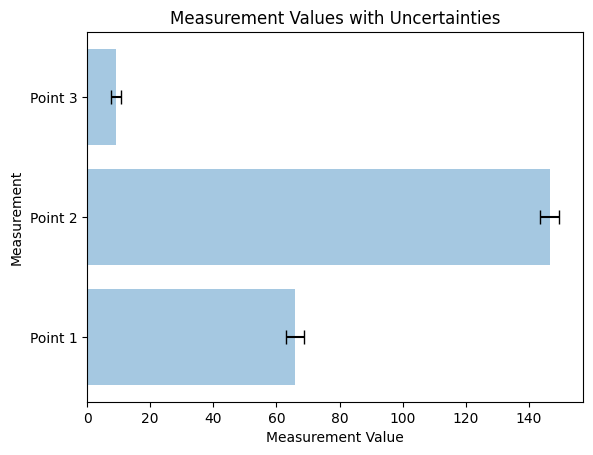

MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
KS - initial guess:  [0.0076200020892635, 0.0]
KS - WM mean estimate:  0.007620002089263501
KS - Sigma_syst estimate:  0.0
KS - Sigma_stat estimate:  0.0561502969160367
KS - Sigma_wm estimate:  0.0561502969160367
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
SWD - initial guess:  [0.2461231051407361, 0.0]
SWD - WM mean estimate:  0.2461231051407361
SWD - Sigma_syst estimate:  0.0
SWD - Sigma_stat estimate:  0.1799061068647828
SWD - Sigma_wm estimate:  0.1799061068647828
-.-.-.-.-.-.-.-.
MLE estimates negligible systematic uncertainty. Computing weighted mean and std.
FN - initial guess:  [65.80999909723336, 0.0]
FN - WM mean estimate:  65.80999909723336
FN - Sigma_syst estimate:  0.0
FN - Sigma_stat estimate:  2.928759947660111
FN - Sigma_wm estimate:  2.928759947660111
-.-.-.-.-.-.-.-.
Time - Best initial guess:  [16526.053427842293, 2611.3901383907255

/tmp/ipykernel_50/3470822963.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
/home/rtorre/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rtorre/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rtorre/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/rtorre/anaconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsa

In [494]:
outlier_threshold = 2
for ndims in [4,8,16,32,64,100,200,400,1000]:
    print("\n=======================================================================")
    print("Getting best estimates in",ndims,"dimensions through maximum likelihood")
    for bijector in ["MAFN","RealNVPN","MsplineN","CsplineN"]:
        print("\n-----------------------------------------------------------------------")
        print(bijector,"bijector")
        df_reduced = pd.DataFrame(df_correlated_unc[df_correlated_unc["ndims"]==ndims][df_correlated_unc["bijector"]==bijector])
        ### Check for outliers
        to_delete=[]
        ks = df_reduced[["ks_mean","ks_std"]].to_numpy()
        measurements = ks[:,0]
        uncertainties = ks[:,1]
        for i in range(len(measurements)):
            m = np.delete(measurements,i)
            u = np.delete(uncertainties,i)
            mean_not_i = np.mean(m)
            std_not_i = np.sqrt(np.std(m)**2+np.mean(u)**2)
            if measurements[i]>mean_not_i+outlier_threshold*std_not_i or measurements[i]<mean_not_i-outlier_threshold*std_not_i:
                print("KS - Point",i+1,"is likely an outlier. Deleting it before estimating parameters.")
                print("KS - [mean,std] excluding point",i+1,"are",[mean_not_i,std_not_i],".")
                print("KS - Value of pount",i+1,"is",[measurements[i],uncertainties[i]])
                to_delete.append(i)
        if to_delete != []:
            print(measurements)
            print(uncertainties)
            plot_measurements(measurements,uncertainties)
        to_delete = np.unique(to_delete).tolist()
        swd = df_reduced[["swd_mean","swd_std"]].to_numpy()
        measurements = swd[:,0]
        uncertainties = swd[:,1]
        for i in range(len(measurements)):
            m = np.delete(measurements,i)
            u = np.delete(uncertainties,i)
            mean_not_i = np.mean(m)
            std_not_i = np.sqrt(np.std(m)**2+np.mean(u)**2)
            if measurements[i]>mean_not_i+outlier_threshold*std_not_i or measurements[i]<mean_not_i-outlier_threshold*std_not_i:
                print("SWD - Point",i+1,"is likely an outlier. Deleting it before estimating parameters.")
                print("SWD - [mean,std] excluding point",i+1,"are",[mean_not_i,std_not_i],".")
                print("SWD - Value of pount",i+1,"is",[measurements[i],uncertainties[i]])
                to_delete.append(i)
        if to_delete != []:
            print(measurements)
            print(uncertainties)
            plot_measurements(measurements,uncertainties)
        to_delete = np.unique(to_delete).tolist()
        fn = df_reduced[["fn_mean","fn_std"]].to_numpy()
        measurements = fn[:,0]
        uncertainties = fn[:,1]
        for i in range(len(measurements)):
            m = np.delete(measurements,i)
            u = np.delete(uncertainties,i)
            mean_not_i = np.mean(m)
            std_not_i = np.sqrt(np.std(m)**2+np.mean(u)**2)
            if measurements[i]>mean_not_i+outlier_threshold*std_not_i or measurements[i]<mean_not_i-outlier_threshold*std_not_i:
                print("FN - Point",i+1,"is likely an outlier. Deleting it before estimating parameters.")
                print("FN - [mean,std] excluding point",i+1,"are",[mean_not_i,std_not_i],".")
                print("FN - Value of pount",i+1,"is",[measurements[i],uncertainties[i]])
                to_delete.append(i)
        if to_delete != []:
            print(measurements)
            print(uncertainties)
            plot_measurements(measurements,uncertainties)
        to_delete = np.unique(to_delete).tolist()
        ### KS
        ks = df_reduced[["ks_mean","ks_std"]].to_numpy()
        measurements = ks[:,0]
        uncertainties = ks[:,1]
        measurements=np.delete(measurements,to_delete)
        uncertainties=np.delete(uncertainties,to_delete)
        mean = np.mean(measurements)
        sigma_stat = np.mean(uncertainties)
        sigma_0 = np.std(measurements)
        initial_guess = [mean, sigma_0]
        result = minimize(neg_log_likelihood, initial_guess, args=(measurements, uncertainties), method='Powell',options={"maxiter": 100000,"xtol":1e-12,"ftol":1e-12})
        mu_mle, sigma_syst = result.x
        if sigma_syst<0.1*sigma_stat:
            print("MLE estimates negligible systematic uncertainty. Computing weighted mean and std.")
            weights = 1/(uncertainties**2)
            mu_wm = np.dot(measurements,weights)/np.sum(weights)
            sigms_wm = 1/np.sqrt(np.sum(weights))
            print('KS - initial guess: ', initial_guess)
            print('KS - WM mean estimate: ', mu_wm)
            print('KS - Sigma_syst estimate: ', sigma_0)
            print('KS - Sigma_stat estimate: ', sigma_stat)
            print('KS - Sigma_wm estimate: ', sigms_wm)
            print('-.-.-.-.-.-.-.-.')
        else:
            print("\n!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print("MLE estimates non-negligible systematic uncertainty. Combining uncertainties.")
            sigma_tot_mle = np.sqrt(sigma_syst**2+sigma_stat**2)
            print('KS - Best initial guess: ', initial_guess)
            print('KS - Best MLE estimate: ', mu_mle)
            print('KS - Sigma_syst estimate: ', sigma_syst)
            print('KS - Sigma_stat estimate: ', sigma_stat)
            print('KS - Sigma_tot estimate: ', sigma_tot_mle)
            print('-.-.-.-.-.-.-.-.\n')
        ## SWD
        swd = df_reduced[["swd_mean","swd_std"]].to_numpy()
        measurements = swd[:,0]
        uncertainties = swd[:,1]
        measurements=np.delete(measurements,to_delete)
        uncertainties=np.delete(uncertainties,to_delete)
        mean = np.mean(measurements)
        sigma_stat = np.mean(uncertainties)
        sigma_0 = np.std(measurements)
        initial_guess = [mean, sigma_0]
        result = minimize(neg_log_likelihood, initial_guess, args=(measurements, uncertainties), method='Powell',options={"maxiter": 100000,"xtol":1e-12,"ftol":1e-12})
        mu_mle, sigma_syst = result.x
        if sigma_syst<0.1*sigma_stat:
            print("MLE estimates negligible systematic uncertainty. Computing weighted mean and std.")
            weights = 1/(uncertainties**2)
            mu_wm = np.dot(measurements,weights)/np.sum(weights)
            sigms_wm = 1/np.sqrt(np.sum(weights))
            print('SWD - initial guess: ', initial_guess)
            print('SWD - WM mean estimate: ', mu_wm)
            print('SWD - Sigma_syst estimate: ', sigma_0)
            print('SWD - Sigma_stat estimate: ', sigma_stat)
            print('SWD - Sigma_wm estimate: ', sigms_wm)
            print('-.-.-.-.-.-.-.-.')
        else:
            print("\n!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print("MLE estimates non-negligible systematic uncertainty. Combining uncertainties.")
            sigma_tot_mle = np.sqrt(sigma_syst**2+sigma_stat**2)
            print('SWD - Best initial guess: ', initial_guess)
            print('SWD - Best MLE estimate: ', mu_mle)
            print('SWD - Sigma_syst estimate: ', sigma_syst)
            print('SWD - Sigma_stat estimate: ', sigma_stat)
            print('SWD - Sigma_tot estimate: ', sigma_tot_mle)
            print('-.-.-.-.-.-.-.-.\n')
        ### FN
        fn = df_reduced[["fn_mean","fn_std"]].to_numpy()
        measurements = fn[:,0]
        uncertainties = fn[:,1]
        measurements=np.delete(measurements,to_delete)
        uncertainties=np.delete(uncertainties,to_delete)
        mean = np.mean(measurements)
        sigma_stat = np.mean(uncertainties)
        sigma_0 = np.std(measurements)
        initial_guess = [mean, sigma_0]
        result = minimize(neg_log_likelihood, initial_guess, args=(measurements, uncertainties), method='Powell',options={"maxiter": 100000,"xtol":1e-12,"ftol":1e-12})
        mu_mle, sigma_syst = result.x
        if sigma_syst<0.1*sigma_stat:
            print("MLE estimates negligible systematic uncertainty. Computing weighted mean and std.")
            weights = 1/(uncertainties**2)
            mu_wm = np.dot(measurements,weights)/np.sum(weights)
            sigms_wm = 1/np.sqrt(np.sum(weights))
            print('FN - initial guess: ', initial_guess)
            print('FN - WM mean estimate: ', mu_wm)
            print('FN - Sigma_syst estimate: ', sigma_0)
            print('FN - Sigma_stat estimate: ', sigma_stat)
            print('FN - Sigma_wm estimate: ', sigms_wm)
            print('-.-.-.-.-.-.-.-.')
        else:
            print("\n!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print("MLE estimates non-negligible systematic uncertainty. Combining uncertainties.")
            sigma_tot_mle = np.sqrt(sigma_syst**2+sigma_stat**2)
            print('FN - Best initial guess: ', initial_guess)
            print('FN - Best MLE estimate: ', mu_mle)
            print('FN - Sigma_syst estimate: ', sigma_syst)
            print('FN - Sigma_stat estimate: ', sigma_stat)
            print('FN - Sigma_tot estimate: ', sigma_tot_mle)
            print('-.-.-.-.-.-.-.-.\n')
        ### TIME
        time = df_reduced["time"].to_numpy()
        measurements = time
        uncertainties = None
        mean = np.mean(measurements)
        sigma_0 = np.std(measurements)
        initial_guess = [mean, sigma_0]
        result = minimize(neg_log_likelihood, initial_guess, args=(measurements, None),method='Powell')
        mu_mle = result.x[0]
        sigma_tot_mle = result.x[1]
        print('Time - Best initial guess: ', initial_guess)
        print('Time - Best MLE estimate: ', mu_mle)
        print('Time - Sigma_tot estimate: ', sigma_tot_mle)

SWD - Maximum Likelihood Estimation (MLE):  0.0301333226607809
SWD - 1sigma uncertainty:  0.006429830020876331


FN - Maximum Likelihood Estimation (MLE):  0.03460598506848076
FN - 1sigma uncertainty:  0.011350725370580572


## Global metrics

In [495]:
def recompute_metrics(run):
    print("Recomputing metrics for run",run.replace("results.txt",""),".")
    start_all=timer()
    tmp = pd.read_csv(run)
    X_data_nf = np.load(run.replace("results.txt","nf_sample.npy"))
    np.shape(X_data_nf)
    run_n=int(tmp["run_n"])
    run_seed=int(tmp["run_seed"])
    ndims=int(tmp["ndims"])
    nsamples=int(tmp["nsamples"])
    correlation=str(tmp["correlation"][0])
    nbijectors=int(tmp["nbijectors"])
    bijector=str(tmp["bijector"][0])
    activation=str(tmp["activation"][0])
    spline_knots=int(tmp["spline_knots"])
    range_min=int(tmp["range_min"])
    eps_regulariser=tmp["eps_regulariser"][0]
    regulariser=tmp["regulariser"][0]
    hidden_layers=str(tmp["hidden_layers"][0])
    batch_size=int(tmp["batch_size"])
    epochs_input=int(tmp["epochs_input"])
    epochs_output=int(tmp["epochs_output"])
    time=tmp["time"][0]
    ncomp=3
    ntest_samples=nsamples
    seed_dist = 0
    seed_test = 0
    targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    X_data_test=targ_dist.sample(ntest_samples,seed=seed_test).numpy().astype("float32")
    start=timer()
    ks_mean,ks_std,ks_list,ad_mean,ad_std,ad_list,wd_mean,wd_std,wd_list,swd_mean,swd_std,swd_list,fn_mean,fn_std,fn_list=Metrics.ComputeMetrics(X_data_test,X_data_nf)
    results_dict = {'run_n': [run_n],
                    'run_seed': [run_seed],
                    'ndims':[ndims],
                    'nsamples':[nsamples],
                    'correlation':[correlation],
                    'nbijectors':[nbijectors],
                    'bijector':[bijector],
                    'activation':[activation],
                    'spline_knots':[spline_knots],
                    'range_min':[range_min],
                    'eps_regulariser':[eps_regulariser],
                    'regulariser':[regulariser],
                    'ks_mean':[ks_mean],
                    'ks_std':[ks_std],
                    'ad_mean':[ad_mean],
                    'ad_std':[ad_std],
                    'wd_mean':[wd_mean],
                    'wd_std':[wd_std],
                    'swd_mean':[swd_mean],
                    'swd_std':[swd_std],
                    'fn_mean':[fn_mean],
                    'fn_std':[fn_std],
                    'hidden_layers':[hidden_layers],
                    'batch_size':[batch_size],
                    'epochs_input':[epochs_input],
                    'epochs_output':[epochs_output],
                    'time':[time]}
    #os.rename(run, run.replace(".txt","_old.txt"))
    Utils.results_current(run.replace("results.txt",""),results_dict)
    tmp_new = pd.read_csv(run)
    end=timer()
    print("Metrics for run",run.replace("results.txt",""),"computed and saved in",end-start,"s.")
    return tmp_new

# Other

In [20]:
class HuberLogProbLoss(tf.keras.losses.Loss):
    def __init__(self, delta=5.0, **kwargs):
        self.delta = delta
        super().__init__(**kwargs)

    def call(self, y_true, y_pred):
        delta = tf.cast(self.delta, y_pred.dtype)
        error = -y_pred
        condition = tf.abs(error) < delta
        small_error_loss = 0.5 * tf.square(error)
        large_error_loss = delta * (tf.abs(error) - 0.5 * delta)
        return tf.where(condition, small_error_loss, large_error_loss)

In [21]:
class Trainer:
    def __init__(self,
                 data_kwargs=None,
                 compiler_kwargs=None,
                 optimizer_kargs=None,
                 callbacks_kwargs=None,
                 fit_kwargs=None
                 ):

        Utils.reset_random_seeds(callbacks_kwargs.get('seed', 0))
        
        # Get compile args
        optimizer_config, loss_config = self.get_compile_args(compiler_kwargs)
        
        # Get optimizer and loss from their configs
        optimizer = tf.keras.optimizers.get(optimizer_config)
        loss = self.get_loss(loss_config)
        
    def get_compile_args(self, compiler_kwargs):
        # Default values
        default_optimizer_config = {'class_name': 'Adam', 'config': {'learning_rate': 0.001}}
        default_loss_config = {'class_name': 'HuberLogProbLoss', 'config': {}}

        # Check if optimizer and loss configs are provided
        optimizer_config = compiler_kwargs.get('optimizer', default_optimizer_config)
        loss_config = compiler_kwargs.get('loss', default_loss_config)

        return optimizer_config, loss_config

    def get_loss(self, loss_config):
        class_name = loss_config['class_name']
        if class_name.lower() == 'huberlogprobloss':
            return HuberLogProbLoss(**loss_config['config'])
        elif class_name.lower() == 'log_prob':
            return lambda _, log_prob: -log_prob
        else:
            raise ValueError(f"Unsupported loss: {class_name}")

In [22]:
prova = Trainer(data_kwargs={'seed': 0},
                compiler_kwargs={'optimizer': {'class_name': 'Adam', 'config': {'learning_rate': 0.001}}, 
                                 'loss': {'class_name': 'HuberLogProbLoss', 'config': {}}},
                optimizer_kargs={'learning_rate': 0.001},
                fit_kwargs={'batch_size': 1000, 'epochs': 1000, 'verbose': 0},
                callbacks_kwargs={'patience': 30, 'min_delta': 0.001, 'reduce_lr_factor': 0.2, 'stop_on_nan': True, 'seed': 0})

In [ ]:
prova